In [1]:
import os
import copy
from collections import OrderedDict
from collections import defaultdict
import pickle

import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

In [2]:
rf_log_relative = joblib.load('algorithms/rf-log-relative.jbl')

class DataTable: pass
all_data_with_na = joblib.load('prepared_data/all_data_with_na.jbl')
all_data_with_na.matrix = all_data_with_na.matrix[all_data_with_na.matrix['PERIOD_ID'] <= 12]

if not os.path.exists("images/fill/"):
    os.makedirs("images/fill/")

In [3]:
y_all_id_relative = np.array(copy.deepcopy(
    all_data_with_na.matrix[all_data_with_na.id_target_relative_key]))
X_all = copy.deepcopy(all_data_with_na.matrix).drop(
    all_data_with_na.explicit_target_keys + ['CONTRACT_ID'], axis=1)
np_X_all = np.array(X_all)

In [4]:
feature_to_idx = {}
for idx, name in enumerate(X_all.columns):
    feature_to_idx[name] = idx

y_1_step_predicted = np.zeros_like(y_all_id_relative)

last_contract_id = None
repayment_actual_history = list()
cumsum_actual = 0.

idx_id_actual_shift_1    = feature_to_idx['HISTORY_SHIFT_1_REPAYMENT_ACTUAL']
idx_id_actual_shift_2    = feature_to_idx['HISTORY_SHIFT_2_REPAYMENT_ACTUAL']
idx_id_relative_shift_1  = feature_to_idx['RELATIVE_HISTORY_SHIFT_1_REPAYMENT_ACTUAL']
idx_id_relative_shift_2  = feature_to_idx['RELATIVE_HISTORY_SHIFT_2_REPAYMENT_ACTUAL']
idx_log_actual_shift_1   = feature_to_idx['LOG_HISTORY_SHIFT_1_REPAYMENT_ACTUAL']
idx_log_actual_shift_2   = feature_to_idx['LOG_HISTORY_SHIFT_2_REPAYMENT_ACTUAL']
idx_log_relative_shift_1 = feature_to_idx['LOG_RELATIVE_HISTORY_SHIFT_1_REPAYMENT_ACTUAL']
idx_log_relative_shift_2 = feature_to_idx['LOG_RELATIVE_HISTORY_SHIFT_2_REPAYMENT_ACTUAL']

idx_cumsum_id_actual     = feature_to_idx['CUMSUM_REPAYMENT_ACTUAL']
idx_cumsum_id_relative   = feature_to_idx['RELATIVE_CUMSUM_REPAYMENT_ACTUAL']
idx_cumsum_log_actual    = feature_to_idx['LOG_CUMSUM_REPAYMENT_ACTUAL']
idx_cumsum_log_relative  = feature_to_idx['LOG_RELATIVE_CUMSUM_REPAYMENT_ACTUAL']

idx_average_id_actual    = feature_to_idx['AVERAGE_REPAYMENT_ACTUAL']
idx_average_id_relative  = feature_to_idx['RELATIVE_AVERAGE_REPAYMENT_ACTUAL']
idx_average_log_actual   = feature_to_idx['LOG_AVERAGE_REPAYMENT_ACTUAL']
idx_average_log_relative = feature_to_idx['LOG_RELATIVE_AVERAGE_REPAYMENT_ACTUAL']

idx = 0
for _, row in all_data_with_na.matrix.iterrows():
    print(idx, "of", all_data_with_na.matrix.shape[0])
    features = np_X_all[idx]
    contract_id = row['CONTRACT_ID']
    if contract_id != last_contract_id:
        last_contract_id = contract_id
        repayment_actual_history = [row['REPAYMENT_SCHEDULED'], row['REPAYMENT_SCHEDULED']]
        cumsum_actual = 0.

    features[idx_id_actual_shift_1]    = repayment_actual_history[-1]
    features[idx_id_actual_shift_2]    = repayment_actual_history[-2]
    features[idx_id_relative_shift_1]  = repayment_actual_history[-1] / row['CONTRACT_SUM'] * 100.
    features[idx_id_relative_shift_2]  = repayment_actual_history[-2] / row['CONTRACT_SUM'] * 100.
    features[idx_log_actual_shift_1]   = np.log1p(features[idx_id_actual_shift_1])
    features[idx_log_actual_shift_2]   = np.log1p(features[idx_id_actual_shift_2])
    features[idx_log_relative_shift_1] = np.log1p(features[idx_id_relative_shift_1])
    features[idx_log_relative_shift_2] = np.log1p(features[idx_id_relative_shift_2])

    features[idx_cumsum_id_actual] = cumsum_actual
    features[idx_cumsum_id_relative] = cumsum_actual / row['CONTRACT_SUM'] * 100.
    features[idx_cumsum_log_actual] = np.log1p(features[idx_cumsum_id_actual])
    features[idx_cumsum_log_relative] = np.log1p(features[idx_cumsum_id_relative])

    features[idx_average_id_actual] = cumsum_actual / row['PERIOD_ID']
    features[idx_average_id_relative] = features[idx_average_id_actual] / row['CONTRACT_SUM'] * 100.
    features[idx_average_log_actual] = np.log1p(features[idx_average_id_actual])
    features[idx_average_log_relative] = np.log1p(features[idx_average_id_relative])

    relative_response = np.expm1(rf_log_relative.predict(np.array([features]))[0])
    if np.isnan(y_all_id_relative[idx]):
        y_all_id_relative[idx] = relative_response
    y_1_step_predicted[idx] = relative_response
    
    repayment_actual_history.append(y_all_id_relative[idx] * row['CONTRACT_SUM'] / 100. )
    cumsum_actual += repayment_actual_history[-1]
    idx += 1

    

0 of 45499
1 of 45499
2 of 45499
3 of 45499
4 of 45499
5 of 45499
6 of 45499
7 of 45499
8 of 45499
9 of 45499
10 of 45499
11 of 45499
12 of 45499
13 of 45499
14 of 45499
15 of 45499
16 of 45499
17 of 45499
18 of 45499
19 of 45499
20 of 45499
21 of 45499
22 of 45499
23 of 45499
24 of 45499
25 of 45499
26 of 45499
27 of 45499
28 of 45499
29 of 45499
30 of 45499
31 of 45499
32 of 45499
33 of 45499
34 of 45499
35 of 45499
36 of 45499
37 of 45499
38 of 45499
39 of 45499
40 of 45499
41 of 45499
42 of 45499
43 of 45499
44 of 45499
45 of 45499
46 of 45499
47 of 45499
48 of 45499
49 of 45499
50 of 45499
51 of 45499
52 of 45499
53 of 45499
54 of 45499
55 of 45499
56 of 45499
57 of 45499
58 of 45499
59 of 45499
60 of 45499
61 of 45499
62 of 45499
63 of 45499
64 of 45499
65 of 45499
66 of 45499
67 of 45499
68 of 45499
69 of 45499
70 of 45499
71 of 45499
72 of 45499
73 of 45499
74 of 45499
75 of 45499
76 of 45499
77 of 45499
78 of 45499
79 of 45499
80 of 45499
81 of 45499
82 of 45499
83 of 45499
84

654 of 45499
655 of 45499
656 of 45499
657 of 45499
658 of 45499
659 of 45499
660 of 45499
661 of 45499
662 of 45499
663 of 45499
664 of 45499
665 of 45499
666 of 45499
667 of 45499
668 of 45499
669 of 45499
670 of 45499
671 of 45499
672 of 45499
673 of 45499
674 of 45499
675 of 45499
676 of 45499
677 of 45499
678 of 45499
679 of 45499
680 of 45499
681 of 45499
682 of 45499
683 of 45499
684 of 45499
685 of 45499
686 of 45499
687 of 45499
688 of 45499
689 of 45499
690 of 45499
691 of 45499
692 of 45499
693 of 45499
694 of 45499
695 of 45499
696 of 45499
697 of 45499
698 of 45499
699 of 45499
700 of 45499
701 of 45499
702 of 45499
703 of 45499
704 of 45499
705 of 45499
706 of 45499
707 of 45499
708 of 45499
709 of 45499
710 of 45499
711 of 45499
712 of 45499
713 of 45499
714 of 45499
715 of 45499
716 of 45499
717 of 45499
718 of 45499
719 of 45499
720 of 45499
721 of 45499
722 of 45499
723 of 45499
724 of 45499
725 of 45499
726 of 45499
727 of 45499
728 of 45499
729 of 45499
730 of 45499

1265 of 45499
1266 of 45499
1267 of 45499
1268 of 45499
1269 of 45499
1270 of 45499
1271 of 45499
1272 of 45499
1273 of 45499
1274 of 45499
1275 of 45499
1276 of 45499
1277 of 45499
1278 of 45499
1279 of 45499
1280 of 45499
1281 of 45499
1282 of 45499
1283 of 45499
1284 of 45499
1285 of 45499
1286 of 45499
1287 of 45499
1288 of 45499
1289 of 45499
1290 of 45499
1291 of 45499
1292 of 45499
1293 of 45499
1294 of 45499
1295 of 45499
1296 of 45499
1297 of 45499
1298 of 45499
1299 of 45499
1300 of 45499
1301 of 45499
1302 of 45499
1303 of 45499
1304 of 45499
1305 of 45499
1306 of 45499
1307 of 45499
1308 of 45499
1309 of 45499
1310 of 45499
1311 of 45499
1312 of 45499
1313 of 45499
1314 of 45499
1315 of 45499
1316 of 45499
1317 of 45499
1318 of 45499
1319 of 45499
1320 of 45499
1321 of 45499
1322 of 45499
1323 of 45499
1324 of 45499
1325 of 45499
1326 of 45499
1327 of 45499
1328 of 45499
1329 of 45499
1330 of 45499
1331 of 45499
1332 of 45499
1333 of 45499
1334 of 45499
1335 of 45499
1336 o

1850 of 45499
1851 of 45499
1852 of 45499
1853 of 45499
1854 of 45499
1855 of 45499
1856 of 45499
1857 of 45499
1858 of 45499
1859 of 45499
1860 of 45499
1861 of 45499
1862 of 45499
1863 of 45499
1864 of 45499
1865 of 45499
1866 of 45499
1867 of 45499
1868 of 45499
1869 of 45499
1870 of 45499
1871 of 45499
1872 of 45499
1873 of 45499
1874 of 45499
1875 of 45499
1876 of 45499
1877 of 45499
1878 of 45499
1879 of 45499
1880 of 45499
1881 of 45499
1882 of 45499
1883 of 45499
1884 of 45499
1885 of 45499
1886 of 45499
1887 of 45499
1888 of 45499
1889 of 45499
1890 of 45499
1891 of 45499
1892 of 45499
1893 of 45499
1894 of 45499
1895 of 45499
1896 of 45499
1897 of 45499
1898 of 45499
1899 of 45499
1900 of 45499
1901 of 45499
1902 of 45499
1903 of 45499
1904 of 45499
1905 of 45499
1906 of 45499
1907 of 45499
1908 of 45499
1909 of 45499
1910 of 45499
1911 of 45499
1912 of 45499
1913 of 45499
1914 of 45499
1915 of 45499
1916 of 45499
1917 of 45499
1918 of 45499
1919 of 45499
1920 of 45499
1921 o

2451 of 45499
2452 of 45499
2453 of 45499
2454 of 45499
2455 of 45499
2456 of 45499
2457 of 45499
2458 of 45499
2459 of 45499
2460 of 45499
2461 of 45499
2462 of 45499
2463 of 45499
2464 of 45499
2465 of 45499
2466 of 45499
2467 of 45499
2468 of 45499
2469 of 45499
2470 of 45499
2471 of 45499
2472 of 45499
2473 of 45499
2474 of 45499
2475 of 45499
2476 of 45499
2477 of 45499
2478 of 45499
2479 of 45499
2480 of 45499
2481 of 45499
2482 of 45499
2483 of 45499
2484 of 45499
2485 of 45499
2486 of 45499
2487 of 45499
2488 of 45499
2489 of 45499
2490 of 45499
2491 of 45499
2492 of 45499
2493 of 45499
2494 of 45499
2495 of 45499
2496 of 45499
2497 of 45499
2498 of 45499
2499 of 45499
2500 of 45499
2501 of 45499
2502 of 45499
2503 of 45499
2504 of 45499
2505 of 45499
2506 of 45499
2507 of 45499
2508 of 45499
2509 of 45499
2510 of 45499
2511 of 45499
2512 of 45499
2513 of 45499
2514 of 45499
2515 of 45499
2516 of 45499
2517 of 45499
2518 of 45499
2519 of 45499
2520 of 45499
2521 of 45499
2522 o

3050 of 45499
3051 of 45499
3052 of 45499
3053 of 45499
3054 of 45499
3055 of 45499
3056 of 45499
3057 of 45499
3058 of 45499
3059 of 45499
3060 of 45499
3061 of 45499
3062 of 45499
3063 of 45499
3064 of 45499
3065 of 45499
3066 of 45499
3067 of 45499
3068 of 45499
3069 of 45499
3070 of 45499
3071 of 45499
3072 of 45499
3073 of 45499
3074 of 45499
3075 of 45499
3076 of 45499
3077 of 45499
3078 of 45499
3079 of 45499
3080 of 45499
3081 of 45499
3082 of 45499
3083 of 45499
3084 of 45499
3085 of 45499
3086 of 45499
3087 of 45499
3088 of 45499
3089 of 45499
3090 of 45499
3091 of 45499
3092 of 45499
3093 of 45499
3094 of 45499
3095 of 45499
3096 of 45499
3097 of 45499
3098 of 45499
3099 of 45499
3100 of 45499
3101 of 45499
3102 of 45499
3103 of 45499
3104 of 45499
3105 of 45499
3106 of 45499
3107 of 45499
3108 of 45499
3109 of 45499
3110 of 45499
3111 of 45499
3112 of 45499
3113 of 45499
3114 of 45499
3115 of 45499
3116 of 45499
3117 of 45499
3118 of 45499
3119 of 45499
3120 of 45499
3121 o

3635 of 45499
3636 of 45499
3637 of 45499
3638 of 45499
3639 of 45499
3640 of 45499
3641 of 45499
3642 of 45499
3643 of 45499
3644 of 45499
3645 of 45499
3646 of 45499
3647 of 45499
3648 of 45499
3649 of 45499
3650 of 45499
3651 of 45499
3652 of 45499
3653 of 45499
3654 of 45499
3655 of 45499
3656 of 45499
3657 of 45499
3658 of 45499
3659 of 45499
3660 of 45499
3661 of 45499
3662 of 45499
3663 of 45499
3664 of 45499
3665 of 45499
3666 of 45499
3667 of 45499
3668 of 45499
3669 of 45499
3670 of 45499
3671 of 45499
3672 of 45499
3673 of 45499
3674 of 45499
3675 of 45499
3676 of 45499
3677 of 45499
3678 of 45499
3679 of 45499
3680 of 45499
3681 of 45499
3682 of 45499
3683 of 45499
3684 of 45499
3685 of 45499
3686 of 45499
3687 of 45499
3688 of 45499
3689 of 45499
3690 of 45499
3691 of 45499
3692 of 45499
3693 of 45499
3694 of 45499
3695 of 45499
3696 of 45499
3697 of 45499
3698 of 45499
3699 of 45499
3700 of 45499
3701 of 45499
3702 of 45499
3703 of 45499
3704 of 45499
3705 of 45499
3706 o

4223 of 45499
4224 of 45499
4225 of 45499
4226 of 45499
4227 of 45499
4228 of 45499
4229 of 45499
4230 of 45499
4231 of 45499
4232 of 45499
4233 of 45499
4234 of 45499
4235 of 45499
4236 of 45499
4237 of 45499
4238 of 45499
4239 of 45499
4240 of 45499
4241 of 45499
4242 of 45499
4243 of 45499
4244 of 45499
4245 of 45499
4246 of 45499
4247 of 45499
4248 of 45499
4249 of 45499
4250 of 45499
4251 of 45499
4252 of 45499
4253 of 45499
4254 of 45499
4255 of 45499
4256 of 45499
4257 of 45499
4258 of 45499
4259 of 45499
4260 of 45499
4261 of 45499
4262 of 45499
4263 of 45499
4264 of 45499
4265 of 45499
4266 of 45499
4267 of 45499
4268 of 45499
4269 of 45499
4270 of 45499
4271 of 45499
4272 of 45499
4273 of 45499
4274 of 45499
4275 of 45499
4276 of 45499
4277 of 45499
4278 of 45499
4279 of 45499
4280 of 45499
4281 of 45499
4282 of 45499
4283 of 45499
4284 of 45499
4285 of 45499
4286 of 45499
4287 of 45499
4288 of 45499
4289 of 45499
4290 of 45499
4291 of 45499
4292 of 45499
4293 of 45499
4294 o

4813 of 45499
4814 of 45499
4815 of 45499
4816 of 45499
4817 of 45499
4818 of 45499
4819 of 45499
4820 of 45499
4821 of 45499
4822 of 45499
4823 of 45499
4824 of 45499
4825 of 45499
4826 of 45499
4827 of 45499
4828 of 45499
4829 of 45499
4830 of 45499
4831 of 45499
4832 of 45499
4833 of 45499
4834 of 45499
4835 of 45499
4836 of 45499
4837 of 45499
4838 of 45499
4839 of 45499
4840 of 45499
4841 of 45499
4842 of 45499
4843 of 45499
4844 of 45499
4845 of 45499
4846 of 45499
4847 of 45499
4848 of 45499
4849 of 45499
4850 of 45499
4851 of 45499
4852 of 45499
4853 of 45499
4854 of 45499
4855 of 45499
4856 of 45499
4857 of 45499
4858 of 45499
4859 of 45499
4860 of 45499
4861 of 45499
4862 of 45499
4863 of 45499
4864 of 45499
4865 of 45499
4866 of 45499
4867 of 45499
4868 of 45499
4869 of 45499
4870 of 45499
4871 of 45499
4872 of 45499
4873 of 45499
4874 of 45499
4875 of 45499
4876 of 45499
4877 of 45499
4878 of 45499
4879 of 45499
4880 of 45499
4881 of 45499
4882 of 45499
4883 of 45499
4884 o

5408 of 45499
5409 of 45499
5410 of 45499
5411 of 45499
5412 of 45499
5413 of 45499
5414 of 45499
5415 of 45499
5416 of 45499
5417 of 45499
5418 of 45499
5419 of 45499
5420 of 45499
5421 of 45499
5422 of 45499
5423 of 45499
5424 of 45499
5425 of 45499
5426 of 45499
5427 of 45499
5428 of 45499
5429 of 45499
5430 of 45499
5431 of 45499
5432 of 45499
5433 of 45499
5434 of 45499
5435 of 45499
5436 of 45499
5437 of 45499
5438 of 45499
5439 of 45499
5440 of 45499
5441 of 45499
5442 of 45499
5443 of 45499
5444 of 45499
5445 of 45499
5446 of 45499
5447 of 45499
5448 of 45499
5449 of 45499
5450 of 45499
5451 of 45499
5452 of 45499
5453 of 45499
5454 of 45499
5455 of 45499
5456 of 45499
5457 of 45499
5458 of 45499
5459 of 45499
5460 of 45499
5461 of 45499
5462 of 45499
5463 of 45499
5464 of 45499
5465 of 45499
5466 of 45499
5467 of 45499
5468 of 45499
5469 of 45499
5470 of 45499
5471 of 45499
5472 of 45499
5473 of 45499
5474 of 45499
5475 of 45499
5476 of 45499
5477 of 45499
5478 of 45499
5479 o

5999 of 45499
6000 of 45499
6001 of 45499
6002 of 45499
6003 of 45499
6004 of 45499
6005 of 45499
6006 of 45499
6007 of 45499
6008 of 45499
6009 of 45499
6010 of 45499
6011 of 45499
6012 of 45499
6013 of 45499
6014 of 45499
6015 of 45499
6016 of 45499
6017 of 45499
6018 of 45499
6019 of 45499
6020 of 45499
6021 of 45499
6022 of 45499
6023 of 45499
6024 of 45499
6025 of 45499
6026 of 45499
6027 of 45499
6028 of 45499
6029 of 45499
6030 of 45499
6031 of 45499
6032 of 45499
6033 of 45499
6034 of 45499
6035 of 45499
6036 of 45499
6037 of 45499
6038 of 45499
6039 of 45499
6040 of 45499
6041 of 45499
6042 of 45499
6043 of 45499
6044 of 45499
6045 of 45499
6046 of 45499
6047 of 45499
6048 of 45499
6049 of 45499
6050 of 45499
6051 of 45499
6052 of 45499
6053 of 45499
6054 of 45499
6055 of 45499
6056 of 45499
6057 of 45499
6058 of 45499
6059 of 45499
6060 of 45499
6061 of 45499
6062 of 45499
6063 of 45499
6064 of 45499
6065 of 45499
6066 of 45499
6067 of 45499
6068 of 45499
6069 of 45499
6070 o

6600 of 45499
6601 of 45499
6602 of 45499
6603 of 45499
6604 of 45499
6605 of 45499
6606 of 45499
6607 of 45499
6608 of 45499
6609 of 45499
6610 of 45499
6611 of 45499
6612 of 45499
6613 of 45499
6614 of 45499
6615 of 45499
6616 of 45499
6617 of 45499
6618 of 45499
6619 of 45499
6620 of 45499
6621 of 45499
6622 of 45499
6623 of 45499
6624 of 45499
6625 of 45499
6626 of 45499
6627 of 45499
6628 of 45499
6629 of 45499
6630 of 45499
6631 of 45499
6632 of 45499
6633 of 45499
6634 of 45499
6635 of 45499
6636 of 45499
6637 of 45499
6638 of 45499
6639 of 45499
6640 of 45499
6641 of 45499
6642 of 45499
6643 of 45499
6644 of 45499
6645 of 45499
6646 of 45499
6647 of 45499
6648 of 45499
6649 of 45499
6650 of 45499
6651 of 45499
6652 of 45499
6653 of 45499
6654 of 45499
6655 of 45499
6656 of 45499
6657 of 45499
6658 of 45499
6659 of 45499
6660 of 45499
6661 of 45499
6662 of 45499
6663 of 45499
6664 of 45499
6665 of 45499
6666 of 45499
6667 of 45499
6668 of 45499
6669 of 45499
6670 of 45499
6671 o

7189 of 45499
7190 of 45499
7191 of 45499
7192 of 45499
7193 of 45499
7194 of 45499
7195 of 45499
7196 of 45499
7197 of 45499
7198 of 45499
7199 of 45499
7200 of 45499
7201 of 45499
7202 of 45499
7203 of 45499
7204 of 45499
7205 of 45499
7206 of 45499
7207 of 45499
7208 of 45499
7209 of 45499
7210 of 45499
7211 of 45499
7212 of 45499
7213 of 45499
7214 of 45499
7215 of 45499
7216 of 45499
7217 of 45499
7218 of 45499
7219 of 45499
7220 of 45499
7221 of 45499
7222 of 45499
7223 of 45499
7224 of 45499
7225 of 45499
7226 of 45499
7227 of 45499
7228 of 45499
7229 of 45499
7230 of 45499
7231 of 45499
7232 of 45499
7233 of 45499
7234 of 45499
7235 of 45499
7236 of 45499
7237 of 45499
7238 of 45499
7239 of 45499
7240 of 45499
7241 of 45499
7242 of 45499
7243 of 45499
7244 of 45499
7245 of 45499
7246 of 45499
7247 of 45499
7248 of 45499
7249 of 45499
7250 of 45499
7251 of 45499
7252 of 45499
7253 of 45499
7254 of 45499
7255 of 45499
7256 of 45499
7257 of 45499
7258 of 45499
7259 of 45499
7260 o

7787 of 45499
7788 of 45499
7789 of 45499
7790 of 45499
7791 of 45499
7792 of 45499
7793 of 45499
7794 of 45499
7795 of 45499
7796 of 45499
7797 of 45499
7798 of 45499
7799 of 45499
7800 of 45499
7801 of 45499
7802 of 45499
7803 of 45499
7804 of 45499
7805 of 45499
7806 of 45499
7807 of 45499
7808 of 45499
7809 of 45499
7810 of 45499
7811 of 45499
7812 of 45499
7813 of 45499
7814 of 45499
7815 of 45499
7816 of 45499
7817 of 45499
7818 of 45499
7819 of 45499
7820 of 45499
7821 of 45499
7822 of 45499
7823 of 45499
7824 of 45499
7825 of 45499
7826 of 45499
7827 of 45499
7828 of 45499
7829 of 45499
7830 of 45499
7831 of 45499
7832 of 45499
7833 of 45499
7834 of 45499
7835 of 45499
7836 of 45499
7837 of 45499
7838 of 45499
7839 of 45499
7840 of 45499
7841 of 45499
7842 of 45499
7843 of 45499
7844 of 45499
7845 of 45499
7846 of 45499
7847 of 45499
7848 of 45499
7849 of 45499
7850 of 45499
7851 of 45499
7852 of 45499
7853 of 45499
7854 of 45499
7855 of 45499
7856 of 45499
7857 of 45499
7858 o

8382 of 45499
8383 of 45499
8384 of 45499
8385 of 45499
8386 of 45499
8387 of 45499
8388 of 45499
8389 of 45499
8390 of 45499
8391 of 45499
8392 of 45499
8393 of 45499
8394 of 45499
8395 of 45499
8396 of 45499
8397 of 45499
8398 of 45499
8399 of 45499
8400 of 45499
8401 of 45499
8402 of 45499
8403 of 45499
8404 of 45499
8405 of 45499
8406 of 45499
8407 of 45499
8408 of 45499
8409 of 45499
8410 of 45499
8411 of 45499
8412 of 45499
8413 of 45499
8414 of 45499
8415 of 45499
8416 of 45499
8417 of 45499
8418 of 45499
8419 of 45499
8420 of 45499
8421 of 45499
8422 of 45499
8423 of 45499
8424 of 45499
8425 of 45499
8426 of 45499
8427 of 45499
8428 of 45499
8429 of 45499
8430 of 45499
8431 of 45499
8432 of 45499
8433 of 45499
8434 of 45499
8435 of 45499
8436 of 45499
8437 of 45499
8438 of 45499
8439 of 45499
8440 of 45499
8441 of 45499
8442 of 45499
8443 of 45499
8444 of 45499
8445 of 45499
8446 of 45499
8447 of 45499
8448 of 45499
8449 of 45499
8450 of 45499
8451 of 45499
8452 of 45499
8453 o

8967 of 45499
8968 of 45499
8969 of 45499
8970 of 45499
8971 of 45499
8972 of 45499
8973 of 45499
8974 of 45499
8975 of 45499
8976 of 45499
8977 of 45499
8978 of 45499
8979 of 45499
8980 of 45499
8981 of 45499
8982 of 45499
8983 of 45499
8984 of 45499
8985 of 45499
8986 of 45499
8987 of 45499
8988 of 45499
8989 of 45499
8990 of 45499
8991 of 45499
8992 of 45499
8993 of 45499
8994 of 45499
8995 of 45499
8996 of 45499
8997 of 45499
8998 of 45499
8999 of 45499
9000 of 45499
9001 of 45499
9002 of 45499
9003 of 45499
9004 of 45499
9005 of 45499
9006 of 45499
9007 of 45499
9008 of 45499
9009 of 45499
9010 of 45499
9011 of 45499
9012 of 45499
9013 of 45499
9014 of 45499
9015 of 45499
9016 of 45499
9017 of 45499
9018 of 45499
9019 of 45499
9020 of 45499
9021 of 45499
9022 of 45499
9023 of 45499
9024 of 45499
9025 of 45499
9026 of 45499
9027 of 45499
9028 of 45499
9029 of 45499
9030 of 45499
9031 of 45499
9032 of 45499
9033 of 45499
9034 of 45499
9035 of 45499
9036 of 45499
9037 of 45499
9038 o

9555 of 45499
9556 of 45499
9557 of 45499
9558 of 45499
9559 of 45499
9560 of 45499
9561 of 45499
9562 of 45499
9563 of 45499
9564 of 45499
9565 of 45499
9566 of 45499
9567 of 45499
9568 of 45499
9569 of 45499
9570 of 45499
9571 of 45499
9572 of 45499
9573 of 45499
9574 of 45499
9575 of 45499
9576 of 45499
9577 of 45499
9578 of 45499
9579 of 45499
9580 of 45499
9581 of 45499
9582 of 45499
9583 of 45499
9584 of 45499
9585 of 45499
9586 of 45499
9587 of 45499
9588 of 45499
9589 of 45499
9590 of 45499
9591 of 45499
9592 of 45499
9593 of 45499
9594 of 45499
9595 of 45499
9596 of 45499
9597 of 45499
9598 of 45499
9599 of 45499
9600 of 45499
9601 of 45499
9602 of 45499
9603 of 45499
9604 of 45499
9605 of 45499
9606 of 45499
9607 of 45499
9608 of 45499
9609 of 45499
9610 of 45499
9611 of 45499
9612 of 45499
9613 of 45499
9614 of 45499
9615 of 45499
9616 of 45499
9617 of 45499
9618 of 45499
9619 of 45499
9620 of 45499
9621 of 45499
9622 of 45499
9623 of 45499
9624 of 45499
9625 of 45499
9626 o

10140 of 45499
10141 of 45499
10142 of 45499
10143 of 45499
10144 of 45499
10145 of 45499
10146 of 45499
10147 of 45499
10148 of 45499
10149 of 45499
10150 of 45499
10151 of 45499
10152 of 45499
10153 of 45499
10154 of 45499
10155 of 45499
10156 of 45499
10157 of 45499
10158 of 45499
10159 of 45499
10160 of 45499
10161 of 45499
10162 of 45499
10163 of 45499
10164 of 45499
10165 of 45499
10166 of 45499
10167 of 45499
10168 of 45499
10169 of 45499
10170 of 45499
10171 of 45499
10172 of 45499
10173 of 45499
10174 of 45499
10175 of 45499
10176 of 45499
10177 of 45499
10178 of 45499
10179 of 45499
10180 of 45499
10181 of 45499
10182 of 45499
10183 of 45499
10184 of 45499
10185 of 45499
10186 of 45499
10187 of 45499
10188 of 45499
10189 of 45499
10190 of 45499
10191 of 45499
10192 of 45499
10193 of 45499
10194 of 45499
10195 of 45499
10196 of 45499
10197 of 45499
10198 of 45499
10199 of 45499
10200 of 45499
10201 of 45499
10202 of 45499
10203 of 45499
10204 of 45499
10205 of 45499
10206 of 4

10702 of 45499
10703 of 45499
10704 of 45499
10705 of 45499
10706 of 45499
10707 of 45499
10708 of 45499
10709 of 45499
10710 of 45499
10711 of 45499
10712 of 45499
10713 of 45499
10714 of 45499
10715 of 45499
10716 of 45499
10717 of 45499
10718 of 45499
10719 of 45499
10720 of 45499
10721 of 45499
10722 of 45499
10723 of 45499
10724 of 45499
10725 of 45499
10726 of 45499
10727 of 45499
10728 of 45499
10729 of 45499
10730 of 45499
10731 of 45499
10732 of 45499
10733 of 45499
10734 of 45499
10735 of 45499
10736 of 45499
10737 of 45499
10738 of 45499
10739 of 45499
10740 of 45499
10741 of 45499
10742 of 45499
10743 of 45499
10744 of 45499
10745 of 45499
10746 of 45499
10747 of 45499
10748 of 45499
10749 of 45499
10750 of 45499
10751 of 45499
10752 of 45499
10753 of 45499
10754 of 45499
10755 of 45499
10756 of 45499
10757 of 45499
10758 of 45499
10759 of 45499
10760 of 45499
10761 of 45499
10762 of 45499
10763 of 45499
10764 of 45499
10765 of 45499
10766 of 45499
10767 of 45499
10768 of 4

11261 of 45499
11262 of 45499
11263 of 45499
11264 of 45499
11265 of 45499
11266 of 45499
11267 of 45499
11268 of 45499
11269 of 45499
11270 of 45499
11271 of 45499
11272 of 45499
11273 of 45499
11274 of 45499
11275 of 45499
11276 of 45499
11277 of 45499
11278 of 45499
11279 of 45499
11280 of 45499
11281 of 45499
11282 of 45499
11283 of 45499
11284 of 45499
11285 of 45499
11286 of 45499
11287 of 45499
11288 of 45499
11289 of 45499
11290 of 45499
11291 of 45499
11292 of 45499
11293 of 45499
11294 of 45499
11295 of 45499
11296 of 45499
11297 of 45499
11298 of 45499
11299 of 45499
11300 of 45499
11301 of 45499
11302 of 45499
11303 of 45499
11304 of 45499
11305 of 45499
11306 of 45499
11307 of 45499
11308 of 45499
11309 of 45499
11310 of 45499
11311 of 45499
11312 of 45499
11313 of 45499
11314 of 45499
11315 of 45499
11316 of 45499
11317 of 45499
11318 of 45499
11319 of 45499
11320 of 45499
11321 of 45499
11322 of 45499
11323 of 45499
11324 of 45499
11325 of 45499
11326 of 45499
11327 of 4

11818 of 45499
11819 of 45499
11820 of 45499
11821 of 45499
11822 of 45499
11823 of 45499
11824 of 45499
11825 of 45499
11826 of 45499
11827 of 45499
11828 of 45499
11829 of 45499
11830 of 45499
11831 of 45499
11832 of 45499
11833 of 45499
11834 of 45499
11835 of 45499
11836 of 45499
11837 of 45499
11838 of 45499
11839 of 45499
11840 of 45499
11841 of 45499
11842 of 45499
11843 of 45499
11844 of 45499
11845 of 45499
11846 of 45499
11847 of 45499
11848 of 45499
11849 of 45499
11850 of 45499
11851 of 45499
11852 of 45499
11853 of 45499
11854 of 45499
11855 of 45499
11856 of 45499
11857 of 45499
11858 of 45499
11859 of 45499
11860 of 45499
11861 of 45499
11862 of 45499
11863 of 45499
11864 of 45499
11865 of 45499
11866 of 45499
11867 of 45499
11868 of 45499
11869 of 45499
11870 of 45499
11871 of 45499
11872 of 45499
11873 of 45499
11874 of 45499
11875 of 45499
11876 of 45499
11877 of 45499
11878 of 45499
11879 of 45499
11880 of 45499
11881 of 45499
11882 of 45499
11883 of 45499
11884 of 4

12375 of 45499
12376 of 45499
12377 of 45499
12378 of 45499
12379 of 45499
12380 of 45499
12381 of 45499
12382 of 45499
12383 of 45499
12384 of 45499
12385 of 45499
12386 of 45499
12387 of 45499
12388 of 45499
12389 of 45499
12390 of 45499
12391 of 45499
12392 of 45499
12393 of 45499
12394 of 45499
12395 of 45499
12396 of 45499
12397 of 45499
12398 of 45499
12399 of 45499
12400 of 45499
12401 of 45499
12402 of 45499
12403 of 45499
12404 of 45499
12405 of 45499
12406 of 45499
12407 of 45499
12408 of 45499
12409 of 45499
12410 of 45499
12411 of 45499
12412 of 45499
12413 of 45499
12414 of 45499
12415 of 45499
12416 of 45499
12417 of 45499
12418 of 45499
12419 of 45499
12420 of 45499
12421 of 45499
12422 of 45499
12423 of 45499
12424 of 45499
12425 of 45499
12426 of 45499
12427 of 45499
12428 of 45499
12429 of 45499
12430 of 45499
12431 of 45499
12432 of 45499
12433 of 45499
12434 of 45499
12435 of 45499
12436 of 45499
12437 of 45499
12438 of 45499
12439 of 45499
12440 of 45499
12441 of 4

12930 of 45499
12931 of 45499
12932 of 45499
12933 of 45499
12934 of 45499
12935 of 45499
12936 of 45499
12937 of 45499
12938 of 45499
12939 of 45499
12940 of 45499
12941 of 45499
12942 of 45499
12943 of 45499
12944 of 45499
12945 of 45499
12946 of 45499
12947 of 45499
12948 of 45499
12949 of 45499
12950 of 45499
12951 of 45499
12952 of 45499
12953 of 45499
12954 of 45499
12955 of 45499
12956 of 45499
12957 of 45499
12958 of 45499
12959 of 45499
12960 of 45499
12961 of 45499
12962 of 45499
12963 of 45499
12964 of 45499
12965 of 45499
12966 of 45499
12967 of 45499
12968 of 45499
12969 of 45499
12970 of 45499
12971 of 45499
12972 of 45499
12973 of 45499
12974 of 45499
12975 of 45499
12976 of 45499
12977 of 45499
12978 of 45499
12979 of 45499
12980 of 45499
12981 of 45499
12982 of 45499
12983 of 45499
12984 of 45499
12985 of 45499
12986 of 45499
12987 of 45499
12988 of 45499
12989 of 45499
12990 of 45499
12991 of 45499
12992 of 45499
12993 of 45499
12994 of 45499
12995 of 45499
12996 of 4

13480 of 45499
13481 of 45499
13482 of 45499
13483 of 45499
13484 of 45499
13485 of 45499
13486 of 45499
13487 of 45499
13488 of 45499
13489 of 45499
13490 of 45499
13491 of 45499
13492 of 45499
13493 of 45499
13494 of 45499
13495 of 45499
13496 of 45499
13497 of 45499
13498 of 45499
13499 of 45499
13500 of 45499
13501 of 45499
13502 of 45499
13503 of 45499
13504 of 45499
13505 of 45499
13506 of 45499
13507 of 45499
13508 of 45499
13509 of 45499
13510 of 45499
13511 of 45499
13512 of 45499
13513 of 45499
13514 of 45499
13515 of 45499
13516 of 45499
13517 of 45499
13518 of 45499
13519 of 45499
13520 of 45499
13521 of 45499
13522 of 45499
13523 of 45499
13524 of 45499
13525 of 45499
13526 of 45499
13527 of 45499
13528 of 45499
13529 of 45499
13530 of 45499
13531 of 45499
13532 of 45499
13533 of 45499
13534 of 45499
13535 of 45499
13536 of 45499
13537 of 45499
13538 of 45499
13539 of 45499
13540 of 45499
13541 of 45499
13542 of 45499
13543 of 45499
13544 of 45499
13545 of 45499
13546 of 4

14041 of 45499
14042 of 45499
14043 of 45499
14044 of 45499
14045 of 45499
14046 of 45499
14047 of 45499
14048 of 45499
14049 of 45499
14050 of 45499
14051 of 45499
14052 of 45499
14053 of 45499
14054 of 45499
14055 of 45499
14056 of 45499
14057 of 45499
14058 of 45499
14059 of 45499
14060 of 45499
14061 of 45499
14062 of 45499
14063 of 45499
14064 of 45499
14065 of 45499
14066 of 45499
14067 of 45499
14068 of 45499
14069 of 45499
14070 of 45499
14071 of 45499
14072 of 45499
14073 of 45499
14074 of 45499
14075 of 45499
14076 of 45499
14077 of 45499
14078 of 45499
14079 of 45499
14080 of 45499
14081 of 45499
14082 of 45499
14083 of 45499
14084 of 45499
14085 of 45499
14086 of 45499
14087 of 45499
14088 of 45499
14089 of 45499
14090 of 45499
14091 of 45499
14092 of 45499
14093 of 45499
14094 of 45499
14095 of 45499
14096 of 45499
14097 of 45499
14098 of 45499
14099 of 45499
14100 of 45499
14101 of 45499
14102 of 45499
14103 of 45499
14104 of 45499
14105 of 45499
14106 of 45499
14107 of 4

14594 of 45499
14595 of 45499
14596 of 45499
14597 of 45499
14598 of 45499
14599 of 45499
14600 of 45499
14601 of 45499
14602 of 45499
14603 of 45499
14604 of 45499
14605 of 45499
14606 of 45499
14607 of 45499
14608 of 45499
14609 of 45499
14610 of 45499
14611 of 45499
14612 of 45499
14613 of 45499
14614 of 45499
14615 of 45499
14616 of 45499
14617 of 45499
14618 of 45499
14619 of 45499
14620 of 45499
14621 of 45499
14622 of 45499
14623 of 45499
14624 of 45499
14625 of 45499
14626 of 45499
14627 of 45499
14628 of 45499
14629 of 45499
14630 of 45499
14631 of 45499
14632 of 45499
14633 of 45499
14634 of 45499
14635 of 45499
14636 of 45499
14637 of 45499
14638 of 45499
14639 of 45499
14640 of 45499
14641 of 45499
14642 of 45499
14643 of 45499
14644 of 45499
14645 of 45499
14646 of 45499
14647 of 45499
14648 of 45499
14649 of 45499
14650 of 45499
14651 of 45499
14652 of 45499
14653 of 45499
14654 of 45499
14655 of 45499
14656 of 45499
14657 of 45499
14658 of 45499
14659 of 45499
14660 of 4

15144 of 45499
15145 of 45499
15146 of 45499
15147 of 45499
15148 of 45499
15149 of 45499
15150 of 45499
15151 of 45499
15152 of 45499
15153 of 45499
15154 of 45499
15155 of 45499
15156 of 45499
15157 of 45499
15158 of 45499
15159 of 45499
15160 of 45499
15161 of 45499
15162 of 45499
15163 of 45499
15164 of 45499
15165 of 45499
15166 of 45499
15167 of 45499
15168 of 45499
15169 of 45499
15170 of 45499
15171 of 45499
15172 of 45499
15173 of 45499
15174 of 45499
15175 of 45499
15176 of 45499
15177 of 45499
15178 of 45499
15179 of 45499
15180 of 45499
15181 of 45499
15182 of 45499
15183 of 45499
15184 of 45499
15185 of 45499
15186 of 45499
15187 of 45499
15188 of 45499
15189 of 45499
15190 of 45499
15191 of 45499
15192 of 45499
15193 of 45499
15194 of 45499
15195 of 45499
15196 of 45499
15197 of 45499
15198 of 45499
15199 of 45499
15200 of 45499
15201 of 45499
15202 of 45499
15203 of 45499
15204 of 45499
15205 of 45499
15206 of 45499
15207 of 45499
15208 of 45499
15209 of 45499
15210 of 4

15699 of 45499
15700 of 45499
15701 of 45499
15702 of 45499
15703 of 45499
15704 of 45499
15705 of 45499
15706 of 45499
15707 of 45499
15708 of 45499
15709 of 45499
15710 of 45499
15711 of 45499
15712 of 45499
15713 of 45499
15714 of 45499
15715 of 45499
15716 of 45499
15717 of 45499
15718 of 45499
15719 of 45499
15720 of 45499
15721 of 45499
15722 of 45499
15723 of 45499
15724 of 45499
15725 of 45499
15726 of 45499
15727 of 45499
15728 of 45499
15729 of 45499
15730 of 45499
15731 of 45499
15732 of 45499
15733 of 45499
15734 of 45499
15735 of 45499
15736 of 45499
15737 of 45499
15738 of 45499
15739 of 45499
15740 of 45499
15741 of 45499
15742 of 45499
15743 of 45499
15744 of 45499
15745 of 45499
15746 of 45499
15747 of 45499
15748 of 45499
15749 of 45499
15750 of 45499
15751 of 45499
15752 of 45499
15753 of 45499
15754 of 45499
15755 of 45499
15756 of 45499
15757 of 45499
15758 of 45499
15759 of 45499
15760 of 45499
15761 of 45499
15762 of 45499
15763 of 45499
15764 of 45499
15765 of 4

16252 of 45499
16253 of 45499
16254 of 45499
16255 of 45499
16256 of 45499
16257 of 45499
16258 of 45499
16259 of 45499
16260 of 45499
16261 of 45499
16262 of 45499
16263 of 45499
16264 of 45499
16265 of 45499
16266 of 45499
16267 of 45499
16268 of 45499
16269 of 45499
16270 of 45499
16271 of 45499
16272 of 45499
16273 of 45499
16274 of 45499
16275 of 45499
16276 of 45499
16277 of 45499
16278 of 45499
16279 of 45499
16280 of 45499
16281 of 45499
16282 of 45499
16283 of 45499
16284 of 45499
16285 of 45499
16286 of 45499
16287 of 45499
16288 of 45499
16289 of 45499
16290 of 45499
16291 of 45499
16292 of 45499
16293 of 45499
16294 of 45499
16295 of 45499
16296 of 45499
16297 of 45499
16298 of 45499
16299 of 45499
16300 of 45499
16301 of 45499
16302 of 45499
16303 of 45499
16304 of 45499
16305 of 45499
16306 of 45499
16307 of 45499
16308 of 45499
16309 of 45499
16310 of 45499
16311 of 45499
16312 of 45499
16313 of 45499
16314 of 45499
16315 of 45499
16316 of 45499
16317 of 45499
16318 of 4

16806 of 45499
16807 of 45499
16808 of 45499
16809 of 45499
16810 of 45499
16811 of 45499
16812 of 45499
16813 of 45499
16814 of 45499
16815 of 45499
16816 of 45499
16817 of 45499
16818 of 45499
16819 of 45499
16820 of 45499
16821 of 45499
16822 of 45499
16823 of 45499
16824 of 45499
16825 of 45499
16826 of 45499
16827 of 45499
16828 of 45499
16829 of 45499
16830 of 45499
16831 of 45499
16832 of 45499
16833 of 45499
16834 of 45499
16835 of 45499
16836 of 45499
16837 of 45499
16838 of 45499
16839 of 45499
16840 of 45499
16841 of 45499
16842 of 45499
16843 of 45499
16844 of 45499
16845 of 45499
16846 of 45499
16847 of 45499
16848 of 45499
16849 of 45499
16850 of 45499
16851 of 45499
16852 of 45499
16853 of 45499
16854 of 45499
16855 of 45499
16856 of 45499
16857 of 45499
16858 of 45499
16859 of 45499
16860 of 45499
16861 of 45499
16862 of 45499
16863 of 45499
16864 of 45499
16865 of 45499
16866 of 45499
16867 of 45499
16868 of 45499
16869 of 45499
16870 of 45499
16871 of 45499
16872 of 4

17357 of 45499
17358 of 45499
17359 of 45499
17360 of 45499
17361 of 45499
17362 of 45499
17363 of 45499
17364 of 45499
17365 of 45499
17366 of 45499
17367 of 45499
17368 of 45499
17369 of 45499
17370 of 45499
17371 of 45499
17372 of 45499
17373 of 45499
17374 of 45499
17375 of 45499
17376 of 45499
17377 of 45499
17378 of 45499
17379 of 45499
17380 of 45499
17381 of 45499
17382 of 45499
17383 of 45499
17384 of 45499
17385 of 45499
17386 of 45499
17387 of 45499
17388 of 45499
17389 of 45499
17390 of 45499
17391 of 45499
17392 of 45499
17393 of 45499
17394 of 45499
17395 of 45499
17396 of 45499
17397 of 45499
17398 of 45499
17399 of 45499
17400 of 45499
17401 of 45499
17402 of 45499
17403 of 45499
17404 of 45499
17405 of 45499
17406 of 45499
17407 of 45499
17408 of 45499
17409 of 45499
17410 of 45499
17411 of 45499
17412 of 45499
17413 of 45499
17414 of 45499
17415 of 45499
17416 of 45499
17417 of 45499
17418 of 45499
17419 of 45499
17420 of 45499
17421 of 45499
17422 of 45499
17423 of 4

17917 of 45499
17918 of 45499
17919 of 45499
17920 of 45499
17921 of 45499
17922 of 45499
17923 of 45499
17924 of 45499
17925 of 45499
17926 of 45499
17927 of 45499
17928 of 45499
17929 of 45499
17930 of 45499
17931 of 45499
17932 of 45499
17933 of 45499
17934 of 45499
17935 of 45499
17936 of 45499
17937 of 45499
17938 of 45499
17939 of 45499
17940 of 45499
17941 of 45499
17942 of 45499
17943 of 45499
17944 of 45499
17945 of 45499
17946 of 45499
17947 of 45499
17948 of 45499
17949 of 45499
17950 of 45499
17951 of 45499
17952 of 45499
17953 of 45499
17954 of 45499
17955 of 45499
17956 of 45499
17957 of 45499
17958 of 45499
17959 of 45499
17960 of 45499
17961 of 45499
17962 of 45499
17963 of 45499
17964 of 45499
17965 of 45499
17966 of 45499
17967 of 45499
17968 of 45499
17969 of 45499
17970 of 45499
17971 of 45499
17972 of 45499
17973 of 45499
17974 of 45499
17975 of 45499
17976 of 45499
17977 of 45499
17978 of 45499
17979 of 45499
17980 of 45499
17981 of 45499
17982 of 45499
17983 of 4

18463 of 45499
18464 of 45499
18465 of 45499
18466 of 45499
18467 of 45499
18468 of 45499
18469 of 45499
18470 of 45499
18471 of 45499
18472 of 45499
18473 of 45499
18474 of 45499
18475 of 45499
18476 of 45499
18477 of 45499
18478 of 45499
18479 of 45499
18480 of 45499
18481 of 45499
18482 of 45499
18483 of 45499
18484 of 45499
18485 of 45499
18486 of 45499
18487 of 45499
18488 of 45499
18489 of 45499
18490 of 45499
18491 of 45499
18492 of 45499
18493 of 45499
18494 of 45499
18495 of 45499
18496 of 45499
18497 of 45499
18498 of 45499
18499 of 45499
18500 of 45499
18501 of 45499
18502 of 45499
18503 of 45499
18504 of 45499
18505 of 45499
18506 of 45499
18507 of 45499
18508 of 45499
18509 of 45499
18510 of 45499
18511 of 45499
18512 of 45499
18513 of 45499
18514 of 45499
18515 of 45499
18516 of 45499
18517 of 45499
18518 of 45499
18519 of 45499
18520 of 45499
18521 of 45499
18522 of 45499
18523 of 45499
18524 of 45499
18525 of 45499
18526 of 45499
18527 of 45499
18528 of 45499
18529 of 4

19014 of 45499
19015 of 45499
19016 of 45499
19017 of 45499
19018 of 45499
19019 of 45499
19020 of 45499
19021 of 45499
19022 of 45499
19023 of 45499
19024 of 45499
19025 of 45499
19026 of 45499
19027 of 45499
19028 of 45499
19029 of 45499
19030 of 45499
19031 of 45499
19032 of 45499
19033 of 45499
19034 of 45499
19035 of 45499
19036 of 45499
19037 of 45499
19038 of 45499
19039 of 45499
19040 of 45499
19041 of 45499
19042 of 45499
19043 of 45499
19044 of 45499
19045 of 45499
19046 of 45499
19047 of 45499
19048 of 45499
19049 of 45499
19050 of 45499
19051 of 45499
19052 of 45499
19053 of 45499
19054 of 45499
19055 of 45499
19056 of 45499
19057 of 45499
19058 of 45499
19059 of 45499
19060 of 45499
19061 of 45499
19062 of 45499
19063 of 45499
19064 of 45499
19065 of 45499
19066 of 45499
19067 of 45499
19068 of 45499
19069 of 45499
19070 of 45499
19071 of 45499
19072 of 45499
19073 of 45499
19074 of 45499
19075 of 45499
19076 of 45499
19077 of 45499
19078 of 45499
19079 of 45499
19080 of 4

19565 of 45499
19566 of 45499
19567 of 45499
19568 of 45499
19569 of 45499
19570 of 45499
19571 of 45499
19572 of 45499
19573 of 45499
19574 of 45499
19575 of 45499
19576 of 45499
19577 of 45499
19578 of 45499
19579 of 45499
19580 of 45499
19581 of 45499
19582 of 45499
19583 of 45499
19584 of 45499
19585 of 45499
19586 of 45499
19587 of 45499
19588 of 45499
19589 of 45499
19590 of 45499
19591 of 45499
19592 of 45499
19593 of 45499
19594 of 45499
19595 of 45499
19596 of 45499
19597 of 45499
19598 of 45499
19599 of 45499
19600 of 45499
19601 of 45499
19602 of 45499
19603 of 45499
19604 of 45499
19605 of 45499
19606 of 45499
19607 of 45499
19608 of 45499
19609 of 45499
19610 of 45499
19611 of 45499
19612 of 45499
19613 of 45499
19614 of 45499
19615 of 45499
19616 of 45499
19617 of 45499
19618 of 45499
19619 of 45499
19620 of 45499
19621 of 45499
19622 of 45499
19623 of 45499
19624 of 45499
19625 of 45499
19626 of 45499
19627 of 45499
19628 of 45499
19629 of 45499
19630 of 45499
19631 of 4

20120 of 45499
20121 of 45499
20122 of 45499
20123 of 45499
20124 of 45499
20125 of 45499
20126 of 45499
20127 of 45499
20128 of 45499
20129 of 45499
20130 of 45499
20131 of 45499
20132 of 45499
20133 of 45499
20134 of 45499
20135 of 45499
20136 of 45499
20137 of 45499
20138 of 45499
20139 of 45499
20140 of 45499
20141 of 45499
20142 of 45499
20143 of 45499
20144 of 45499
20145 of 45499
20146 of 45499
20147 of 45499
20148 of 45499
20149 of 45499
20150 of 45499
20151 of 45499
20152 of 45499
20153 of 45499
20154 of 45499
20155 of 45499
20156 of 45499
20157 of 45499
20158 of 45499
20159 of 45499
20160 of 45499
20161 of 45499
20162 of 45499
20163 of 45499
20164 of 45499
20165 of 45499
20166 of 45499
20167 of 45499
20168 of 45499
20169 of 45499
20170 of 45499
20171 of 45499
20172 of 45499
20173 of 45499
20174 of 45499
20175 of 45499
20176 of 45499
20177 of 45499
20178 of 45499
20179 of 45499
20180 of 45499
20181 of 45499
20182 of 45499
20183 of 45499
20184 of 45499
20185 of 45499
20186 of 4

20668 of 45499
20669 of 45499
20670 of 45499
20671 of 45499
20672 of 45499
20673 of 45499
20674 of 45499
20675 of 45499
20676 of 45499
20677 of 45499
20678 of 45499
20679 of 45499
20680 of 45499
20681 of 45499
20682 of 45499
20683 of 45499
20684 of 45499
20685 of 45499
20686 of 45499
20687 of 45499
20688 of 45499
20689 of 45499
20690 of 45499
20691 of 45499
20692 of 45499
20693 of 45499
20694 of 45499
20695 of 45499
20696 of 45499
20697 of 45499
20698 of 45499
20699 of 45499
20700 of 45499
20701 of 45499
20702 of 45499
20703 of 45499
20704 of 45499
20705 of 45499
20706 of 45499
20707 of 45499
20708 of 45499
20709 of 45499
20710 of 45499
20711 of 45499
20712 of 45499
20713 of 45499
20714 of 45499
20715 of 45499
20716 of 45499
20717 of 45499
20718 of 45499
20719 of 45499
20720 of 45499
20721 of 45499
20722 of 45499
20723 of 45499
20724 of 45499
20725 of 45499
20726 of 45499
20727 of 45499
20728 of 45499
20729 of 45499
20730 of 45499
20731 of 45499
20732 of 45499
20733 of 45499
20734 of 4

21217 of 45499
21218 of 45499
21219 of 45499
21220 of 45499
21221 of 45499
21222 of 45499
21223 of 45499
21224 of 45499
21225 of 45499
21226 of 45499
21227 of 45499
21228 of 45499
21229 of 45499
21230 of 45499
21231 of 45499
21232 of 45499
21233 of 45499
21234 of 45499
21235 of 45499
21236 of 45499
21237 of 45499
21238 of 45499
21239 of 45499
21240 of 45499
21241 of 45499
21242 of 45499
21243 of 45499
21244 of 45499
21245 of 45499
21246 of 45499
21247 of 45499
21248 of 45499
21249 of 45499
21250 of 45499
21251 of 45499
21252 of 45499
21253 of 45499
21254 of 45499
21255 of 45499
21256 of 45499
21257 of 45499
21258 of 45499
21259 of 45499
21260 of 45499
21261 of 45499
21262 of 45499
21263 of 45499
21264 of 45499
21265 of 45499
21266 of 45499
21267 of 45499
21268 of 45499
21269 of 45499
21270 of 45499
21271 of 45499
21272 of 45499
21273 of 45499
21274 of 45499
21275 of 45499
21276 of 45499
21277 of 45499
21278 of 45499
21279 of 45499
21280 of 45499
21281 of 45499
21282 of 45499
21283 of 4

21779 of 45499
21780 of 45499
21781 of 45499
21782 of 45499
21783 of 45499
21784 of 45499
21785 of 45499
21786 of 45499
21787 of 45499
21788 of 45499
21789 of 45499
21790 of 45499
21791 of 45499
21792 of 45499
21793 of 45499
21794 of 45499
21795 of 45499
21796 of 45499
21797 of 45499
21798 of 45499
21799 of 45499
21800 of 45499
21801 of 45499
21802 of 45499
21803 of 45499
21804 of 45499
21805 of 45499
21806 of 45499
21807 of 45499
21808 of 45499
21809 of 45499
21810 of 45499
21811 of 45499
21812 of 45499
21813 of 45499
21814 of 45499
21815 of 45499
21816 of 45499
21817 of 45499
21818 of 45499
21819 of 45499
21820 of 45499
21821 of 45499
21822 of 45499
21823 of 45499
21824 of 45499
21825 of 45499
21826 of 45499
21827 of 45499
21828 of 45499
21829 of 45499
21830 of 45499
21831 of 45499
21832 of 45499
21833 of 45499
21834 of 45499
21835 of 45499
21836 of 45499
21837 of 45499
21838 of 45499
21839 of 45499
21840 of 45499
21841 of 45499
21842 of 45499
21843 of 45499
21844 of 45499
21845 of 4

22342 of 45499
22343 of 45499
22344 of 45499
22345 of 45499
22346 of 45499
22347 of 45499
22348 of 45499
22349 of 45499
22350 of 45499
22351 of 45499
22352 of 45499
22353 of 45499
22354 of 45499
22355 of 45499
22356 of 45499
22357 of 45499
22358 of 45499
22359 of 45499
22360 of 45499
22361 of 45499
22362 of 45499
22363 of 45499
22364 of 45499
22365 of 45499
22366 of 45499
22367 of 45499
22368 of 45499
22369 of 45499
22370 of 45499
22371 of 45499
22372 of 45499
22373 of 45499
22374 of 45499
22375 of 45499
22376 of 45499
22377 of 45499
22378 of 45499
22379 of 45499
22380 of 45499
22381 of 45499
22382 of 45499
22383 of 45499
22384 of 45499
22385 of 45499
22386 of 45499
22387 of 45499
22388 of 45499
22389 of 45499
22390 of 45499
22391 of 45499
22392 of 45499
22393 of 45499
22394 of 45499
22395 of 45499
22396 of 45499
22397 of 45499
22398 of 45499
22399 of 45499
22400 of 45499
22401 of 45499
22402 of 45499
22403 of 45499
22404 of 45499
22405 of 45499
22406 of 45499
22407 of 45499
22408 of 4

22902 of 45499
22903 of 45499
22904 of 45499
22905 of 45499
22906 of 45499
22907 of 45499
22908 of 45499
22909 of 45499
22910 of 45499
22911 of 45499
22912 of 45499
22913 of 45499
22914 of 45499
22915 of 45499
22916 of 45499
22917 of 45499
22918 of 45499
22919 of 45499
22920 of 45499
22921 of 45499
22922 of 45499
22923 of 45499
22924 of 45499
22925 of 45499
22926 of 45499
22927 of 45499
22928 of 45499
22929 of 45499
22930 of 45499
22931 of 45499
22932 of 45499
22933 of 45499
22934 of 45499
22935 of 45499
22936 of 45499
22937 of 45499
22938 of 45499
22939 of 45499
22940 of 45499
22941 of 45499
22942 of 45499
22943 of 45499
22944 of 45499
22945 of 45499
22946 of 45499
22947 of 45499
22948 of 45499
22949 of 45499
22950 of 45499
22951 of 45499
22952 of 45499
22953 of 45499
22954 of 45499
22955 of 45499
22956 of 45499
22957 of 45499
22958 of 45499
22959 of 45499
22960 of 45499
22961 of 45499
22962 of 45499
22963 of 45499
22964 of 45499
22965 of 45499
22966 of 45499
22967 of 45499
22968 of 4

23457 of 45499
23458 of 45499
23459 of 45499
23460 of 45499
23461 of 45499
23462 of 45499
23463 of 45499
23464 of 45499
23465 of 45499
23466 of 45499
23467 of 45499
23468 of 45499
23469 of 45499
23470 of 45499
23471 of 45499
23472 of 45499
23473 of 45499
23474 of 45499
23475 of 45499
23476 of 45499
23477 of 45499
23478 of 45499
23479 of 45499
23480 of 45499
23481 of 45499
23482 of 45499
23483 of 45499
23484 of 45499
23485 of 45499
23486 of 45499
23487 of 45499
23488 of 45499
23489 of 45499
23490 of 45499
23491 of 45499
23492 of 45499
23493 of 45499
23494 of 45499
23495 of 45499
23496 of 45499
23497 of 45499
23498 of 45499
23499 of 45499
23500 of 45499
23501 of 45499
23502 of 45499
23503 of 45499
23504 of 45499
23505 of 45499
23506 of 45499
23507 of 45499
23508 of 45499
23509 of 45499
23510 of 45499
23511 of 45499
23512 of 45499
23513 of 45499
23514 of 45499
23515 of 45499
23516 of 45499
23517 of 45499
23518 of 45499
23519 of 45499
23520 of 45499
23521 of 45499
23522 of 45499
23523 of 4

24015 of 45499
24016 of 45499
24017 of 45499
24018 of 45499
24019 of 45499
24020 of 45499
24021 of 45499
24022 of 45499
24023 of 45499
24024 of 45499
24025 of 45499
24026 of 45499
24027 of 45499
24028 of 45499
24029 of 45499
24030 of 45499
24031 of 45499
24032 of 45499
24033 of 45499
24034 of 45499
24035 of 45499
24036 of 45499
24037 of 45499
24038 of 45499
24039 of 45499
24040 of 45499
24041 of 45499
24042 of 45499
24043 of 45499
24044 of 45499
24045 of 45499
24046 of 45499
24047 of 45499
24048 of 45499
24049 of 45499
24050 of 45499
24051 of 45499
24052 of 45499
24053 of 45499
24054 of 45499
24055 of 45499
24056 of 45499
24057 of 45499
24058 of 45499
24059 of 45499
24060 of 45499
24061 of 45499
24062 of 45499
24063 of 45499
24064 of 45499
24065 of 45499
24066 of 45499
24067 of 45499
24068 of 45499
24069 of 45499
24070 of 45499
24071 of 45499
24072 of 45499
24073 of 45499
24074 of 45499
24075 of 45499
24076 of 45499
24077 of 45499
24078 of 45499
24079 of 45499
24080 of 45499
24081 of 4

24565 of 45499
24566 of 45499
24567 of 45499
24568 of 45499
24569 of 45499
24570 of 45499
24571 of 45499
24572 of 45499
24573 of 45499
24574 of 45499
24575 of 45499
24576 of 45499
24577 of 45499
24578 of 45499
24579 of 45499
24580 of 45499
24581 of 45499
24582 of 45499
24583 of 45499
24584 of 45499
24585 of 45499
24586 of 45499
24587 of 45499
24588 of 45499
24589 of 45499
24590 of 45499
24591 of 45499
24592 of 45499
24593 of 45499
24594 of 45499
24595 of 45499
24596 of 45499
24597 of 45499
24598 of 45499
24599 of 45499
24600 of 45499
24601 of 45499
24602 of 45499
24603 of 45499
24604 of 45499
24605 of 45499
24606 of 45499
24607 of 45499
24608 of 45499
24609 of 45499
24610 of 45499
24611 of 45499
24612 of 45499
24613 of 45499
24614 of 45499
24615 of 45499
24616 of 45499
24617 of 45499
24618 of 45499
24619 of 45499
24620 of 45499
24621 of 45499
24622 of 45499
24623 of 45499
24624 of 45499
24625 of 45499
24626 of 45499
24627 of 45499
24628 of 45499
24629 of 45499
24630 of 45499
24631 of 4

25117 of 45499
25118 of 45499
25119 of 45499
25120 of 45499
25121 of 45499
25122 of 45499
25123 of 45499
25124 of 45499
25125 of 45499
25126 of 45499
25127 of 45499
25128 of 45499
25129 of 45499
25130 of 45499
25131 of 45499
25132 of 45499
25133 of 45499
25134 of 45499
25135 of 45499
25136 of 45499
25137 of 45499
25138 of 45499
25139 of 45499
25140 of 45499
25141 of 45499
25142 of 45499
25143 of 45499
25144 of 45499
25145 of 45499
25146 of 45499
25147 of 45499
25148 of 45499
25149 of 45499
25150 of 45499
25151 of 45499
25152 of 45499
25153 of 45499
25154 of 45499
25155 of 45499
25156 of 45499
25157 of 45499
25158 of 45499
25159 of 45499
25160 of 45499
25161 of 45499
25162 of 45499
25163 of 45499
25164 of 45499
25165 of 45499
25166 of 45499
25167 of 45499
25168 of 45499
25169 of 45499
25170 of 45499
25171 of 45499
25172 of 45499
25173 of 45499
25174 of 45499
25175 of 45499
25176 of 45499
25177 of 45499
25178 of 45499
25179 of 45499
25180 of 45499
25181 of 45499
25182 of 45499
25183 of 4

25678 of 45499
25679 of 45499
25680 of 45499
25681 of 45499
25682 of 45499
25683 of 45499
25684 of 45499
25685 of 45499
25686 of 45499
25687 of 45499
25688 of 45499
25689 of 45499
25690 of 45499
25691 of 45499
25692 of 45499
25693 of 45499
25694 of 45499
25695 of 45499
25696 of 45499
25697 of 45499
25698 of 45499
25699 of 45499
25700 of 45499
25701 of 45499
25702 of 45499
25703 of 45499
25704 of 45499
25705 of 45499
25706 of 45499
25707 of 45499
25708 of 45499
25709 of 45499
25710 of 45499
25711 of 45499
25712 of 45499
25713 of 45499
25714 of 45499
25715 of 45499
25716 of 45499
25717 of 45499
25718 of 45499
25719 of 45499
25720 of 45499
25721 of 45499
25722 of 45499
25723 of 45499
25724 of 45499
25725 of 45499
25726 of 45499
25727 of 45499
25728 of 45499
25729 of 45499
25730 of 45499
25731 of 45499
25732 of 45499
25733 of 45499
25734 of 45499
25735 of 45499
25736 of 45499
25737 of 45499
25738 of 45499
25739 of 45499
25740 of 45499
25741 of 45499
25742 of 45499
25743 of 45499
25744 of 4

26235 of 45499
26236 of 45499
26237 of 45499
26238 of 45499
26239 of 45499
26240 of 45499
26241 of 45499
26242 of 45499
26243 of 45499
26244 of 45499
26245 of 45499
26246 of 45499
26247 of 45499
26248 of 45499
26249 of 45499
26250 of 45499
26251 of 45499
26252 of 45499
26253 of 45499
26254 of 45499
26255 of 45499
26256 of 45499
26257 of 45499
26258 of 45499
26259 of 45499
26260 of 45499
26261 of 45499
26262 of 45499
26263 of 45499
26264 of 45499
26265 of 45499
26266 of 45499
26267 of 45499
26268 of 45499
26269 of 45499
26270 of 45499
26271 of 45499
26272 of 45499
26273 of 45499
26274 of 45499
26275 of 45499
26276 of 45499
26277 of 45499
26278 of 45499
26279 of 45499
26280 of 45499
26281 of 45499
26282 of 45499
26283 of 45499
26284 of 45499
26285 of 45499
26286 of 45499
26287 of 45499
26288 of 45499
26289 of 45499
26290 of 45499
26291 of 45499
26292 of 45499
26293 of 45499
26294 of 45499
26295 of 45499
26296 of 45499
26297 of 45499
26298 of 45499
26299 of 45499
26300 of 45499
26301 of 4

26788 of 45499
26789 of 45499
26790 of 45499
26791 of 45499
26792 of 45499
26793 of 45499
26794 of 45499
26795 of 45499
26796 of 45499
26797 of 45499
26798 of 45499
26799 of 45499
26800 of 45499
26801 of 45499
26802 of 45499
26803 of 45499
26804 of 45499
26805 of 45499
26806 of 45499
26807 of 45499
26808 of 45499
26809 of 45499
26810 of 45499
26811 of 45499
26812 of 45499
26813 of 45499
26814 of 45499
26815 of 45499
26816 of 45499
26817 of 45499
26818 of 45499
26819 of 45499
26820 of 45499
26821 of 45499
26822 of 45499
26823 of 45499
26824 of 45499
26825 of 45499
26826 of 45499
26827 of 45499
26828 of 45499
26829 of 45499
26830 of 45499
26831 of 45499
26832 of 45499
26833 of 45499
26834 of 45499
26835 of 45499
26836 of 45499
26837 of 45499
26838 of 45499
26839 of 45499
26840 of 45499
26841 of 45499
26842 of 45499
26843 of 45499
26844 of 45499
26845 of 45499
26846 of 45499
26847 of 45499
26848 of 45499
26849 of 45499
26850 of 45499
26851 of 45499
26852 of 45499
26853 of 45499
26854 of 4

27343 of 45499
27344 of 45499
27345 of 45499
27346 of 45499
27347 of 45499
27348 of 45499
27349 of 45499
27350 of 45499
27351 of 45499
27352 of 45499
27353 of 45499
27354 of 45499
27355 of 45499
27356 of 45499
27357 of 45499
27358 of 45499
27359 of 45499
27360 of 45499
27361 of 45499
27362 of 45499
27363 of 45499
27364 of 45499
27365 of 45499
27366 of 45499
27367 of 45499
27368 of 45499
27369 of 45499
27370 of 45499
27371 of 45499
27372 of 45499
27373 of 45499
27374 of 45499
27375 of 45499
27376 of 45499
27377 of 45499
27378 of 45499
27379 of 45499
27380 of 45499
27381 of 45499
27382 of 45499
27383 of 45499
27384 of 45499
27385 of 45499
27386 of 45499
27387 of 45499
27388 of 45499
27389 of 45499
27390 of 45499
27391 of 45499
27392 of 45499
27393 of 45499
27394 of 45499
27395 of 45499
27396 of 45499
27397 of 45499
27398 of 45499
27399 of 45499
27400 of 45499
27401 of 45499
27402 of 45499
27403 of 45499
27404 of 45499
27405 of 45499
27406 of 45499
27407 of 45499
27408 of 45499
27409 of 4

27894 of 45499
27895 of 45499
27896 of 45499
27897 of 45499
27898 of 45499
27899 of 45499
27900 of 45499
27901 of 45499
27902 of 45499
27903 of 45499
27904 of 45499
27905 of 45499
27906 of 45499
27907 of 45499
27908 of 45499
27909 of 45499
27910 of 45499
27911 of 45499
27912 of 45499
27913 of 45499
27914 of 45499
27915 of 45499
27916 of 45499
27917 of 45499
27918 of 45499
27919 of 45499
27920 of 45499
27921 of 45499
27922 of 45499
27923 of 45499
27924 of 45499
27925 of 45499
27926 of 45499
27927 of 45499
27928 of 45499
27929 of 45499
27930 of 45499
27931 of 45499
27932 of 45499
27933 of 45499
27934 of 45499
27935 of 45499
27936 of 45499
27937 of 45499
27938 of 45499
27939 of 45499
27940 of 45499
27941 of 45499
27942 of 45499
27943 of 45499
27944 of 45499
27945 of 45499
27946 of 45499
27947 of 45499
27948 of 45499
27949 of 45499
27950 of 45499
27951 of 45499
27952 of 45499
27953 of 45499
27954 of 45499
27955 of 45499
27956 of 45499
27957 of 45499
27958 of 45499
27959 of 45499
27960 of 4

28450 of 45499
28451 of 45499
28452 of 45499
28453 of 45499
28454 of 45499
28455 of 45499
28456 of 45499
28457 of 45499
28458 of 45499
28459 of 45499
28460 of 45499
28461 of 45499
28462 of 45499
28463 of 45499
28464 of 45499
28465 of 45499
28466 of 45499
28467 of 45499
28468 of 45499
28469 of 45499
28470 of 45499
28471 of 45499
28472 of 45499
28473 of 45499
28474 of 45499
28475 of 45499
28476 of 45499
28477 of 45499
28478 of 45499
28479 of 45499
28480 of 45499
28481 of 45499
28482 of 45499
28483 of 45499
28484 of 45499
28485 of 45499
28486 of 45499
28487 of 45499
28488 of 45499
28489 of 45499
28490 of 45499
28491 of 45499
28492 of 45499
28493 of 45499
28494 of 45499
28495 of 45499
28496 of 45499
28497 of 45499
28498 of 45499
28499 of 45499
28500 of 45499
28501 of 45499
28502 of 45499
28503 of 45499
28504 of 45499
28505 of 45499
28506 of 45499
28507 of 45499
28508 of 45499
28509 of 45499
28510 of 45499
28511 of 45499
28512 of 45499
28513 of 45499
28514 of 45499
28515 of 45499
28516 of 4

29008 of 45499
29009 of 45499
29010 of 45499
29011 of 45499
29012 of 45499
29013 of 45499
29014 of 45499
29015 of 45499
29016 of 45499
29017 of 45499
29018 of 45499
29019 of 45499
29020 of 45499
29021 of 45499
29022 of 45499
29023 of 45499
29024 of 45499
29025 of 45499
29026 of 45499
29027 of 45499
29028 of 45499
29029 of 45499
29030 of 45499
29031 of 45499
29032 of 45499
29033 of 45499
29034 of 45499
29035 of 45499
29036 of 45499
29037 of 45499
29038 of 45499
29039 of 45499
29040 of 45499
29041 of 45499
29042 of 45499
29043 of 45499
29044 of 45499
29045 of 45499
29046 of 45499
29047 of 45499
29048 of 45499
29049 of 45499
29050 of 45499
29051 of 45499
29052 of 45499
29053 of 45499
29054 of 45499
29055 of 45499
29056 of 45499
29057 of 45499
29058 of 45499
29059 of 45499
29060 of 45499
29061 of 45499
29062 of 45499
29063 of 45499
29064 of 45499
29065 of 45499
29066 of 45499
29067 of 45499
29068 of 45499
29069 of 45499
29070 of 45499
29071 of 45499
29072 of 45499
29073 of 45499
29074 of 4

29559 of 45499
29560 of 45499
29561 of 45499
29562 of 45499
29563 of 45499
29564 of 45499
29565 of 45499
29566 of 45499
29567 of 45499
29568 of 45499
29569 of 45499
29570 of 45499
29571 of 45499
29572 of 45499
29573 of 45499
29574 of 45499
29575 of 45499
29576 of 45499
29577 of 45499
29578 of 45499
29579 of 45499
29580 of 45499
29581 of 45499
29582 of 45499
29583 of 45499
29584 of 45499
29585 of 45499
29586 of 45499
29587 of 45499
29588 of 45499
29589 of 45499
29590 of 45499
29591 of 45499
29592 of 45499
29593 of 45499
29594 of 45499
29595 of 45499
29596 of 45499
29597 of 45499
29598 of 45499
29599 of 45499
29600 of 45499
29601 of 45499
29602 of 45499
29603 of 45499
29604 of 45499
29605 of 45499
29606 of 45499
29607 of 45499
29608 of 45499
29609 of 45499
29610 of 45499
29611 of 45499
29612 of 45499
29613 of 45499
29614 of 45499
29615 of 45499
29616 of 45499
29617 of 45499
29618 of 45499
29619 of 45499
29620 of 45499
29621 of 45499
29622 of 45499
29623 of 45499
29624 of 45499
29625 of 4

30116 of 45499
30117 of 45499
30118 of 45499
30119 of 45499
30120 of 45499
30121 of 45499
30122 of 45499
30123 of 45499
30124 of 45499
30125 of 45499
30126 of 45499
30127 of 45499
30128 of 45499
30129 of 45499
30130 of 45499
30131 of 45499
30132 of 45499
30133 of 45499
30134 of 45499
30135 of 45499
30136 of 45499
30137 of 45499
30138 of 45499
30139 of 45499
30140 of 45499
30141 of 45499
30142 of 45499
30143 of 45499
30144 of 45499
30145 of 45499
30146 of 45499
30147 of 45499
30148 of 45499
30149 of 45499
30150 of 45499
30151 of 45499
30152 of 45499
30153 of 45499
30154 of 45499
30155 of 45499
30156 of 45499
30157 of 45499
30158 of 45499
30159 of 45499
30160 of 45499
30161 of 45499
30162 of 45499
30163 of 45499
30164 of 45499
30165 of 45499
30166 of 45499
30167 of 45499
30168 of 45499
30169 of 45499
30170 of 45499
30171 of 45499
30172 of 45499
30173 of 45499
30174 of 45499
30175 of 45499
30176 of 45499
30177 of 45499
30178 of 45499
30179 of 45499
30180 of 45499
30181 of 45499
30182 of 4

30672 of 45499
30673 of 45499
30674 of 45499
30675 of 45499
30676 of 45499
30677 of 45499
30678 of 45499
30679 of 45499
30680 of 45499
30681 of 45499
30682 of 45499
30683 of 45499
30684 of 45499
30685 of 45499
30686 of 45499
30687 of 45499
30688 of 45499
30689 of 45499
30690 of 45499
30691 of 45499
30692 of 45499
30693 of 45499
30694 of 45499
30695 of 45499
30696 of 45499
30697 of 45499
30698 of 45499
30699 of 45499
30700 of 45499
30701 of 45499
30702 of 45499
30703 of 45499
30704 of 45499
30705 of 45499
30706 of 45499
30707 of 45499
30708 of 45499
30709 of 45499
30710 of 45499
30711 of 45499
30712 of 45499
30713 of 45499
30714 of 45499
30715 of 45499
30716 of 45499
30717 of 45499
30718 of 45499
30719 of 45499
30720 of 45499
30721 of 45499
30722 of 45499
30723 of 45499
30724 of 45499
30725 of 45499
30726 of 45499
30727 of 45499
30728 of 45499
30729 of 45499
30730 of 45499
30731 of 45499
30732 of 45499
30733 of 45499
30734 of 45499
30735 of 45499
30736 of 45499
30737 of 45499
30738 of 4

31231 of 45499
31232 of 45499
31233 of 45499
31234 of 45499
31235 of 45499
31236 of 45499
31237 of 45499
31238 of 45499
31239 of 45499
31240 of 45499
31241 of 45499
31242 of 45499
31243 of 45499
31244 of 45499
31245 of 45499
31246 of 45499
31247 of 45499
31248 of 45499
31249 of 45499
31250 of 45499
31251 of 45499
31252 of 45499
31253 of 45499
31254 of 45499
31255 of 45499
31256 of 45499
31257 of 45499
31258 of 45499
31259 of 45499
31260 of 45499
31261 of 45499
31262 of 45499
31263 of 45499
31264 of 45499
31265 of 45499
31266 of 45499
31267 of 45499
31268 of 45499
31269 of 45499
31270 of 45499
31271 of 45499
31272 of 45499
31273 of 45499
31274 of 45499
31275 of 45499
31276 of 45499
31277 of 45499
31278 of 45499
31279 of 45499
31280 of 45499
31281 of 45499
31282 of 45499
31283 of 45499
31284 of 45499
31285 of 45499
31286 of 45499
31287 of 45499
31288 of 45499
31289 of 45499
31290 of 45499
31291 of 45499
31292 of 45499
31293 of 45499
31294 of 45499
31295 of 45499
31296 of 45499
31297 of 4

31780 of 45499
31781 of 45499
31782 of 45499
31783 of 45499
31784 of 45499
31785 of 45499
31786 of 45499
31787 of 45499
31788 of 45499
31789 of 45499
31790 of 45499
31791 of 45499
31792 of 45499
31793 of 45499
31794 of 45499
31795 of 45499
31796 of 45499
31797 of 45499
31798 of 45499
31799 of 45499
31800 of 45499
31801 of 45499
31802 of 45499
31803 of 45499
31804 of 45499
31805 of 45499
31806 of 45499
31807 of 45499
31808 of 45499
31809 of 45499
31810 of 45499
31811 of 45499
31812 of 45499
31813 of 45499
31814 of 45499
31815 of 45499
31816 of 45499
31817 of 45499
31818 of 45499
31819 of 45499
31820 of 45499
31821 of 45499
31822 of 45499
31823 of 45499
31824 of 45499
31825 of 45499
31826 of 45499
31827 of 45499
31828 of 45499
31829 of 45499
31830 of 45499
31831 of 45499
31832 of 45499
31833 of 45499
31834 of 45499
31835 of 45499
31836 of 45499
31837 of 45499
31838 of 45499
31839 of 45499
31840 of 45499
31841 of 45499
31842 of 45499
31843 of 45499
31844 of 45499
31845 of 45499
31846 of 4

32329 of 45499
32330 of 45499
32331 of 45499
32332 of 45499
32333 of 45499
32334 of 45499
32335 of 45499
32336 of 45499
32337 of 45499
32338 of 45499
32339 of 45499
32340 of 45499
32341 of 45499
32342 of 45499
32343 of 45499
32344 of 45499
32345 of 45499
32346 of 45499
32347 of 45499
32348 of 45499
32349 of 45499
32350 of 45499
32351 of 45499
32352 of 45499
32353 of 45499
32354 of 45499
32355 of 45499
32356 of 45499
32357 of 45499
32358 of 45499
32359 of 45499
32360 of 45499
32361 of 45499
32362 of 45499
32363 of 45499
32364 of 45499
32365 of 45499
32366 of 45499
32367 of 45499
32368 of 45499
32369 of 45499
32370 of 45499
32371 of 45499
32372 of 45499
32373 of 45499
32374 of 45499
32375 of 45499
32376 of 45499
32377 of 45499
32378 of 45499
32379 of 45499
32380 of 45499
32381 of 45499
32382 of 45499
32383 of 45499
32384 of 45499
32385 of 45499
32386 of 45499
32387 of 45499
32388 of 45499
32389 of 45499
32390 of 45499
32391 of 45499
32392 of 45499
32393 of 45499
32394 of 45499
32395 of 4

32891 of 45499
32892 of 45499
32893 of 45499
32894 of 45499
32895 of 45499
32896 of 45499
32897 of 45499
32898 of 45499
32899 of 45499
32900 of 45499
32901 of 45499
32902 of 45499
32903 of 45499
32904 of 45499
32905 of 45499
32906 of 45499
32907 of 45499
32908 of 45499
32909 of 45499
32910 of 45499
32911 of 45499
32912 of 45499
32913 of 45499
32914 of 45499
32915 of 45499
32916 of 45499
32917 of 45499
32918 of 45499
32919 of 45499
32920 of 45499
32921 of 45499
32922 of 45499
32923 of 45499
32924 of 45499
32925 of 45499
32926 of 45499
32927 of 45499
32928 of 45499
32929 of 45499
32930 of 45499
32931 of 45499
32932 of 45499
32933 of 45499
32934 of 45499
32935 of 45499
32936 of 45499
32937 of 45499
32938 of 45499
32939 of 45499
32940 of 45499
32941 of 45499
32942 of 45499
32943 of 45499
32944 of 45499
32945 of 45499
32946 of 45499
32947 of 45499
32948 of 45499
32949 of 45499
32950 of 45499
32951 of 45499
32952 of 45499
32953 of 45499
32954 of 45499
32955 of 45499
32956 of 45499
32957 of 4

33451 of 45499
33452 of 45499
33453 of 45499
33454 of 45499
33455 of 45499
33456 of 45499
33457 of 45499
33458 of 45499
33459 of 45499
33460 of 45499
33461 of 45499
33462 of 45499
33463 of 45499
33464 of 45499
33465 of 45499
33466 of 45499
33467 of 45499
33468 of 45499
33469 of 45499
33470 of 45499
33471 of 45499
33472 of 45499
33473 of 45499
33474 of 45499
33475 of 45499
33476 of 45499
33477 of 45499
33478 of 45499
33479 of 45499
33480 of 45499
33481 of 45499
33482 of 45499
33483 of 45499
33484 of 45499
33485 of 45499
33486 of 45499
33487 of 45499
33488 of 45499
33489 of 45499
33490 of 45499
33491 of 45499
33492 of 45499
33493 of 45499
33494 of 45499
33495 of 45499
33496 of 45499
33497 of 45499
33498 of 45499
33499 of 45499
33500 of 45499
33501 of 45499
33502 of 45499
33503 of 45499
33504 of 45499
33505 of 45499
33506 of 45499
33507 of 45499
33508 of 45499
33509 of 45499
33510 of 45499
33511 of 45499
33512 of 45499
33513 of 45499
33514 of 45499
33515 of 45499
33516 of 45499
33517 of 4

34004 of 45499
34005 of 45499
34006 of 45499
34007 of 45499
34008 of 45499
34009 of 45499
34010 of 45499
34011 of 45499
34012 of 45499
34013 of 45499
34014 of 45499
34015 of 45499
34016 of 45499
34017 of 45499
34018 of 45499
34019 of 45499
34020 of 45499
34021 of 45499
34022 of 45499
34023 of 45499
34024 of 45499
34025 of 45499
34026 of 45499
34027 of 45499
34028 of 45499
34029 of 45499
34030 of 45499
34031 of 45499
34032 of 45499
34033 of 45499
34034 of 45499
34035 of 45499
34036 of 45499
34037 of 45499
34038 of 45499
34039 of 45499
34040 of 45499
34041 of 45499
34042 of 45499
34043 of 45499
34044 of 45499
34045 of 45499
34046 of 45499
34047 of 45499
34048 of 45499
34049 of 45499
34050 of 45499
34051 of 45499
34052 of 45499
34053 of 45499
34054 of 45499
34055 of 45499
34056 of 45499
34057 of 45499
34058 of 45499
34059 of 45499
34060 of 45499
34061 of 45499
34062 of 45499
34063 of 45499
34064 of 45499
34065 of 45499
34066 of 45499
34067 of 45499
34068 of 45499
34069 of 45499
34070 of 4

34560 of 45499
34561 of 45499
34562 of 45499
34563 of 45499
34564 of 45499
34565 of 45499
34566 of 45499
34567 of 45499
34568 of 45499
34569 of 45499
34570 of 45499
34571 of 45499
34572 of 45499
34573 of 45499
34574 of 45499
34575 of 45499
34576 of 45499
34577 of 45499
34578 of 45499
34579 of 45499
34580 of 45499
34581 of 45499
34582 of 45499
34583 of 45499
34584 of 45499
34585 of 45499
34586 of 45499
34587 of 45499
34588 of 45499
34589 of 45499
34590 of 45499
34591 of 45499
34592 of 45499
34593 of 45499
34594 of 45499
34595 of 45499
34596 of 45499
34597 of 45499
34598 of 45499
34599 of 45499
34600 of 45499
34601 of 45499
34602 of 45499
34603 of 45499
34604 of 45499
34605 of 45499
34606 of 45499
34607 of 45499
34608 of 45499
34609 of 45499
34610 of 45499
34611 of 45499
34612 of 45499
34613 of 45499
34614 of 45499
34615 of 45499
34616 of 45499
34617 of 45499
34618 of 45499
34619 of 45499
34620 of 45499
34621 of 45499
34622 of 45499
34623 of 45499
34624 of 45499
34625 of 45499
34626 of 4

35114 of 45499
35115 of 45499
35116 of 45499
35117 of 45499
35118 of 45499
35119 of 45499
35120 of 45499
35121 of 45499
35122 of 45499
35123 of 45499
35124 of 45499
35125 of 45499
35126 of 45499
35127 of 45499
35128 of 45499
35129 of 45499
35130 of 45499
35131 of 45499
35132 of 45499
35133 of 45499
35134 of 45499
35135 of 45499
35136 of 45499
35137 of 45499
35138 of 45499
35139 of 45499
35140 of 45499
35141 of 45499
35142 of 45499
35143 of 45499
35144 of 45499
35145 of 45499
35146 of 45499
35147 of 45499
35148 of 45499
35149 of 45499
35150 of 45499
35151 of 45499
35152 of 45499
35153 of 45499
35154 of 45499
35155 of 45499
35156 of 45499
35157 of 45499
35158 of 45499
35159 of 45499
35160 of 45499
35161 of 45499
35162 of 45499
35163 of 45499
35164 of 45499
35165 of 45499
35166 of 45499
35167 of 45499
35168 of 45499
35169 of 45499
35170 of 45499
35171 of 45499
35172 of 45499
35173 of 45499
35174 of 45499
35175 of 45499
35176 of 45499
35177 of 45499
35178 of 45499
35179 of 45499
35180 of 4

35661 of 45499
35662 of 45499
35663 of 45499
35664 of 45499
35665 of 45499
35666 of 45499
35667 of 45499
35668 of 45499
35669 of 45499
35670 of 45499
35671 of 45499
35672 of 45499
35673 of 45499
35674 of 45499
35675 of 45499
35676 of 45499
35677 of 45499
35678 of 45499
35679 of 45499
35680 of 45499
35681 of 45499
35682 of 45499
35683 of 45499
35684 of 45499
35685 of 45499
35686 of 45499
35687 of 45499
35688 of 45499
35689 of 45499
35690 of 45499
35691 of 45499
35692 of 45499
35693 of 45499
35694 of 45499
35695 of 45499
35696 of 45499
35697 of 45499
35698 of 45499
35699 of 45499
35700 of 45499
35701 of 45499
35702 of 45499
35703 of 45499
35704 of 45499
35705 of 45499
35706 of 45499
35707 of 45499
35708 of 45499
35709 of 45499
35710 of 45499
35711 of 45499
35712 of 45499
35713 of 45499
35714 of 45499
35715 of 45499
35716 of 45499
35717 of 45499
35718 of 45499
35719 of 45499
35720 of 45499
35721 of 45499
35722 of 45499
35723 of 45499
35724 of 45499
35725 of 45499
35726 of 45499
35727 of 4

36208 of 45499
36209 of 45499
36210 of 45499
36211 of 45499
36212 of 45499
36213 of 45499
36214 of 45499
36215 of 45499
36216 of 45499
36217 of 45499
36218 of 45499
36219 of 45499
36220 of 45499
36221 of 45499
36222 of 45499
36223 of 45499
36224 of 45499
36225 of 45499
36226 of 45499
36227 of 45499
36228 of 45499
36229 of 45499
36230 of 45499
36231 of 45499
36232 of 45499
36233 of 45499
36234 of 45499
36235 of 45499
36236 of 45499
36237 of 45499
36238 of 45499
36239 of 45499
36240 of 45499
36241 of 45499
36242 of 45499
36243 of 45499
36244 of 45499
36245 of 45499
36246 of 45499
36247 of 45499
36248 of 45499
36249 of 45499
36250 of 45499
36251 of 45499
36252 of 45499
36253 of 45499
36254 of 45499
36255 of 45499
36256 of 45499
36257 of 45499
36258 of 45499
36259 of 45499
36260 of 45499
36261 of 45499
36262 of 45499
36263 of 45499
36264 of 45499
36265 of 45499
36266 of 45499
36267 of 45499
36268 of 45499
36269 of 45499
36270 of 45499
36271 of 45499
36272 of 45499
36273 of 45499
36274 of 4

36766 of 45499
36767 of 45499
36768 of 45499
36769 of 45499
36770 of 45499
36771 of 45499
36772 of 45499
36773 of 45499
36774 of 45499
36775 of 45499
36776 of 45499
36777 of 45499
36778 of 45499
36779 of 45499
36780 of 45499
36781 of 45499
36782 of 45499
36783 of 45499
36784 of 45499
36785 of 45499
36786 of 45499
36787 of 45499
36788 of 45499
36789 of 45499
36790 of 45499
36791 of 45499
36792 of 45499
36793 of 45499
36794 of 45499
36795 of 45499
36796 of 45499
36797 of 45499
36798 of 45499
36799 of 45499
36800 of 45499
36801 of 45499
36802 of 45499
36803 of 45499
36804 of 45499
36805 of 45499
36806 of 45499
36807 of 45499
36808 of 45499
36809 of 45499
36810 of 45499
36811 of 45499
36812 of 45499
36813 of 45499
36814 of 45499
36815 of 45499
36816 of 45499
36817 of 45499
36818 of 45499
36819 of 45499
36820 of 45499
36821 of 45499
36822 of 45499
36823 of 45499
36824 of 45499
36825 of 45499
36826 of 45499
36827 of 45499
36828 of 45499
36829 of 45499
36830 of 45499
36831 of 45499
36832 of 4

37321 of 45499
37322 of 45499
37323 of 45499
37324 of 45499
37325 of 45499
37326 of 45499
37327 of 45499
37328 of 45499
37329 of 45499
37330 of 45499
37331 of 45499
37332 of 45499
37333 of 45499
37334 of 45499
37335 of 45499
37336 of 45499
37337 of 45499
37338 of 45499
37339 of 45499
37340 of 45499
37341 of 45499
37342 of 45499
37343 of 45499
37344 of 45499
37345 of 45499
37346 of 45499
37347 of 45499
37348 of 45499
37349 of 45499
37350 of 45499
37351 of 45499
37352 of 45499
37353 of 45499
37354 of 45499
37355 of 45499
37356 of 45499
37357 of 45499
37358 of 45499
37359 of 45499
37360 of 45499
37361 of 45499
37362 of 45499
37363 of 45499
37364 of 45499
37365 of 45499
37366 of 45499
37367 of 45499
37368 of 45499
37369 of 45499
37370 of 45499
37371 of 45499
37372 of 45499
37373 of 45499
37374 of 45499
37375 of 45499
37376 of 45499
37377 of 45499
37378 of 45499
37379 of 45499
37380 of 45499
37381 of 45499
37382 of 45499
37383 of 45499
37384 of 45499
37385 of 45499
37386 of 45499
37387 of 4

37880 of 45499
37881 of 45499
37882 of 45499
37883 of 45499
37884 of 45499
37885 of 45499
37886 of 45499
37887 of 45499
37888 of 45499
37889 of 45499
37890 of 45499
37891 of 45499
37892 of 45499
37893 of 45499
37894 of 45499
37895 of 45499
37896 of 45499
37897 of 45499
37898 of 45499
37899 of 45499
37900 of 45499
37901 of 45499
37902 of 45499
37903 of 45499
37904 of 45499
37905 of 45499
37906 of 45499
37907 of 45499
37908 of 45499
37909 of 45499
37910 of 45499
37911 of 45499
37912 of 45499
37913 of 45499
37914 of 45499
37915 of 45499
37916 of 45499
37917 of 45499
37918 of 45499
37919 of 45499
37920 of 45499
37921 of 45499
37922 of 45499
37923 of 45499
37924 of 45499
37925 of 45499
37926 of 45499
37927 of 45499
37928 of 45499
37929 of 45499
37930 of 45499
37931 of 45499
37932 of 45499
37933 of 45499
37934 of 45499
37935 of 45499
37936 of 45499
37937 of 45499
37938 of 45499
37939 of 45499
37940 of 45499
37941 of 45499
37942 of 45499
37943 of 45499
37944 of 45499
37945 of 45499
37946 of 4

38430 of 45499
38431 of 45499
38432 of 45499
38433 of 45499
38434 of 45499
38435 of 45499
38436 of 45499
38437 of 45499
38438 of 45499
38439 of 45499
38440 of 45499
38441 of 45499
38442 of 45499
38443 of 45499
38444 of 45499
38445 of 45499
38446 of 45499
38447 of 45499
38448 of 45499
38449 of 45499
38450 of 45499
38451 of 45499
38452 of 45499
38453 of 45499
38454 of 45499
38455 of 45499
38456 of 45499
38457 of 45499
38458 of 45499
38459 of 45499
38460 of 45499
38461 of 45499
38462 of 45499
38463 of 45499
38464 of 45499
38465 of 45499
38466 of 45499
38467 of 45499
38468 of 45499
38469 of 45499
38470 of 45499
38471 of 45499
38472 of 45499
38473 of 45499
38474 of 45499
38475 of 45499
38476 of 45499
38477 of 45499
38478 of 45499
38479 of 45499
38480 of 45499
38481 of 45499
38482 of 45499
38483 of 45499
38484 of 45499
38485 of 45499
38486 of 45499
38487 of 45499
38488 of 45499
38489 of 45499
38490 of 45499
38491 of 45499
38492 of 45499
38493 of 45499
38494 of 45499
38495 of 45499
38496 of 4

38987 of 45499
38988 of 45499
38989 of 45499
38990 of 45499
38991 of 45499
38992 of 45499
38993 of 45499
38994 of 45499
38995 of 45499
38996 of 45499
38997 of 45499
38998 of 45499
38999 of 45499
39000 of 45499
39001 of 45499
39002 of 45499
39003 of 45499
39004 of 45499
39005 of 45499
39006 of 45499
39007 of 45499
39008 of 45499
39009 of 45499
39010 of 45499
39011 of 45499
39012 of 45499
39013 of 45499
39014 of 45499
39015 of 45499
39016 of 45499
39017 of 45499
39018 of 45499
39019 of 45499
39020 of 45499
39021 of 45499
39022 of 45499
39023 of 45499
39024 of 45499
39025 of 45499
39026 of 45499
39027 of 45499
39028 of 45499
39029 of 45499
39030 of 45499
39031 of 45499
39032 of 45499
39033 of 45499
39034 of 45499
39035 of 45499
39036 of 45499
39037 of 45499
39038 of 45499
39039 of 45499
39040 of 45499
39041 of 45499
39042 of 45499
39043 of 45499
39044 of 45499
39045 of 45499
39046 of 45499
39047 of 45499
39048 of 45499
39049 of 45499
39050 of 45499
39051 of 45499
39052 of 45499
39053 of 4

39535 of 45499
39536 of 45499
39537 of 45499
39538 of 45499
39539 of 45499
39540 of 45499
39541 of 45499
39542 of 45499
39543 of 45499
39544 of 45499
39545 of 45499
39546 of 45499
39547 of 45499
39548 of 45499
39549 of 45499
39550 of 45499
39551 of 45499
39552 of 45499
39553 of 45499
39554 of 45499
39555 of 45499
39556 of 45499
39557 of 45499
39558 of 45499
39559 of 45499
39560 of 45499
39561 of 45499
39562 of 45499
39563 of 45499
39564 of 45499
39565 of 45499
39566 of 45499
39567 of 45499
39568 of 45499
39569 of 45499
39570 of 45499
39571 of 45499
39572 of 45499
39573 of 45499
39574 of 45499
39575 of 45499
39576 of 45499
39577 of 45499
39578 of 45499
39579 of 45499
39580 of 45499
39581 of 45499
39582 of 45499
39583 of 45499
39584 of 45499
39585 of 45499
39586 of 45499
39587 of 45499
39588 of 45499
39589 of 45499
39590 of 45499
39591 of 45499
39592 of 45499
39593 of 45499
39594 of 45499
39595 of 45499
39596 of 45499
39597 of 45499
39598 of 45499
39599 of 45499
39600 of 45499
39601 of 4

40093 of 45499
40094 of 45499
40095 of 45499
40096 of 45499
40097 of 45499
40098 of 45499
40099 of 45499
40100 of 45499
40101 of 45499
40102 of 45499
40103 of 45499
40104 of 45499
40105 of 45499
40106 of 45499
40107 of 45499
40108 of 45499
40109 of 45499
40110 of 45499
40111 of 45499
40112 of 45499
40113 of 45499
40114 of 45499
40115 of 45499
40116 of 45499
40117 of 45499
40118 of 45499
40119 of 45499
40120 of 45499
40121 of 45499
40122 of 45499
40123 of 45499
40124 of 45499
40125 of 45499
40126 of 45499
40127 of 45499
40128 of 45499
40129 of 45499
40130 of 45499
40131 of 45499
40132 of 45499
40133 of 45499
40134 of 45499
40135 of 45499
40136 of 45499
40137 of 45499
40138 of 45499
40139 of 45499
40140 of 45499
40141 of 45499
40142 of 45499
40143 of 45499
40144 of 45499
40145 of 45499
40146 of 45499
40147 of 45499
40148 of 45499
40149 of 45499
40150 of 45499
40151 of 45499
40152 of 45499
40153 of 45499
40154 of 45499
40155 of 45499
40156 of 45499
40157 of 45499
40158 of 45499
40159 of 4

40642 of 45499
40643 of 45499
40644 of 45499
40645 of 45499
40646 of 45499
40647 of 45499
40648 of 45499
40649 of 45499
40650 of 45499
40651 of 45499
40652 of 45499
40653 of 45499
40654 of 45499
40655 of 45499
40656 of 45499
40657 of 45499
40658 of 45499
40659 of 45499
40660 of 45499
40661 of 45499
40662 of 45499
40663 of 45499
40664 of 45499
40665 of 45499
40666 of 45499
40667 of 45499
40668 of 45499
40669 of 45499
40670 of 45499
40671 of 45499
40672 of 45499
40673 of 45499
40674 of 45499
40675 of 45499
40676 of 45499
40677 of 45499
40678 of 45499
40679 of 45499
40680 of 45499
40681 of 45499
40682 of 45499
40683 of 45499
40684 of 45499
40685 of 45499
40686 of 45499
40687 of 45499
40688 of 45499
40689 of 45499
40690 of 45499
40691 of 45499
40692 of 45499
40693 of 45499
40694 of 45499
40695 of 45499
40696 of 45499
40697 of 45499
40698 of 45499
40699 of 45499
40700 of 45499
40701 of 45499
40702 of 45499
40703 of 45499
40704 of 45499
40705 of 45499
40706 of 45499
40707 of 45499
40708 of 4

41191 of 45499
41192 of 45499
41193 of 45499
41194 of 45499
41195 of 45499
41196 of 45499
41197 of 45499
41198 of 45499
41199 of 45499
41200 of 45499
41201 of 45499
41202 of 45499
41203 of 45499
41204 of 45499
41205 of 45499
41206 of 45499
41207 of 45499
41208 of 45499
41209 of 45499
41210 of 45499
41211 of 45499
41212 of 45499
41213 of 45499
41214 of 45499
41215 of 45499
41216 of 45499
41217 of 45499
41218 of 45499
41219 of 45499
41220 of 45499
41221 of 45499
41222 of 45499
41223 of 45499
41224 of 45499
41225 of 45499
41226 of 45499
41227 of 45499
41228 of 45499
41229 of 45499
41230 of 45499
41231 of 45499
41232 of 45499
41233 of 45499
41234 of 45499
41235 of 45499
41236 of 45499
41237 of 45499
41238 of 45499
41239 of 45499
41240 of 45499
41241 of 45499
41242 of 45499
41243 of 45499
41244 of 45499
41245 of 45499
41246 of 45499
41247 of 45499
41248 of 45499
41249 of 45499
41250 of 45499
41251 of 45499
41252 of 45499
41253 of 45499
41254 of 45499
41255 of 45499
41256 of 45499
41257 of 4

41738 of 45499
41739 of 45499
41740 of 45499
41741 of 45499
41742 of 45499
41743 of 45499
41744 of 45499
41745 of 45499
41746 of 45499
41747 of 45499
41748 of 45499
41749 of 45499
41750 of 45499
41751 of 45499
41752 of 45499
41753 of 45499
41754 of 45499
41755 of 45499
41756 of 45499
41757 of 45499
41758 of 45499
41759 of 45499
41760 of 45499
41761 of 45499
41762 of 45499
41763 of 45499
41764 of 45499
41765 of 45499
41766 of 45499
41767 of 45499
41768 of 45499
41769 of 45499
41770 of 45499
41771 of 45499
41772 of 45499
41773 of 45499
41774 of 45499
41775 of 45499
41776 of 45499
41777 of 45499
41778 of 45499
41779 of 45499
41780 of 45499
41781 of 45499
41782 of 45499
41783 of 45499
41784 of 45499
41785 of 45499
41786 of 45499
41787 of 45499
41788 of 45499
41789 of 45499
41790 of 45499
41791 of 45499
41792 of 45499
41793 of 45499
41794 of 45499
41795 of 45499
41796 of 45499
41797 of 45499
41798 of 45499
41799 of 45499
41800 of 45499
41801 of 45499
41802 of 45499
41803 of 45499
41804 of 4

42293 of 45499
42294 of 45499
42295 of 45499
42296 of 45499
42297 of 45499
42298 of 45499
42299 of 45499
42300 of 45499
42301 of 45499
42302 of 45499
42303 of 45499
42304 of 45499
42305 of 45499
42306 of 45499
42307 of 45499
42308 of 45499
42309 of 45499
42310 of 45499
42311 of 45499
42312 of 45499
42313 of 45499
42314 of 45499
42315 of 45499
42316 of 45499
42317 of 45499
42318 of 45499
42319 of 45499
42320 of 45499
42321 of 45499
42322 of 45499
42323 of 45499
42324 of 45499
42325 of 45499
42326 of 45499
42327 of 45499
42328 of 45499
42329 of 45499
42330 of 45499
42331 of 45499
42332 of 45499
42333 of 45499
42334 of 45499
42335 of 45499
42336 of 45499
42337 of 45499
42338 of 45499
42339 of 45499
42340 of 45499
42341 of 45499
42342 of 45499
42343 of 45499
42344 of 45499
42345 of 45499
42346 of 45499
42347 of 45499
42348 of 45499
42349 of 45499
42350 of 45499
42351 of 45499
42352 of 45499
42353 of 45499
42354 of 45499
42355 of 45499
42356 of 45499
42357 of 45499
42358 of 45499
42359 of 4

42842 of 45499
42843 of 45499
42844 of 45499
42845 of 45499
42846 of 45499
42847 of 45499
42848 of 45499
42849 of 45499
42850 of 45499
42851 of 45499
42852 of 45499
42853 of 45499
42854 of 45499
42855 of 45499
42856 of 45499
42857 of 45499
42858 of 45499
42859 of 45499
42860 of 45499
42861 of 45499
42862 of 45499
42863 of 45499
42864 of 45499
42865 of 45499
42866 of 45499
42867 of 45499
42868 of 45499
42869 of 45499
42870 of 45499
42871 of 45499
42872 of 45499
42873 of 45499
42874 of 45499
42875 of 45499
42876 of 45499
42877 of 45499
42878 of 45499
42879 of 45499
42880 of 45499
42881 of 45499
42882 of 45499
42883 of 45499
42884 of 45499
42885 of 45499
42886 of 45499
42887 of 45499
42888 of 45499
42889 of 45499
42890 of 45499
42891 of 45499
42892 of 45499
42893 of 45499
42894 of 45499
42895 of 45499
42896 of 45499
42897 of 45499
42898 of 45499
42899 of 45499
42900 of 45499
42901 of 45499
42902 of 45499
42903 of 45499
42904 of 45499
42905 of 45499
42906 of 45499
42907 of 45499
42908 of 4

43388 of 45499
43389 of 45499
43390 of 45499
43391 of 45499
43392 of 45499
43393 of 45499
43394 of 45499
43395 of 45499
43396 of 45499
43397 of 45499
43398 of 45499
43399 of 45499
43400 of 45499
43401 of 45499
43402 of 45499
43403 of 45499
43404 of 45499
43405 of 45499
43406 of 45499
43407 of 45499
43408 of 45499
43409 of 45499
43410 of 45499
43411 of 45499
43412 of 45499
43413 of 45499
43414 of 45499
43415 of 45499
43416 of 45499
43417 of 45499
43418 of 45499
43419 of 45499
43420 of 45499
43421 of 45499
43422 of 45499
43423 of 45499
43424 of 45499
43425 of 45499
43426 of 45499
43427 of 45499
43428 of 45499
43429 of 45499
43430 of 45499
43431 of 45499
43432 of 45499
43433 of 45499
43434 of 45499
43435 of 45499
43436 of 45499
43437 of 45499
43438 of 45499
43439 of 45499
43440 of 45499
43441 of 45499
43442 of 45499
43443 of 45499
43444 of 45499
43445 of 45499
43446 of 45499
43447 of 45499
43448 of 45499
43449 of 45499
43450 of 45499
43451 of 45499
43452 of 45499
43453 of 45499
43454 of 4

43948 of 45499
43949 of 45499
43950 of 45499
43951 of 45499
43952 of 45499
43953 of 45499
43954 of 45499
43955 of 45499
43956 of 45499
43957 of 45499
43958 of 45499
43959 of 45499
43960 of 45499
43961 of 45499
43962 of 45499
43963 of 45499
43964 of 45499
43965 of 45499
43966 of 45499
43967 of 45499
43968 of 45499
43969 of 45499
43970 of 45499
43971 of 45499
43972 of 45499
43973 of 45499
43974 of 45499
43975 of 45499
43976 of 45499
43977 of 45499
43978 of 45499
43979 of 45499
43980 of 45499
43981 of 45499
43982 of 45499
43983 of 45499
43984 of 45499
43985 of 45499
43986 of 45499
43987 of 45499
43988 of 45499
43989 of 45499
43990 of 45499
43991 of 45499
43992 of 45499
43993 of 45499
43994 of 45499
43995 of 45499
43996 of 45499
43997 of 45499
43998 of 45499
43999 of 45499
44000 of 45499
44001 of 45499
44002 of 45499
44003 of 45499
44004 of 45499
44005 of 45499
44006 of 45499
44007 of 45499
44008 of 45499
44009 of 45499
44010 of 45499
44011 of 45499
44012 of 45499
44013 of 45499
44014 of 4

44494 of 45499
44495 of 45499
44496 of 45499
44497 of 45499
44498 of 45499
44499 of 45499
44500 of 45499
44501 of 45499
44502 of 45499
44503 of 45499
44504 of 45499
44505 of 45499
44506 of 45499
44507 of 45499
44508 of 45499
44509 of 45499
44510 of 45499
44511 of 45499
44512 of 45499
44513 of 45499
44514 of 45499
44515 of 45499
44516 of 45499
44517 of 45499
44518 of 45499
44519 of 45499
44520 of 45499
44521 of 45499
44522 of 45499
44523 of 45499
44524 of 45499
44525 of 45499
44526 of 45499
44527 of 45499
44528 of 45499
44529 of 45499
44530 of 45499
44531 of 45499
44532 of 45499
44533 of 45499
44534 of 45499
44535 of 45499
44536 of 45499
44537 of 45499
44538 of 45499
44539 of 45499
44540 of 45499
44541 of 45499
44542 of 45499
44543 of 45499
44544 of 45499
44545 of 45499
44546 of 45499
44547 of 45499
44548 of 45499
44549 of 45499
44550 of 45499
44551 of 45499
44552 of 45499
44553 of 45499
44554 of 45499
44555 of 45499
44556 of 45499
44557 of 45499
44558 of 45499
44559 of 45499
44560 of 4

45052 of 45499
45053 of 45499
45054 of 45499
45055 of 45499
45056 of 45499
45057 of 45499
45058 of 45499
45059 of 45499
45060 of 45499
45061 of 45499
45062 of 45499
45063 of 45499
45064 of 45499
45065 of 45499
45066 of 45499
45067 of 45499
45068 of 45499
45069 of 45499
45070 of 45499
45071 of 45499
45072 of 45499
45073 of 45499
45074 of 45499
45075 of 45499
45076 of 45499
45077 of 45499
45078 of 45499
45079 of 45499
45080 of 45499
45081 of 45499
45082 of 45499
45083 of 45499
45084 of 45499
45085 of 45499
45086 of 45499
45087 of 45499
45088 of 45499
45089 of 45499
45090 of 45499
45091 of 45499
45092 of 45499
45093 of 45499
45094 of 45499
45095 of 45499
45096 of 45499
45097 of 45499
45098 of 45499
45099 of 45499
45100 of 45499
45101 of 45499
45102 of 45499
45103 of 45499
45104 of 45499
45105 of 45499
45106 of 45499
45107 of 45499
45108 of 45499
45109 of 45499
45110 of 45499
45111 of 45499
45112 of 45499
45113 of 45499
45114 of 45499
45115 of 45499
45116 of 45499
45117 of 45499
45118 of 4

In [5]:
data_final = copy.deepcopy(
    all_data_with_na.matrix[['CONTRACT_ID', 'RELATIVE_REPAYMENT_SCHEDULED', 'PERIOD_ID', 'TERM']])
data_final['PERCENT_ACTUAL'] = y_all_id_relative
data_final['ONE_STEP_PREDICTION_REPAYMENT_ACTUAL'] = y_1_step_predicted
data_final = data_final[data_final['TERM'] >= 12]


C:\Users\nekrald\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


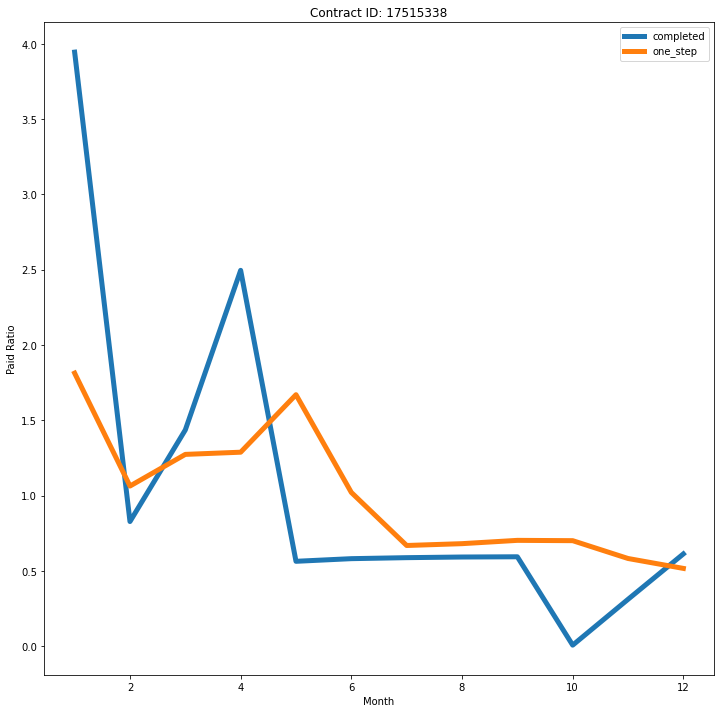

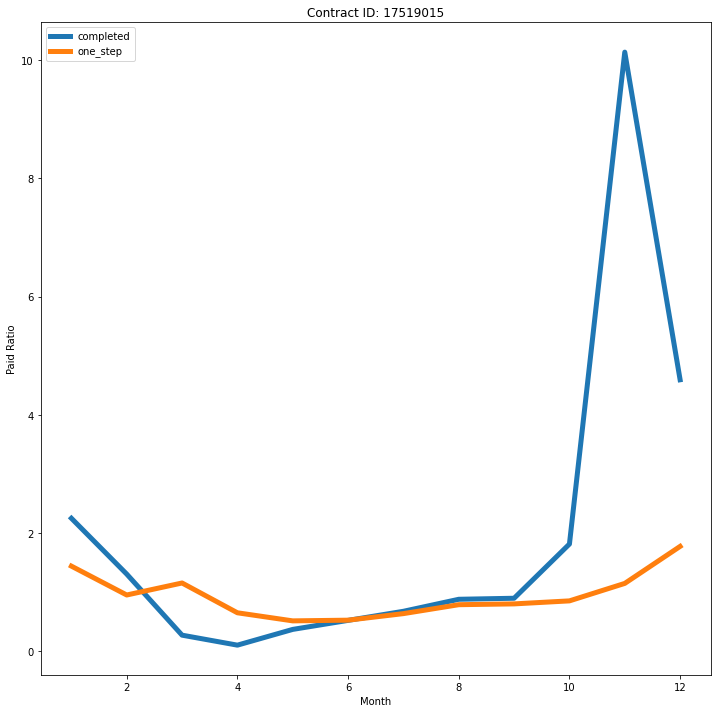

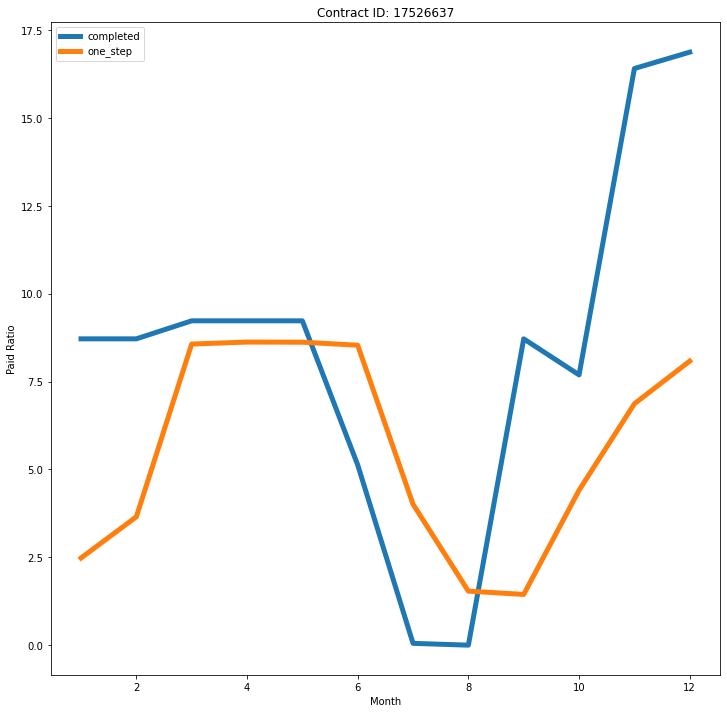

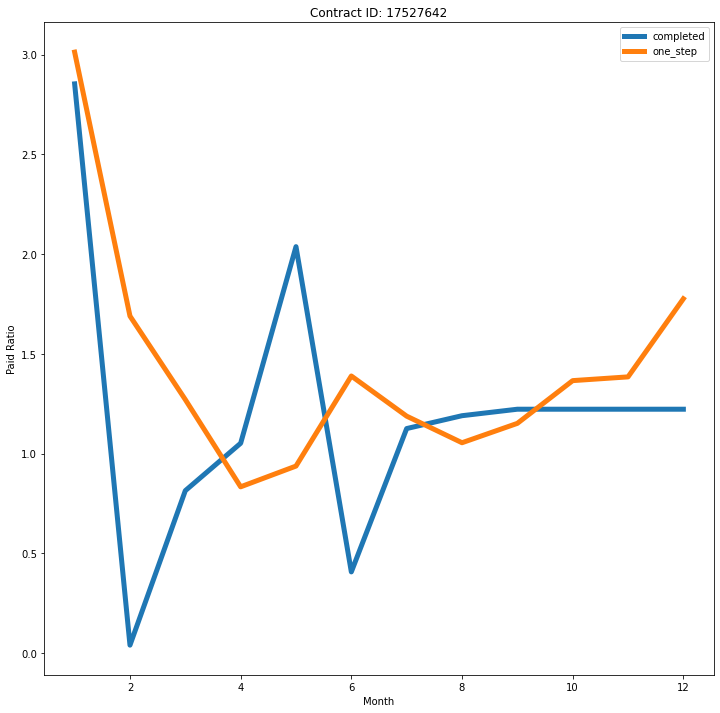

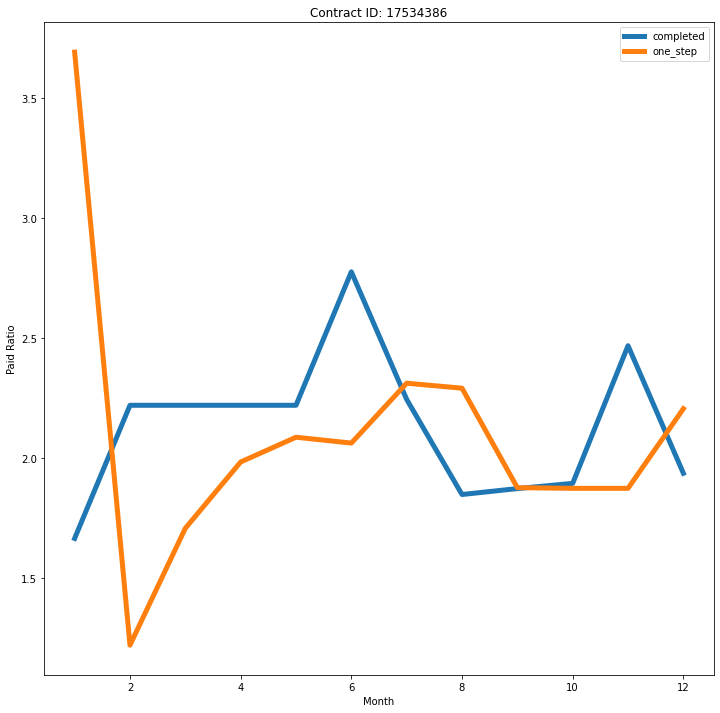

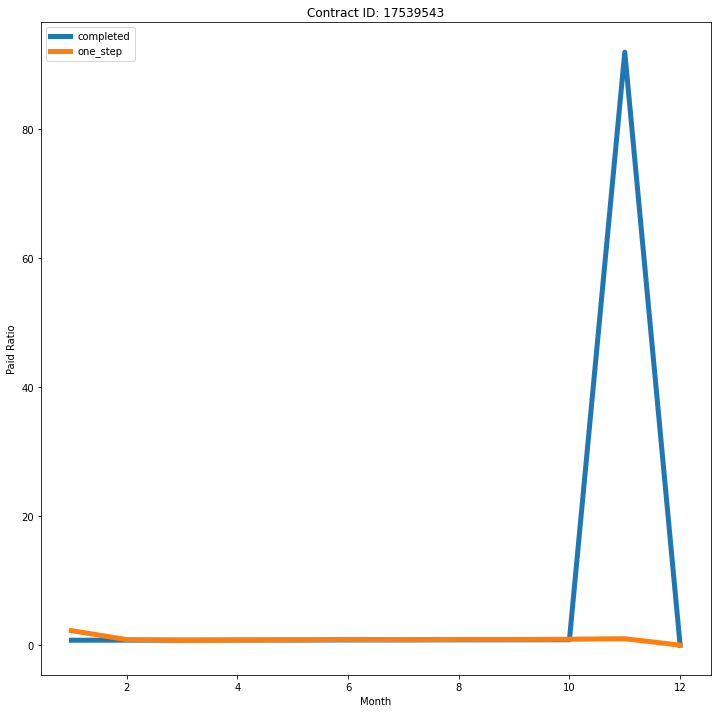

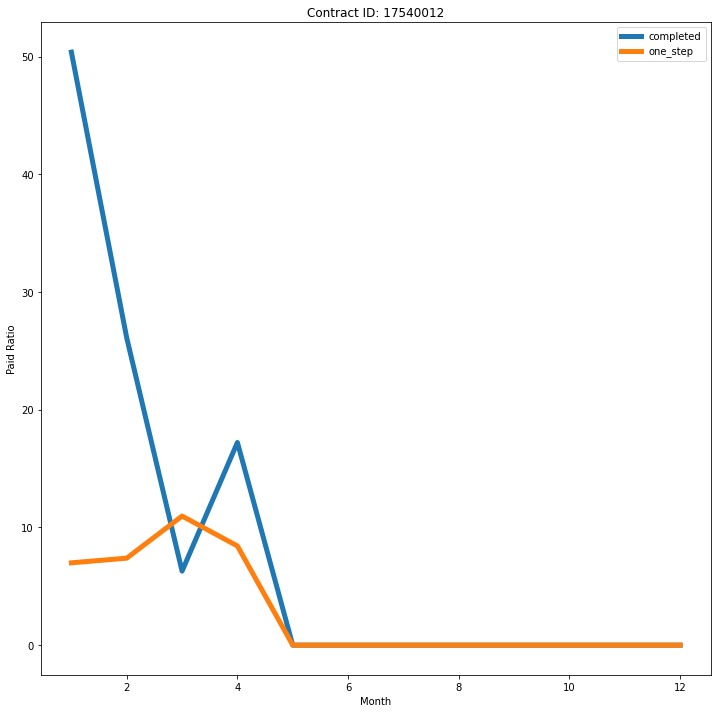

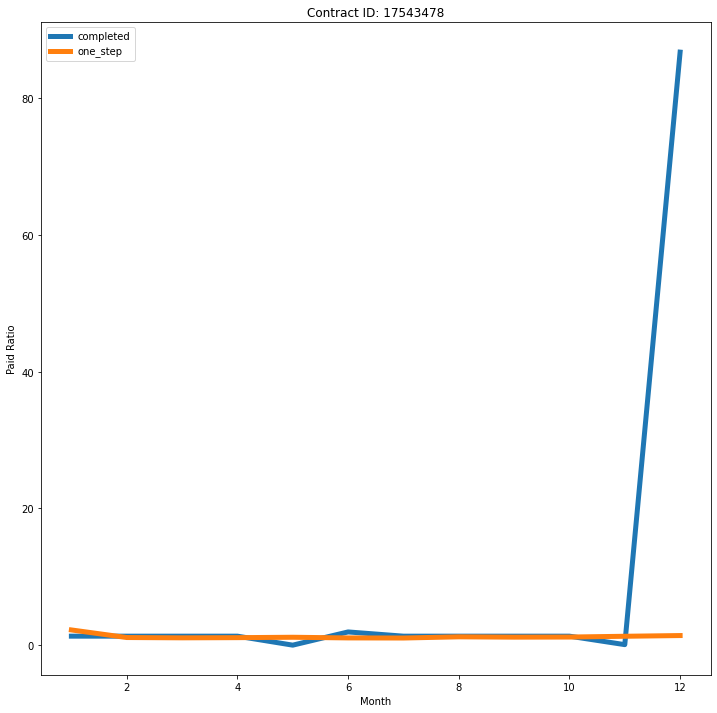

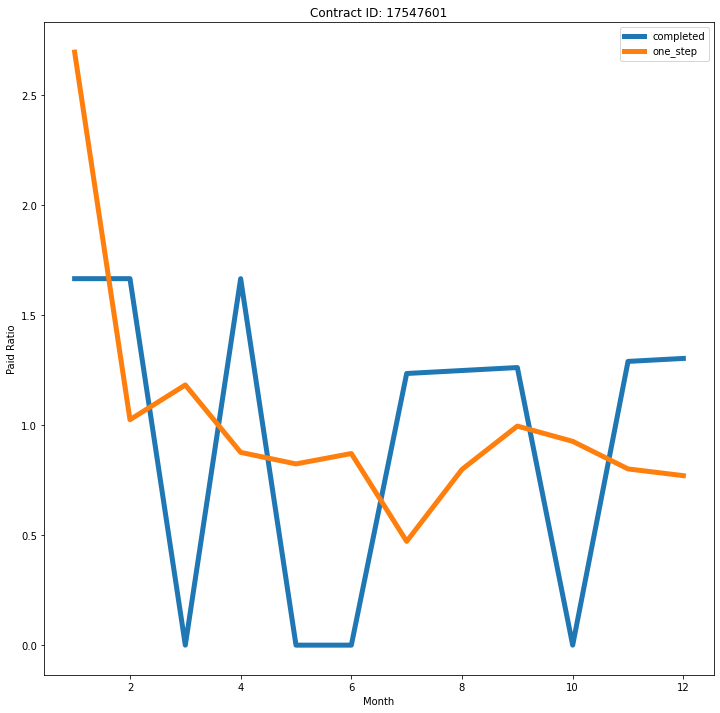

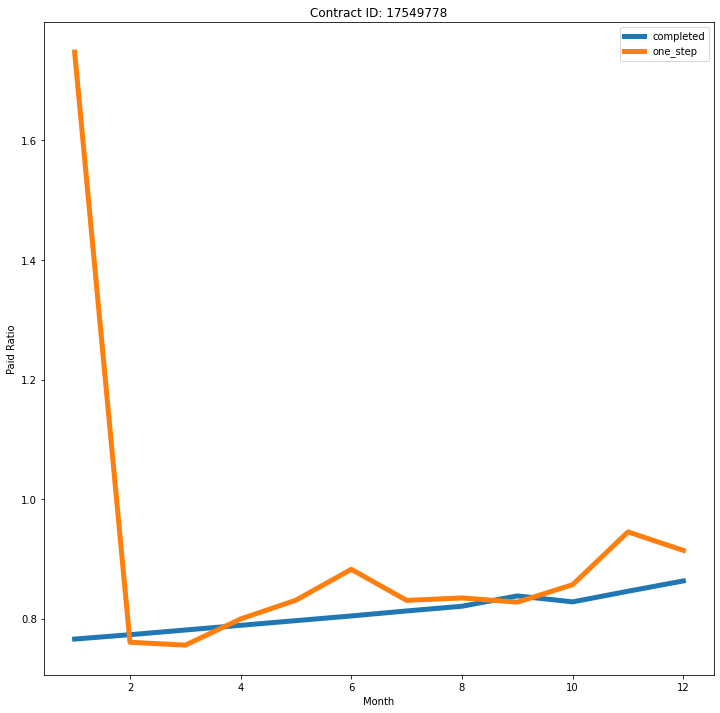

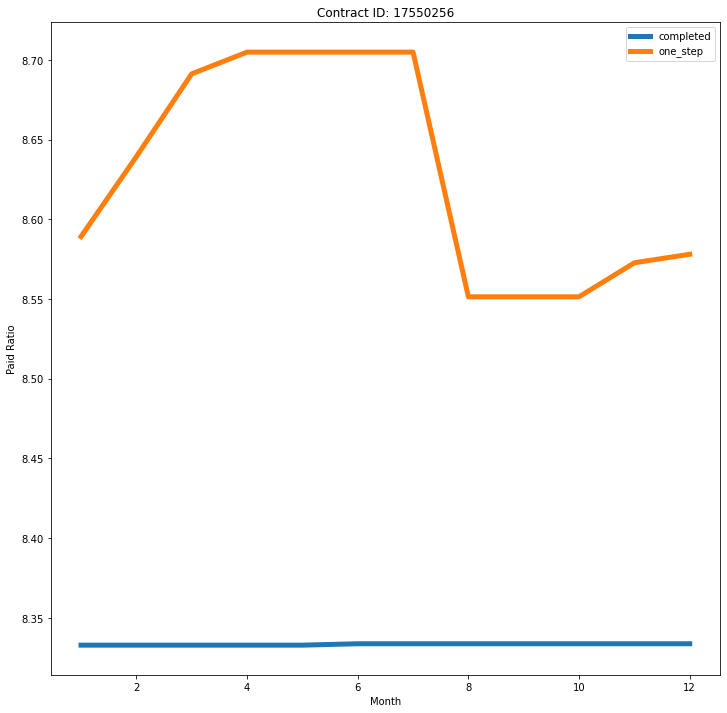

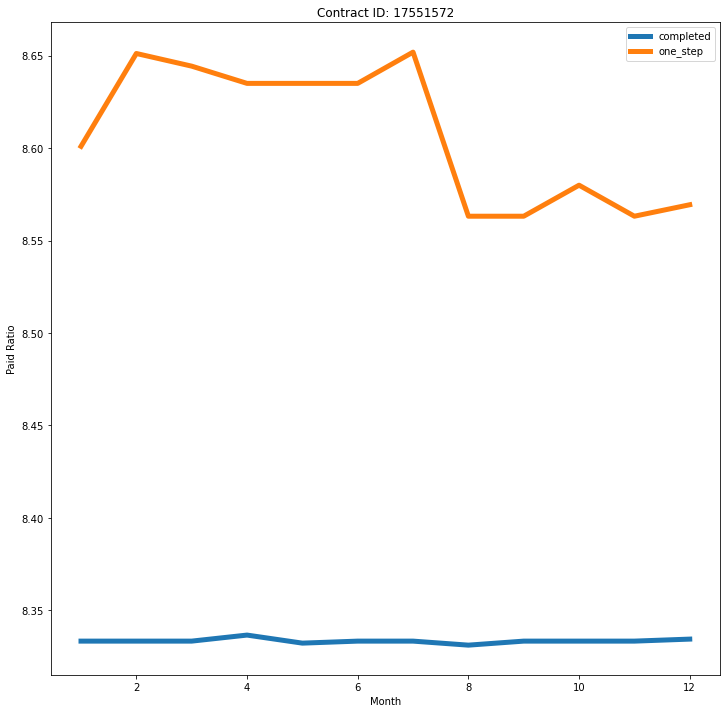

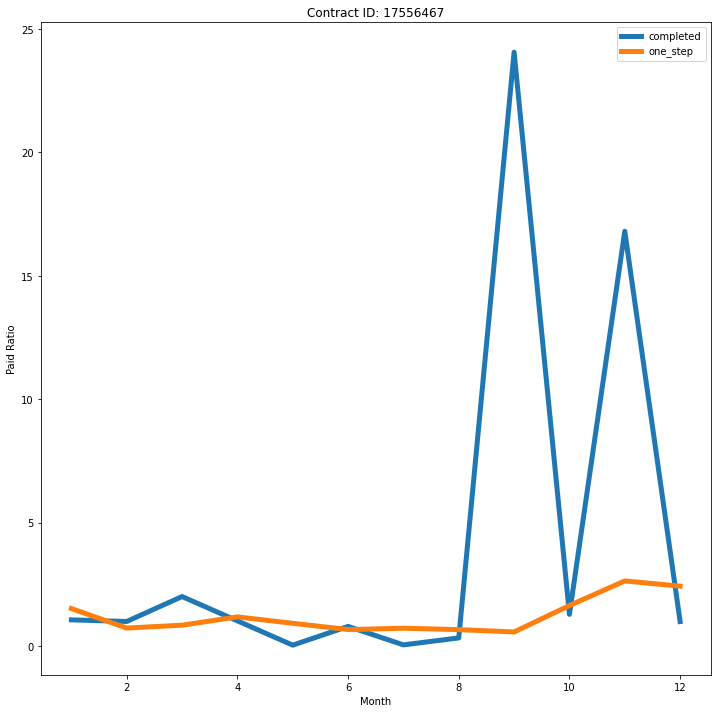

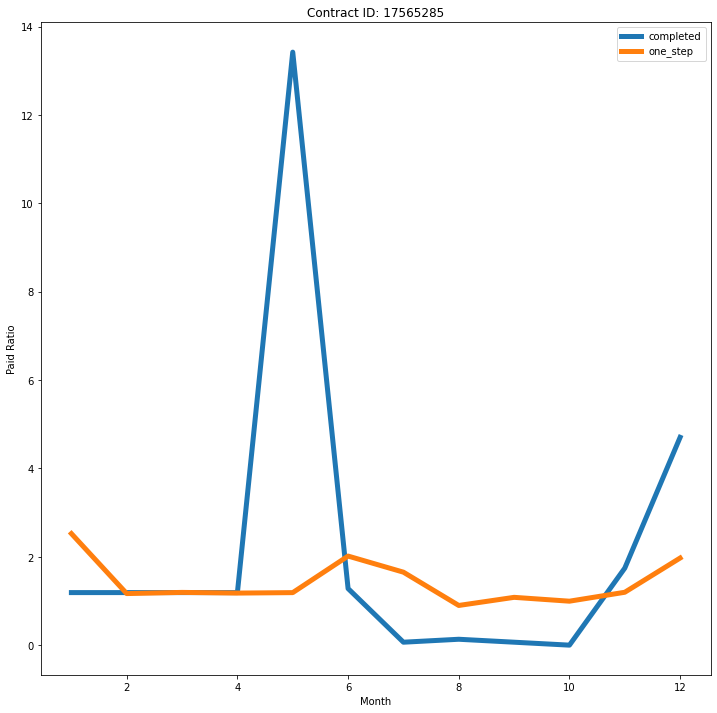

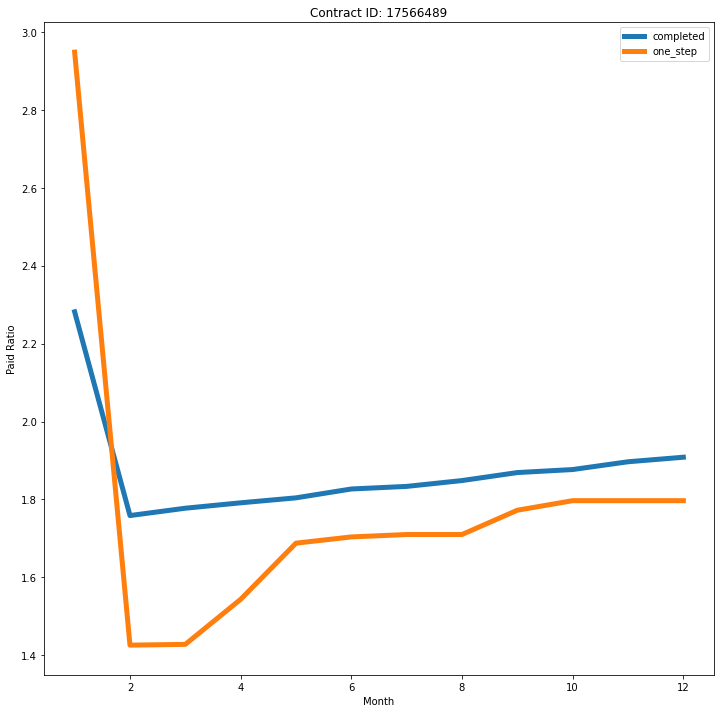

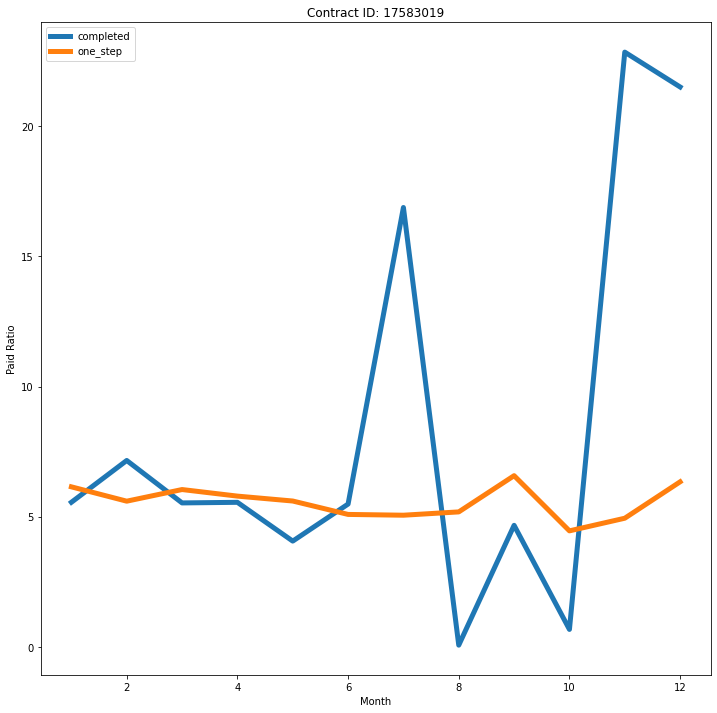

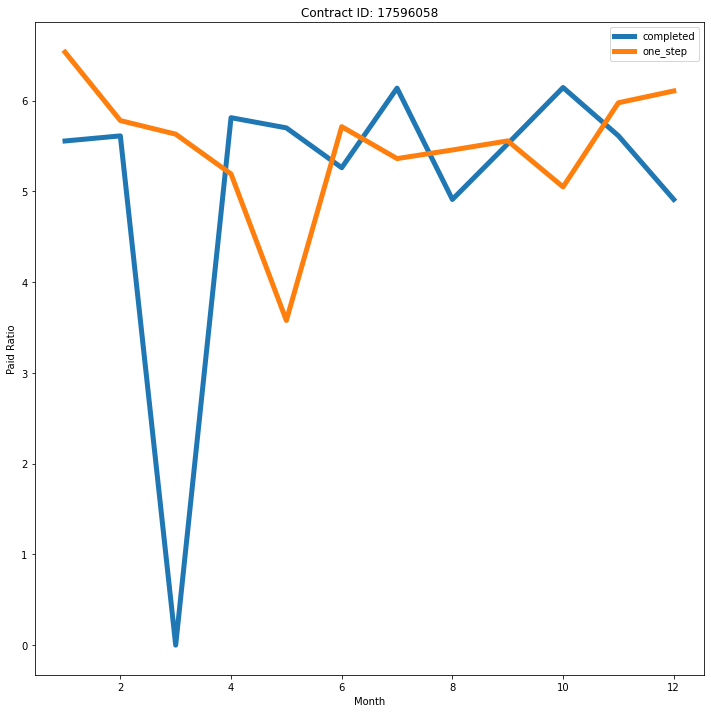

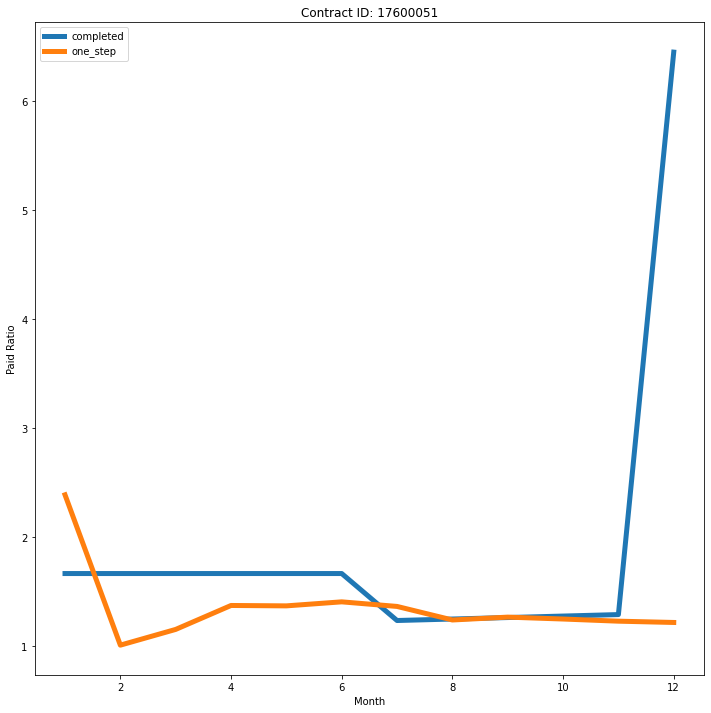

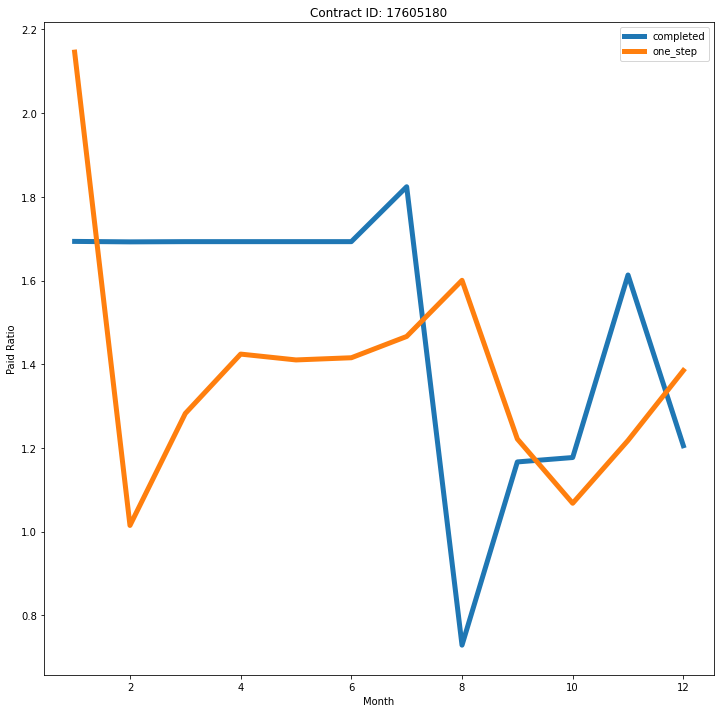

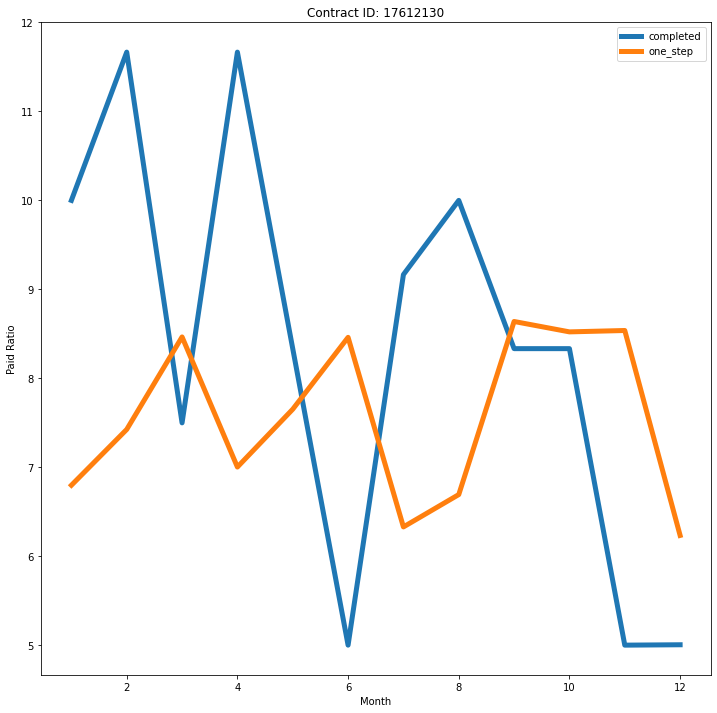

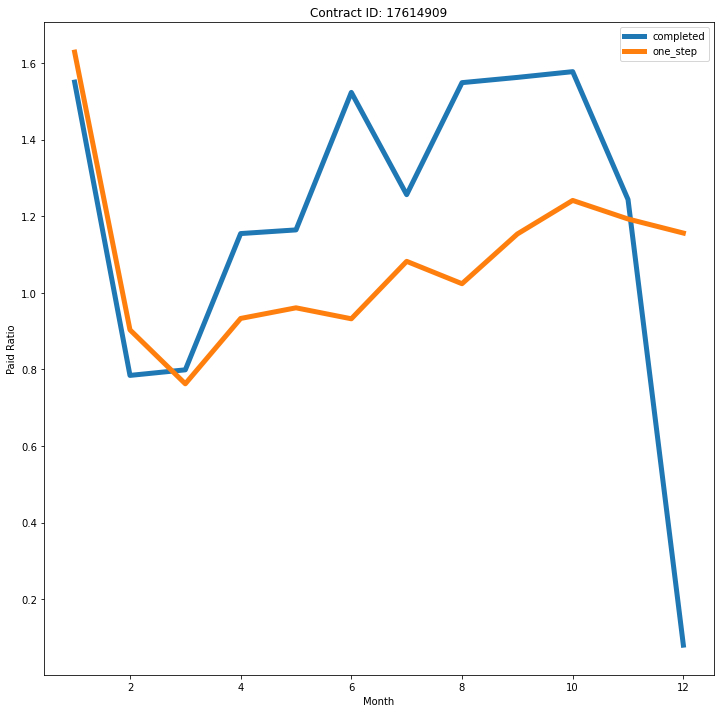

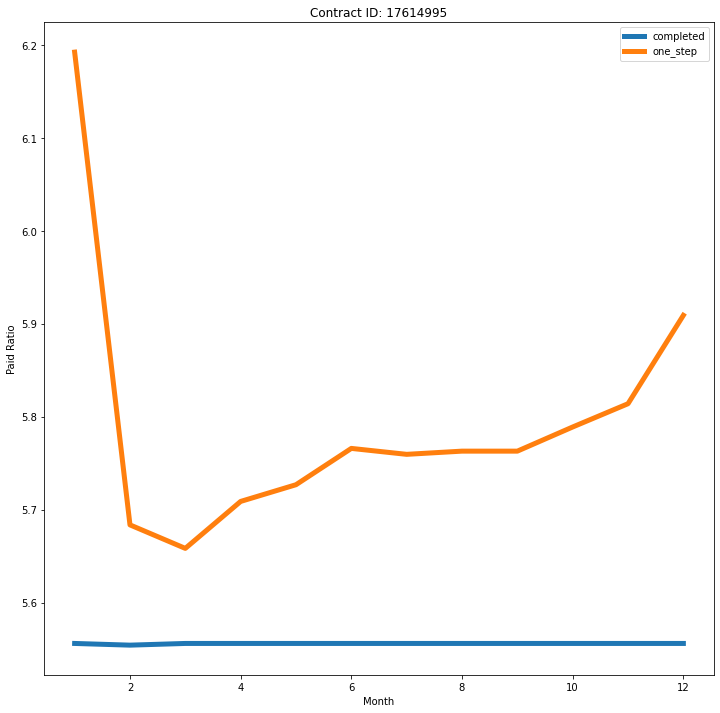

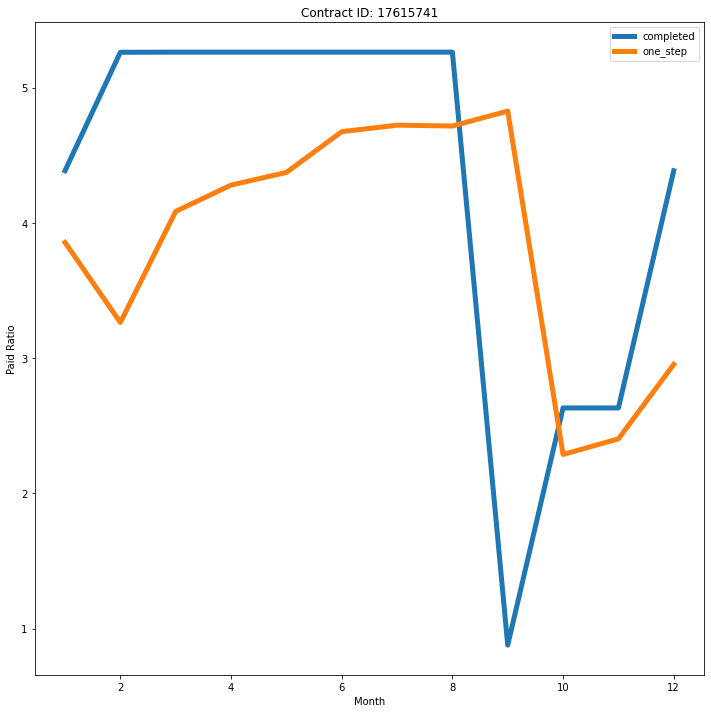

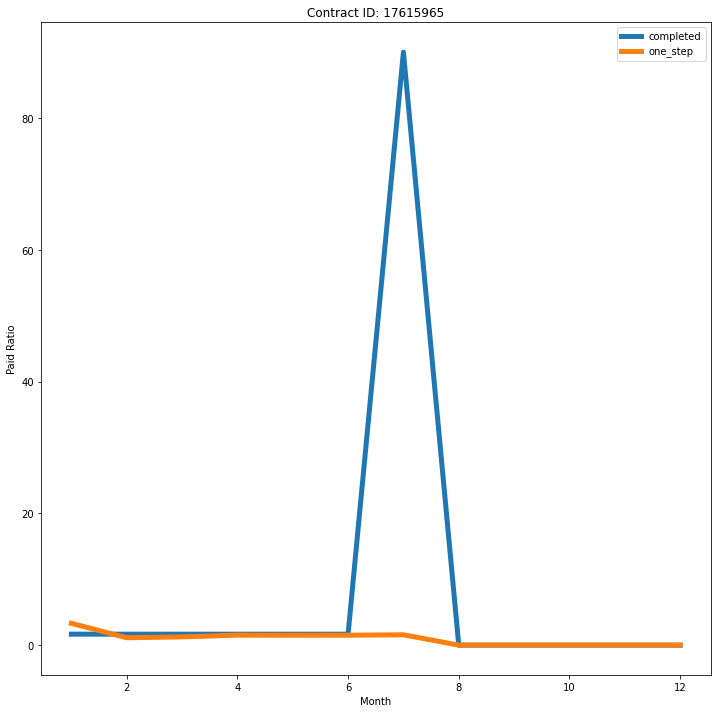

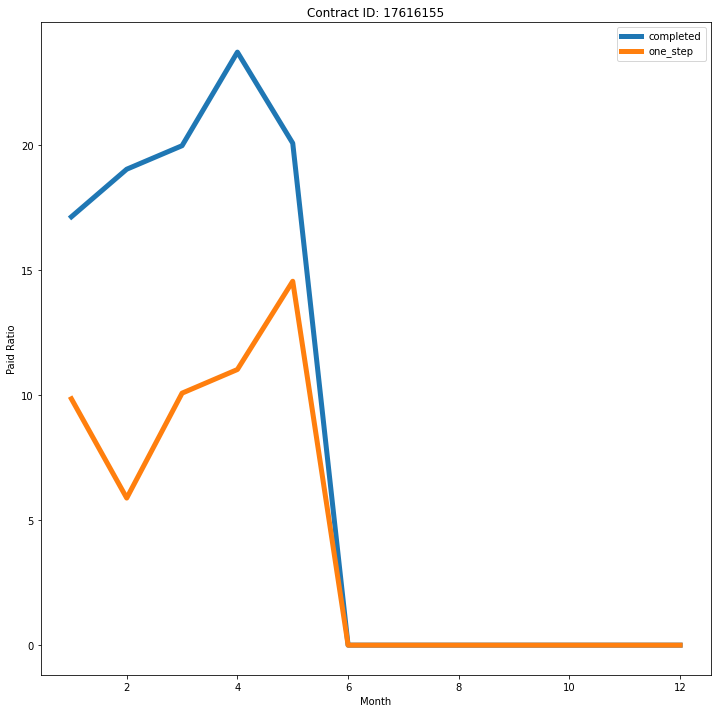

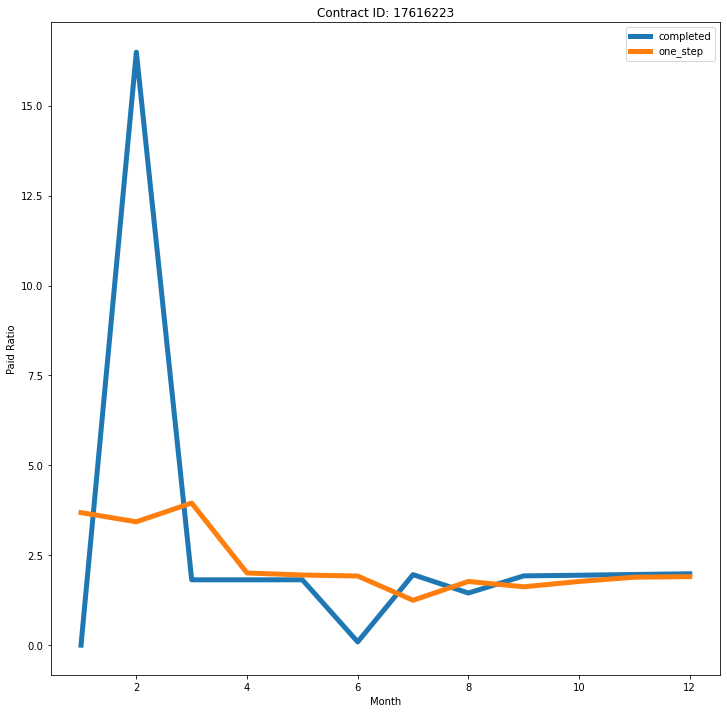

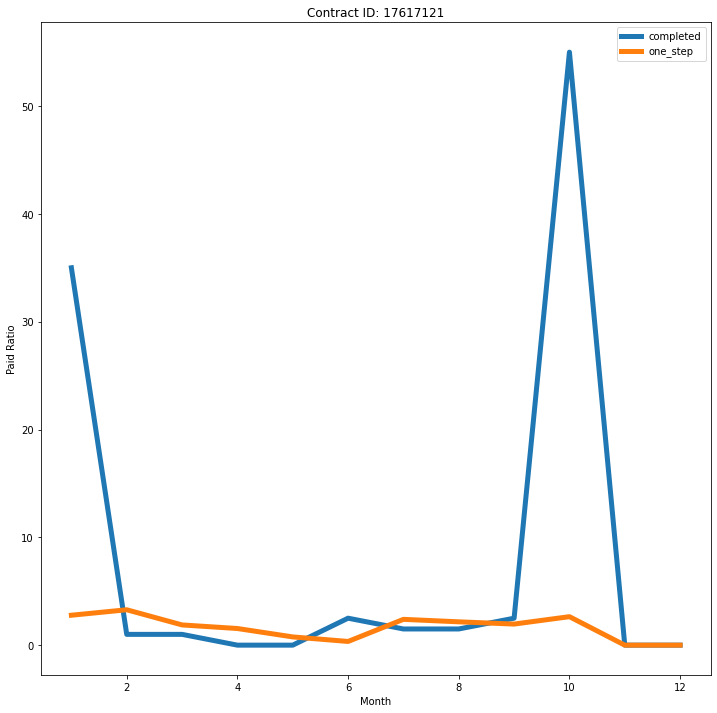

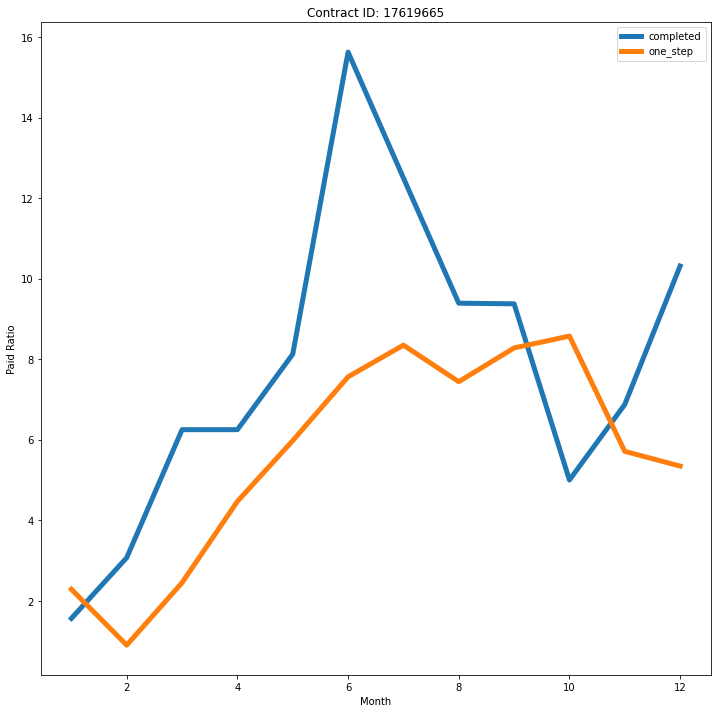

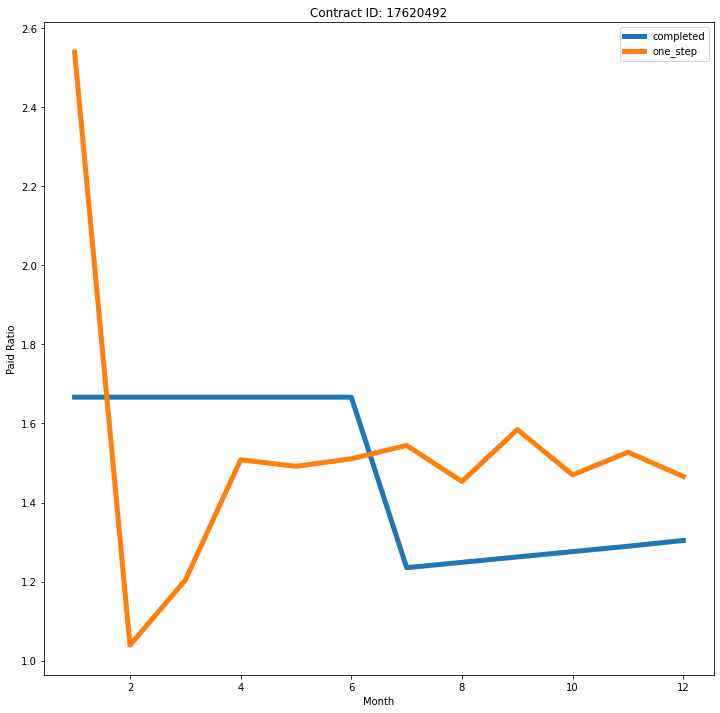

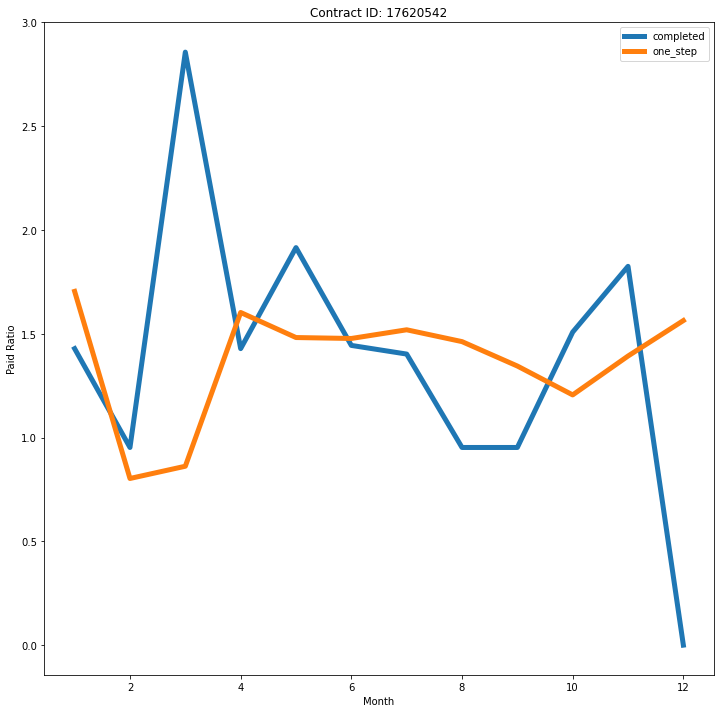

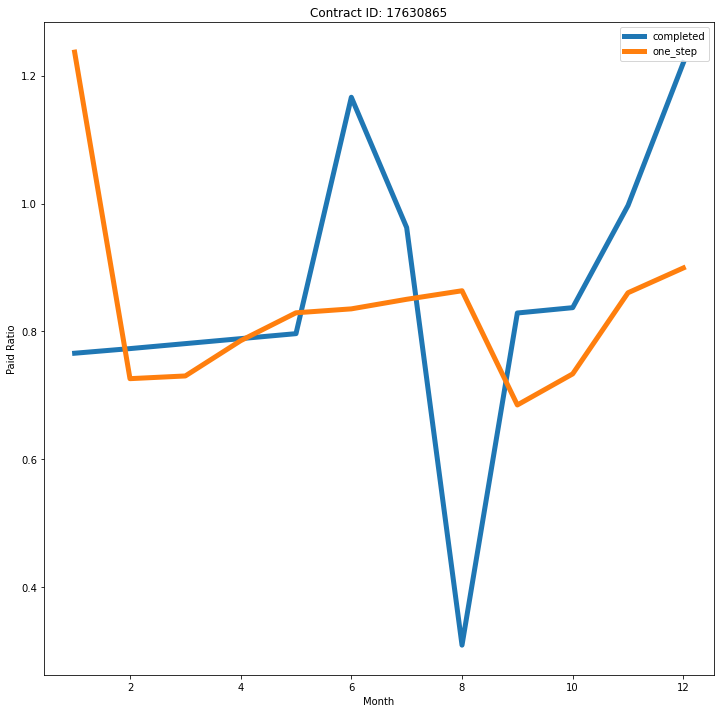

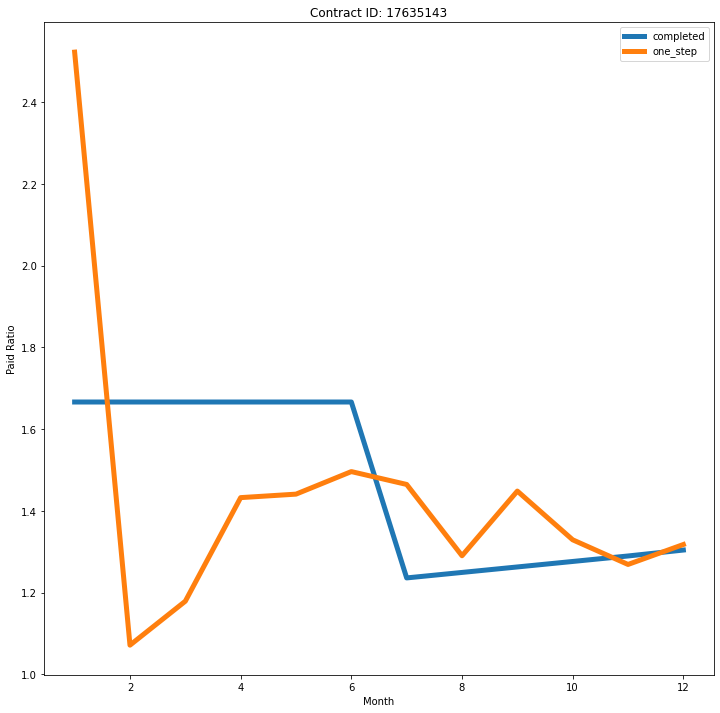

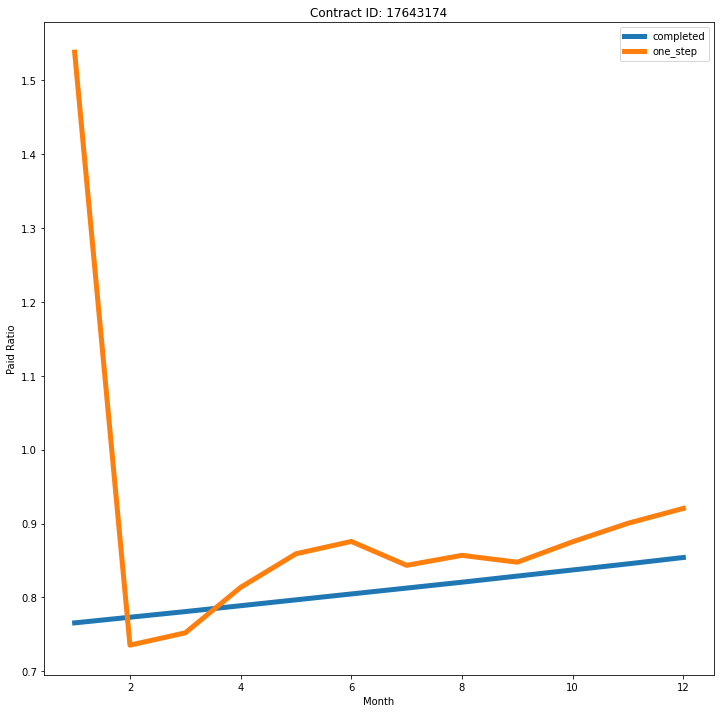

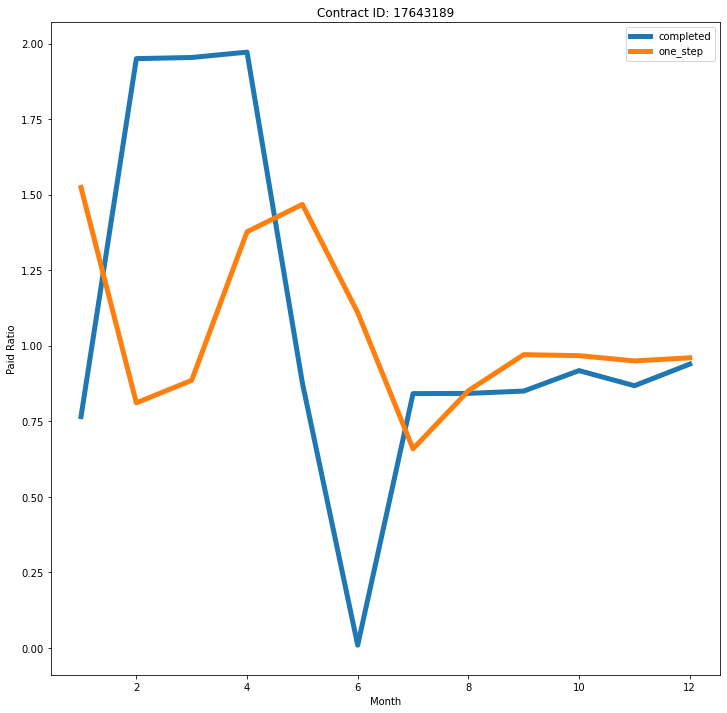

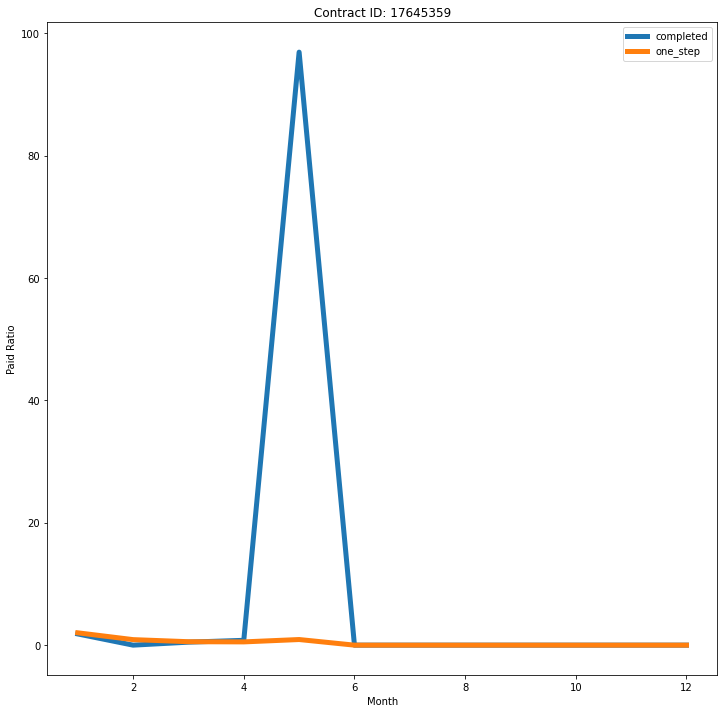

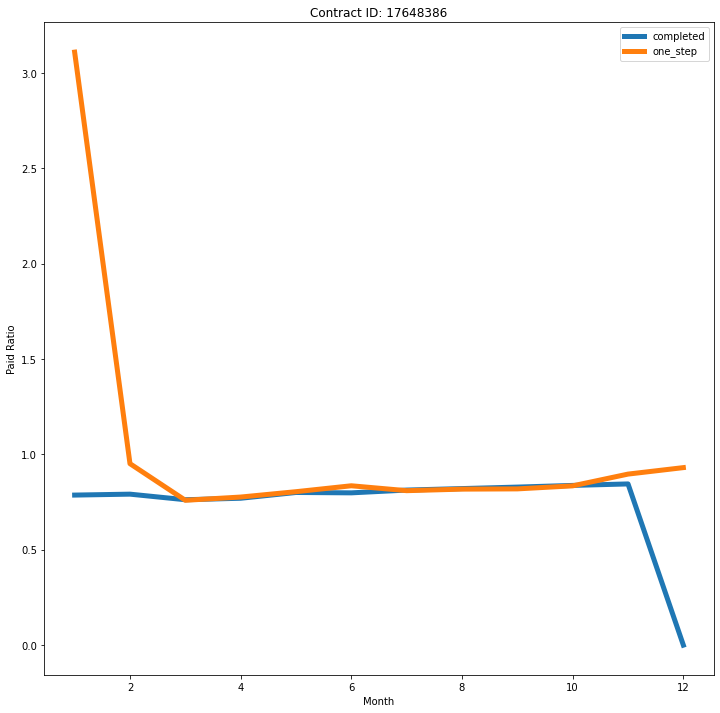

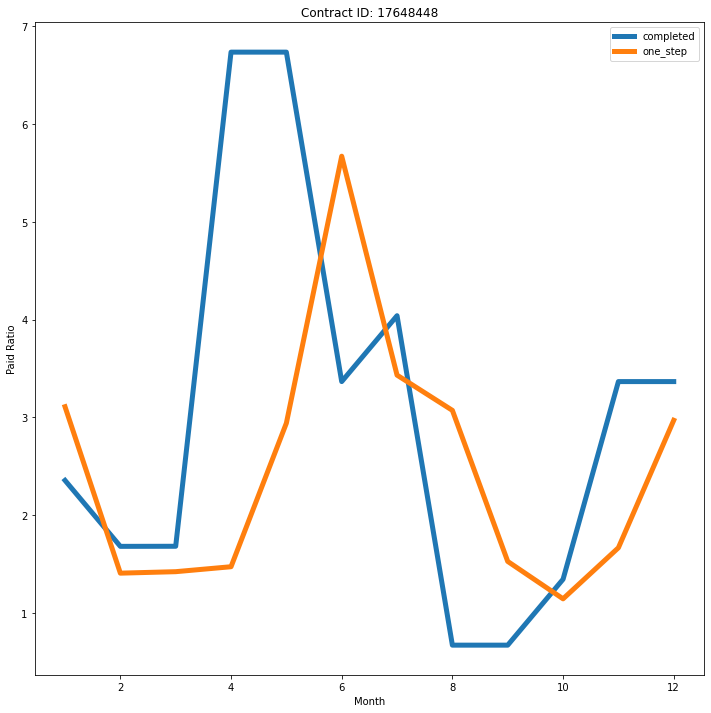

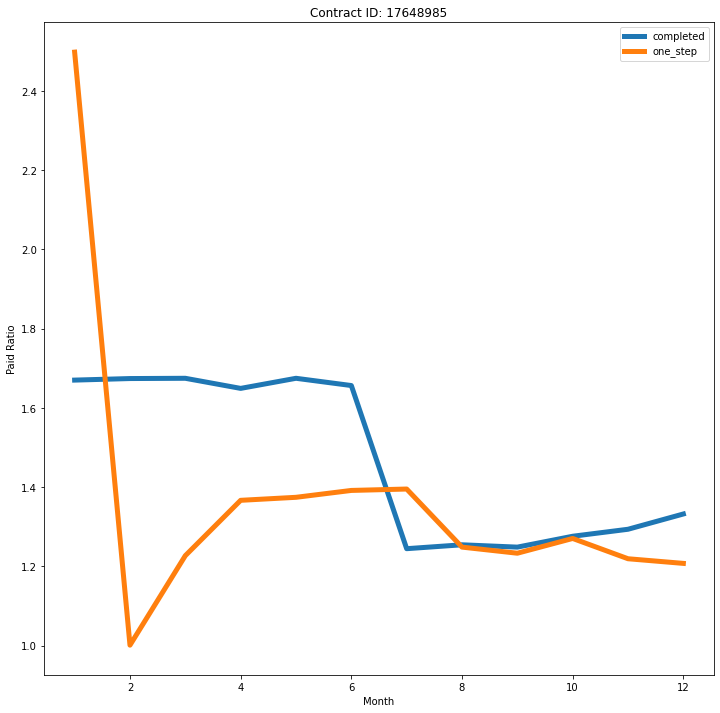

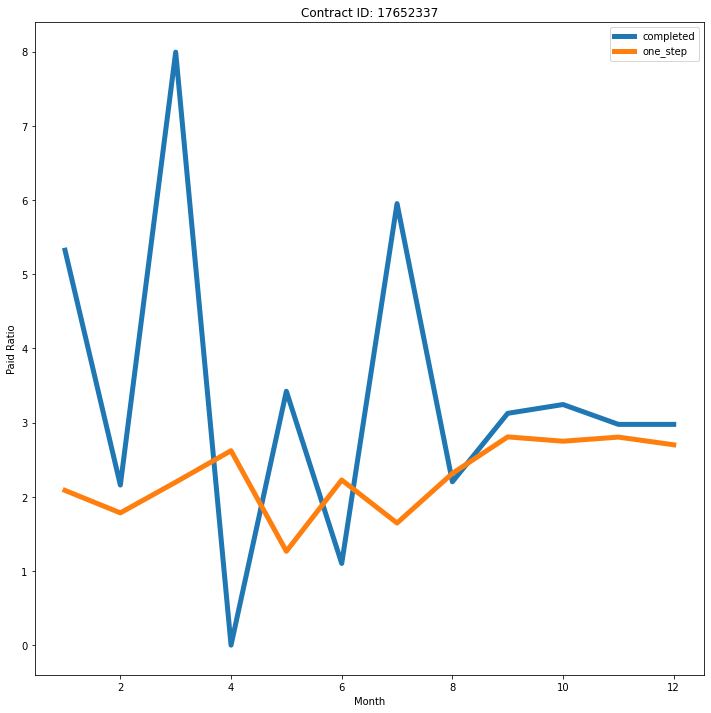

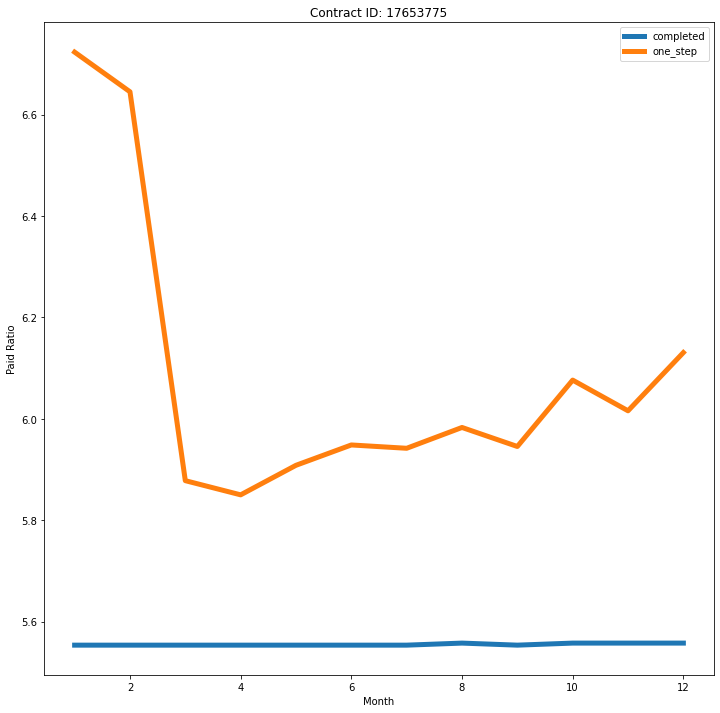

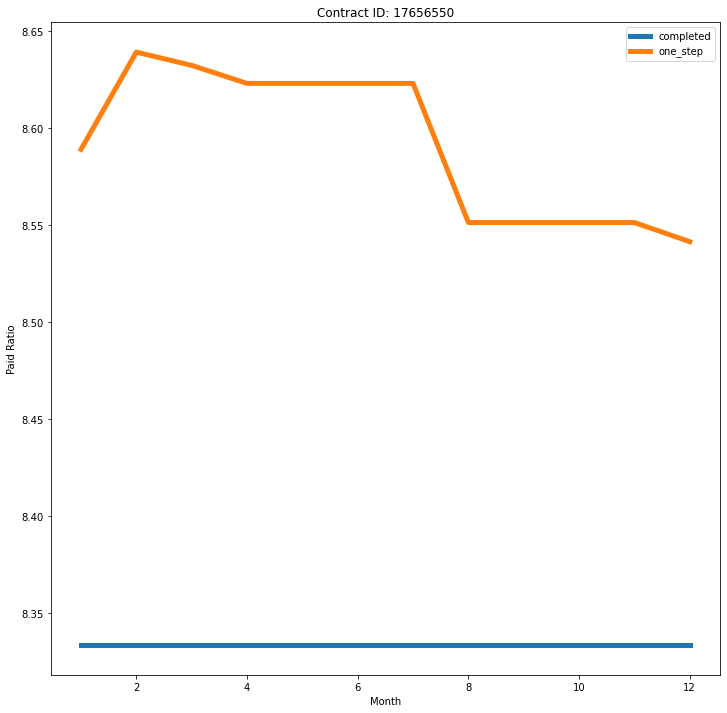

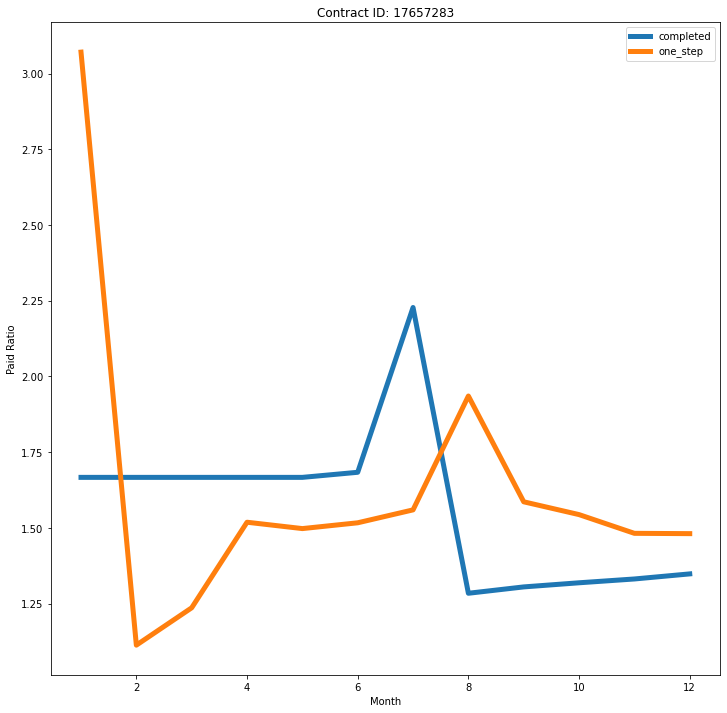

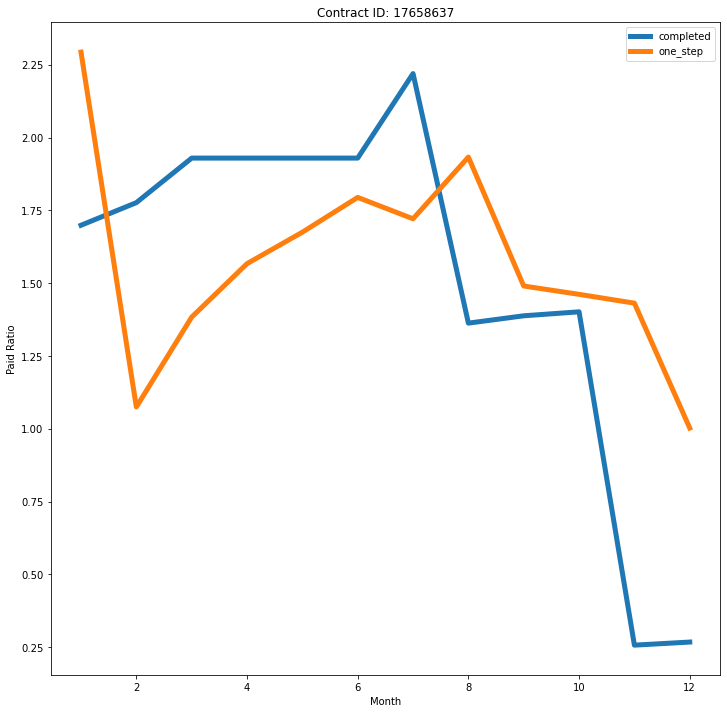

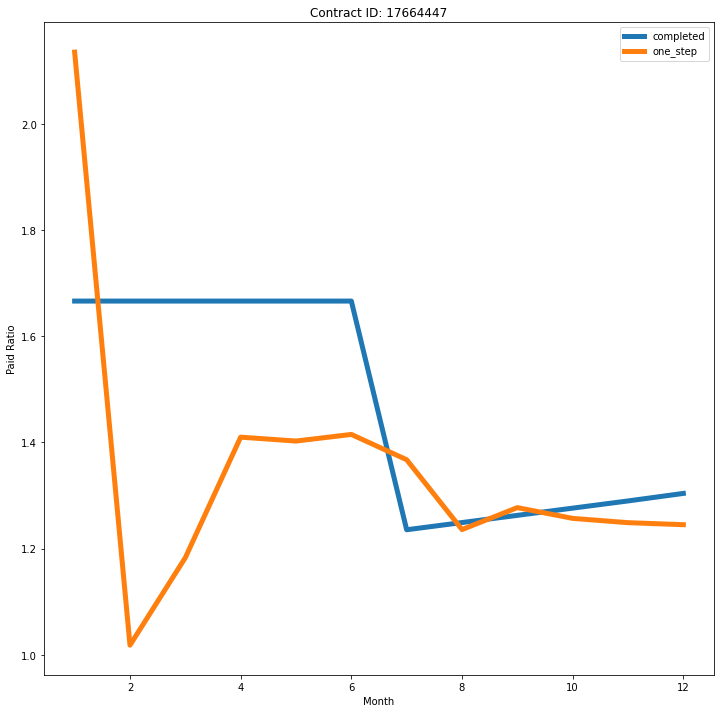

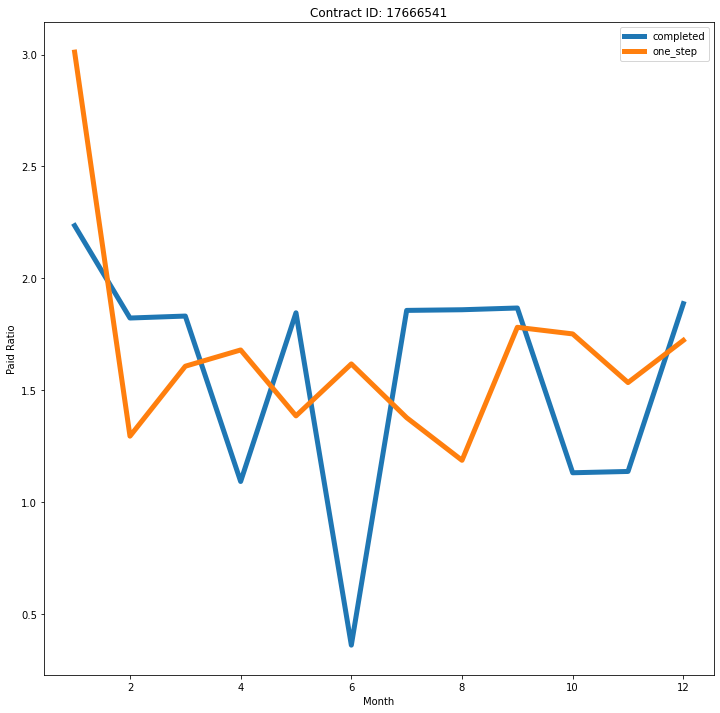

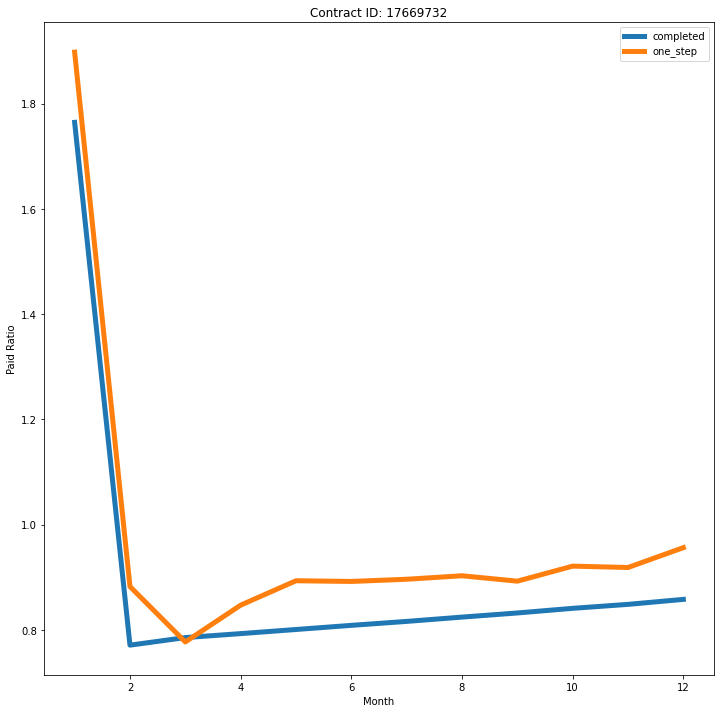

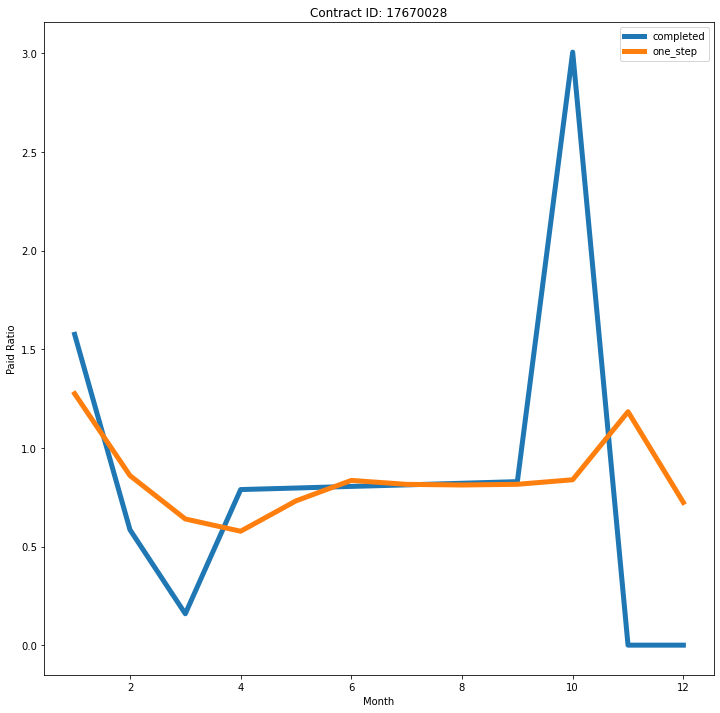

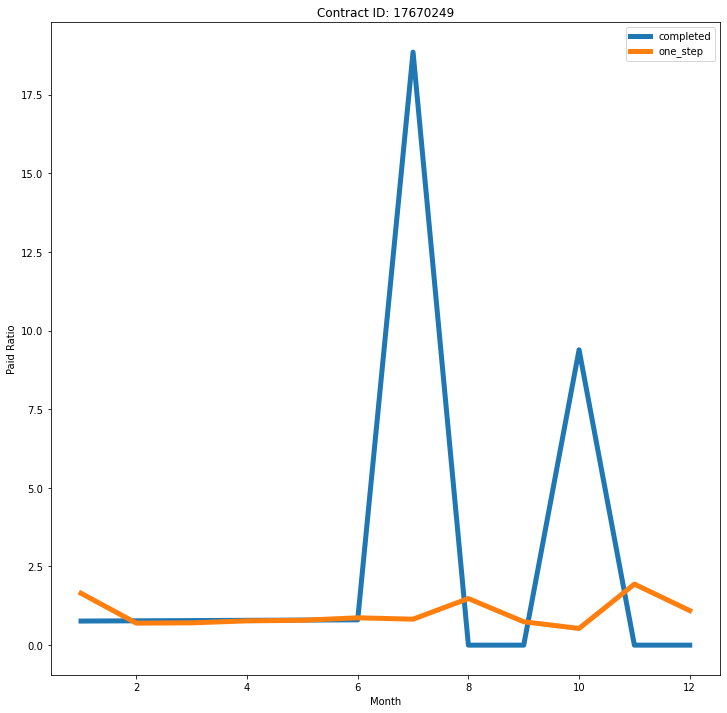

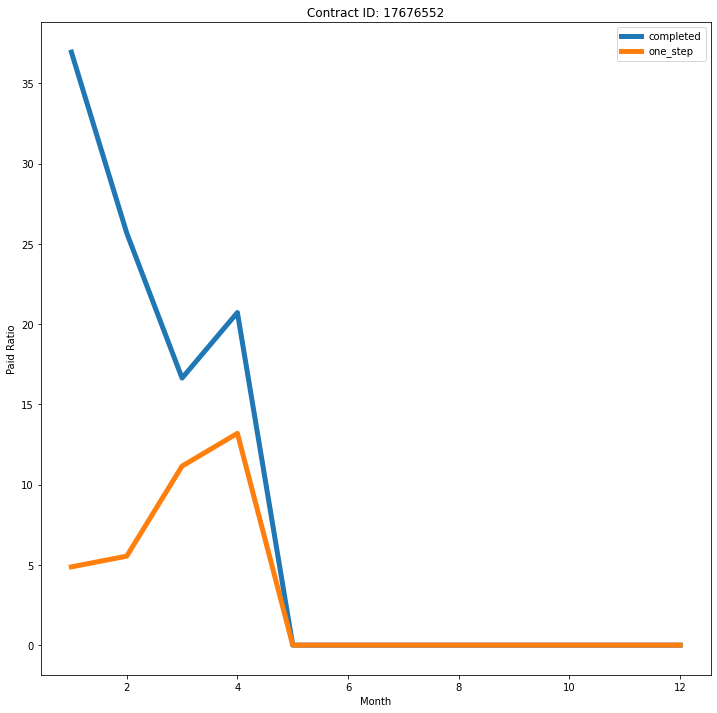

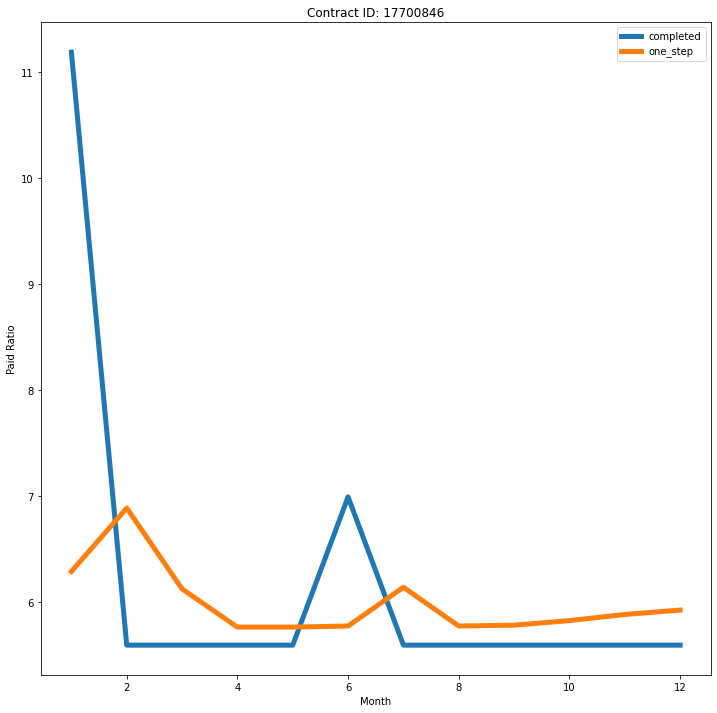

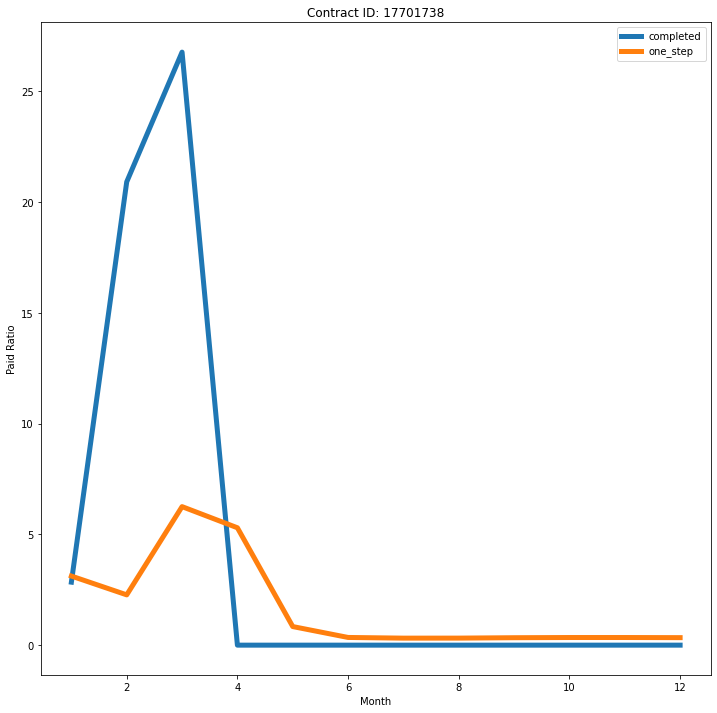

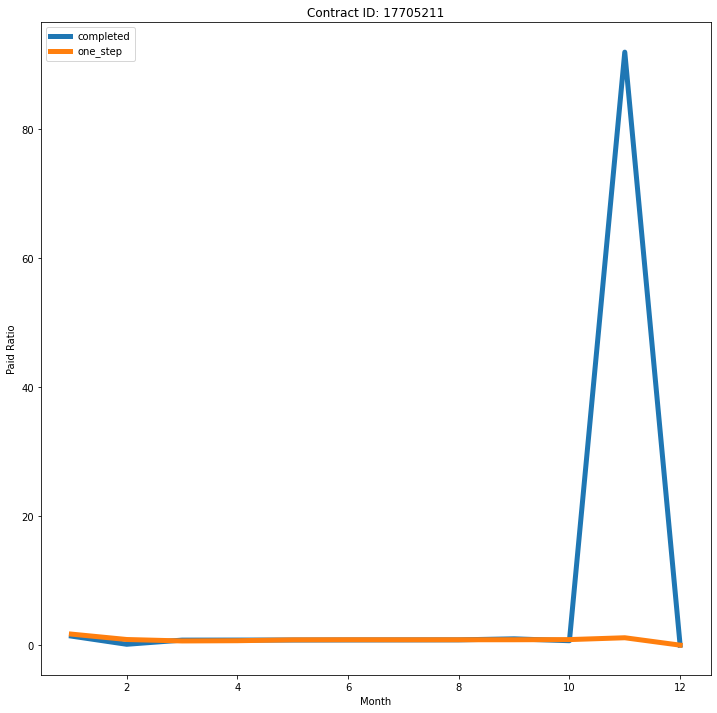

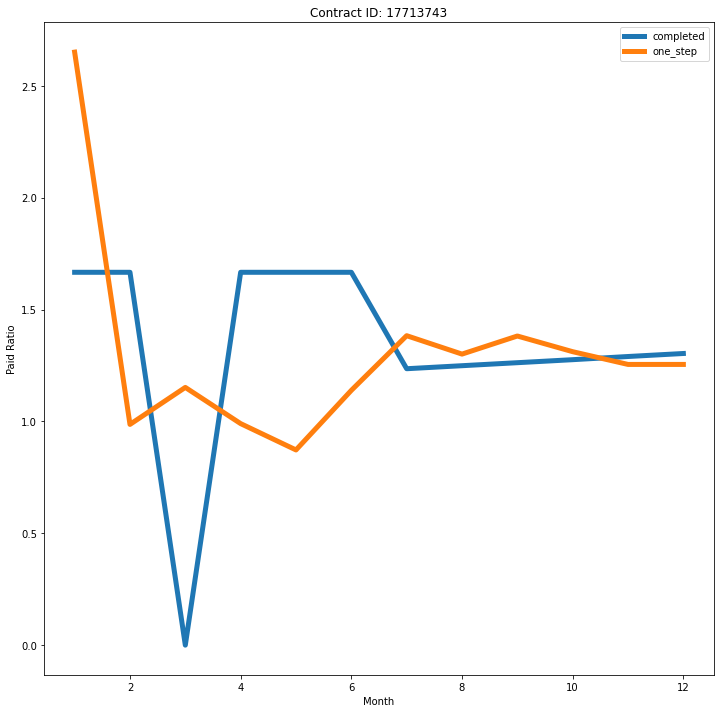

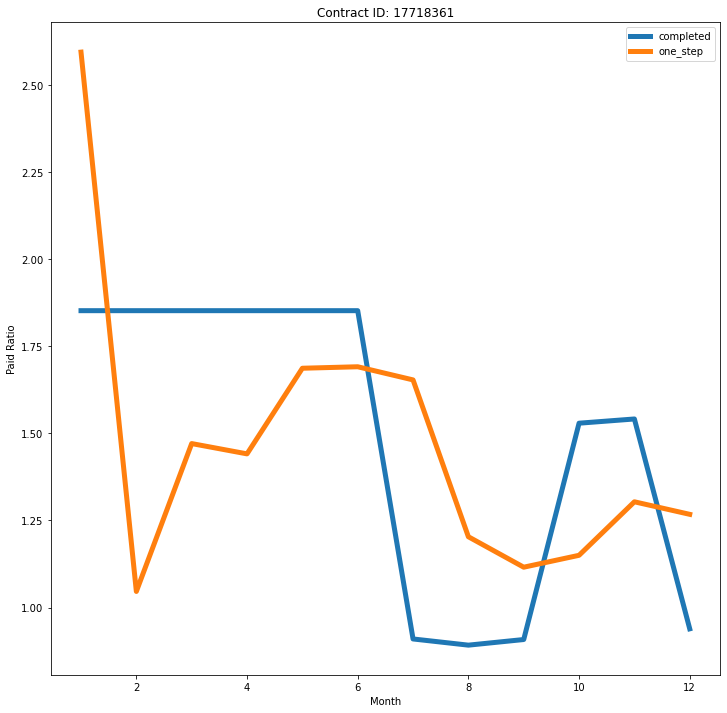

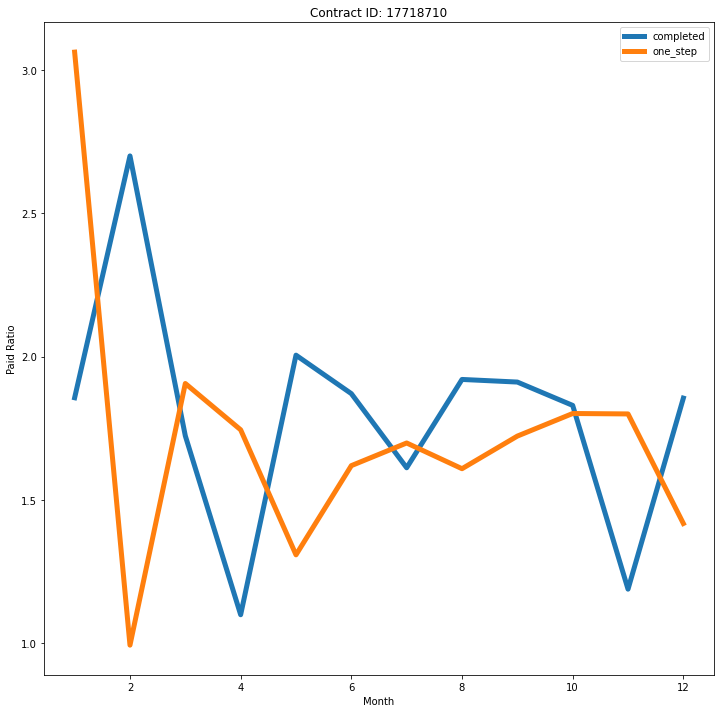

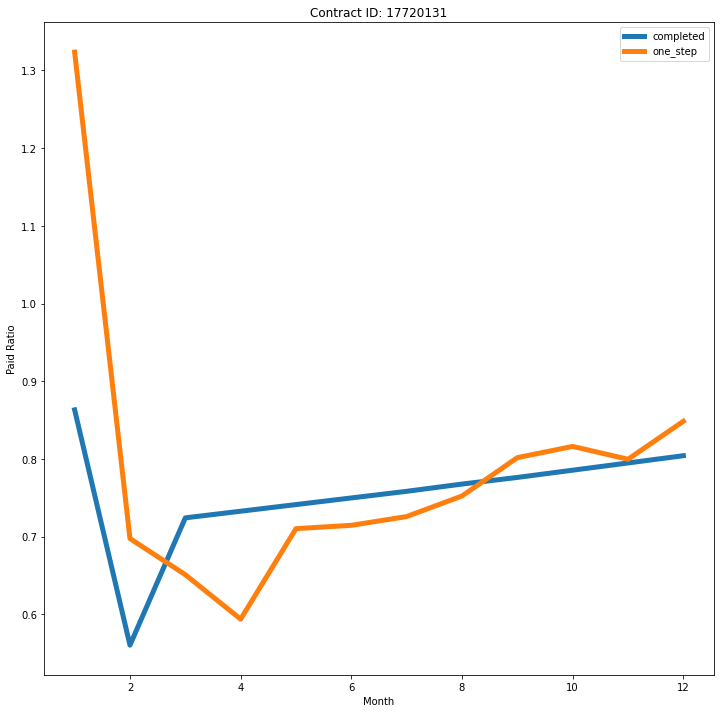

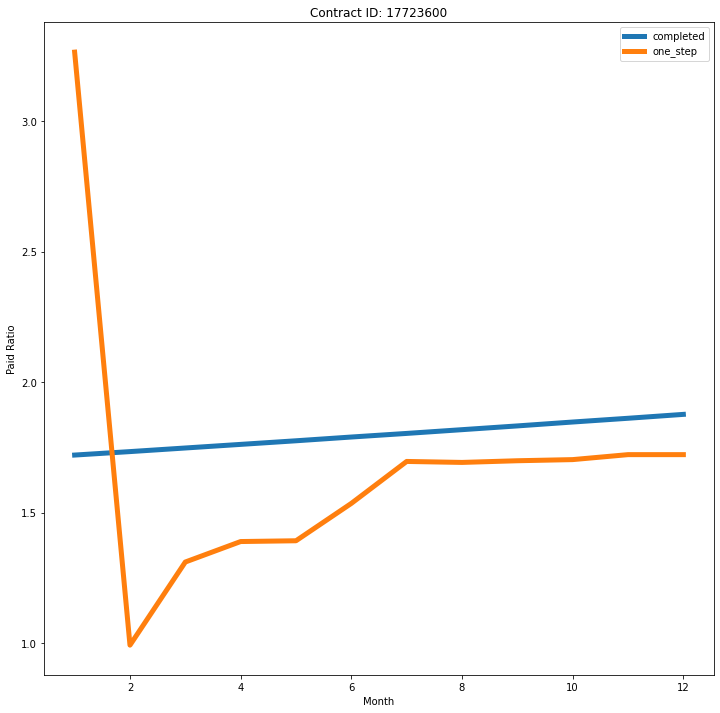

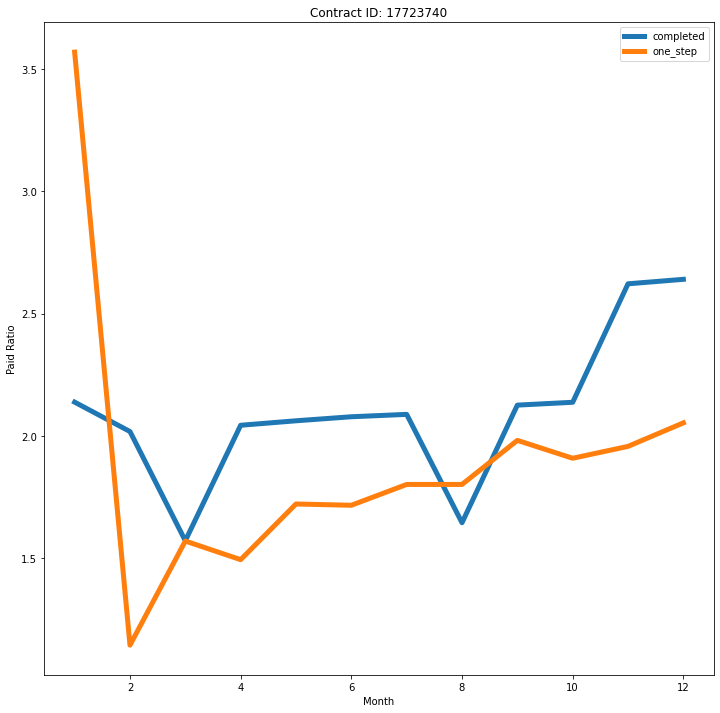

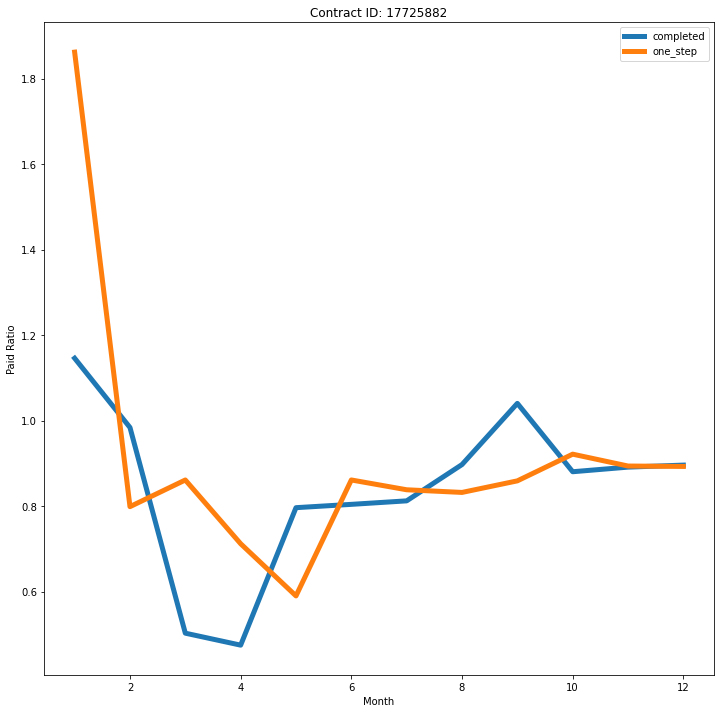

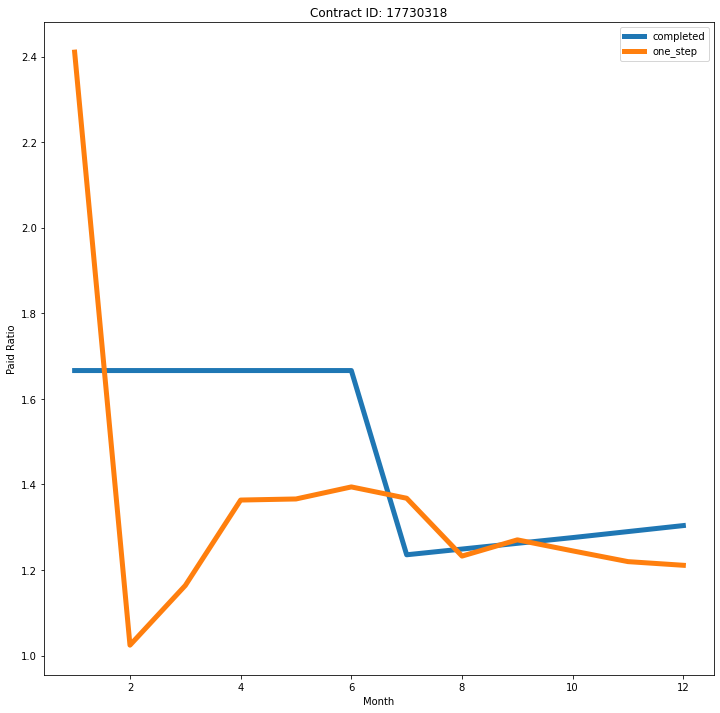

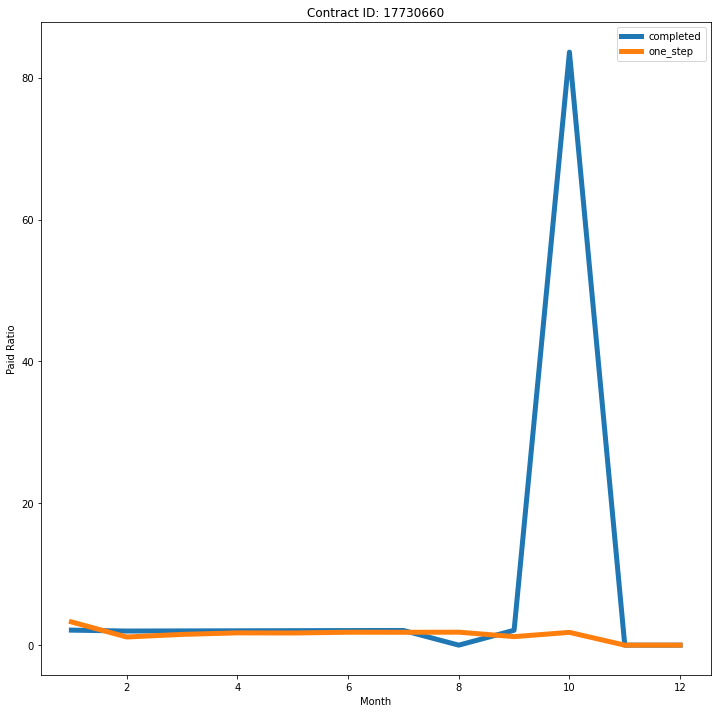

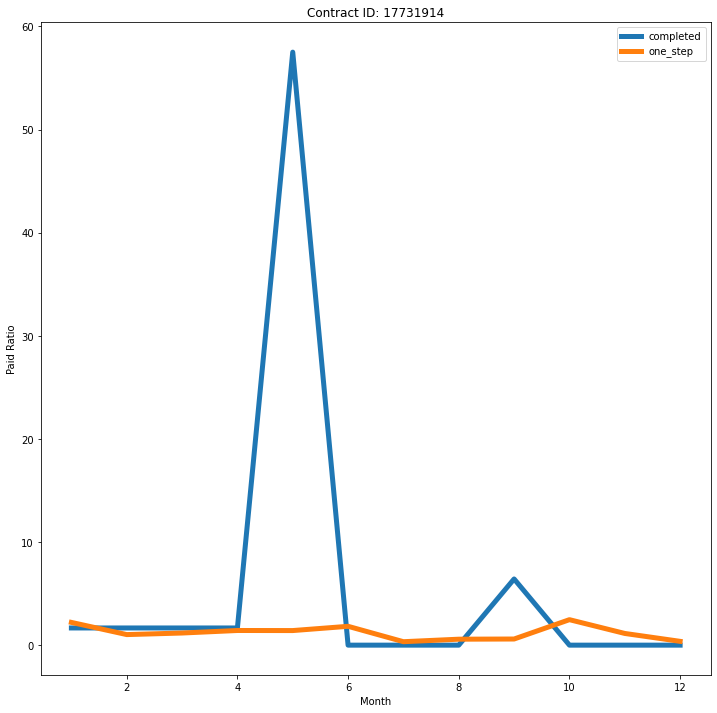

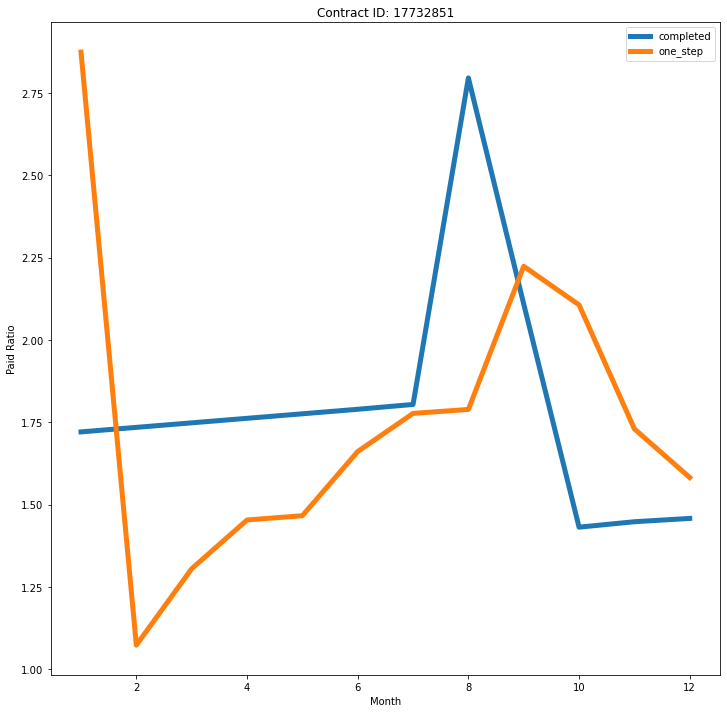

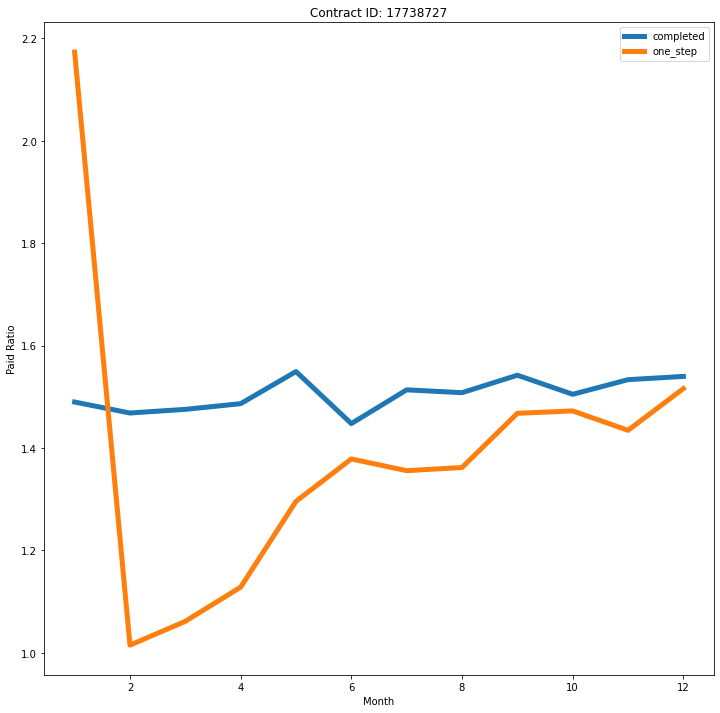

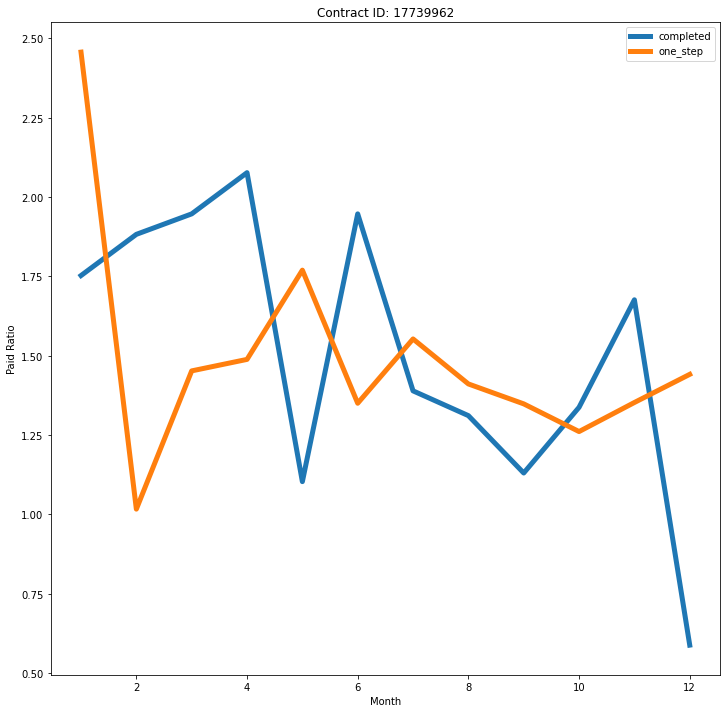

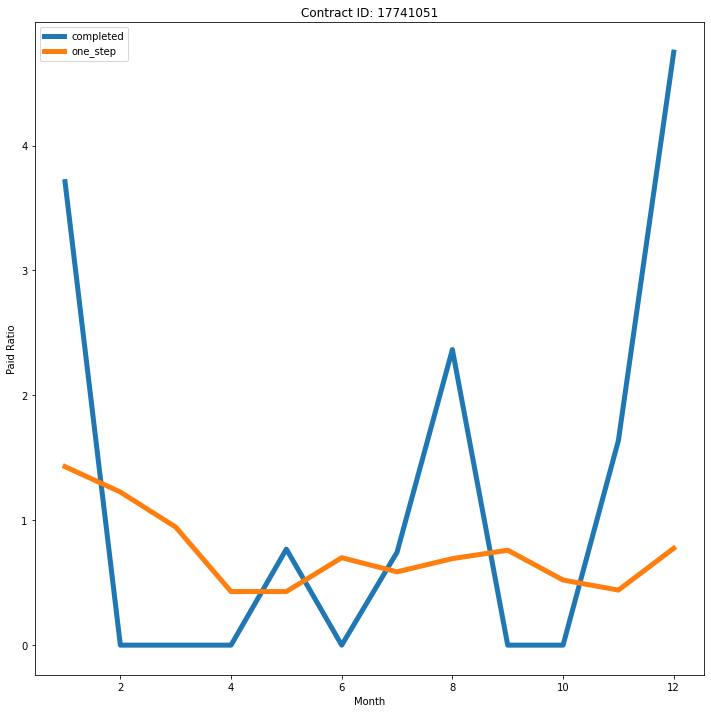

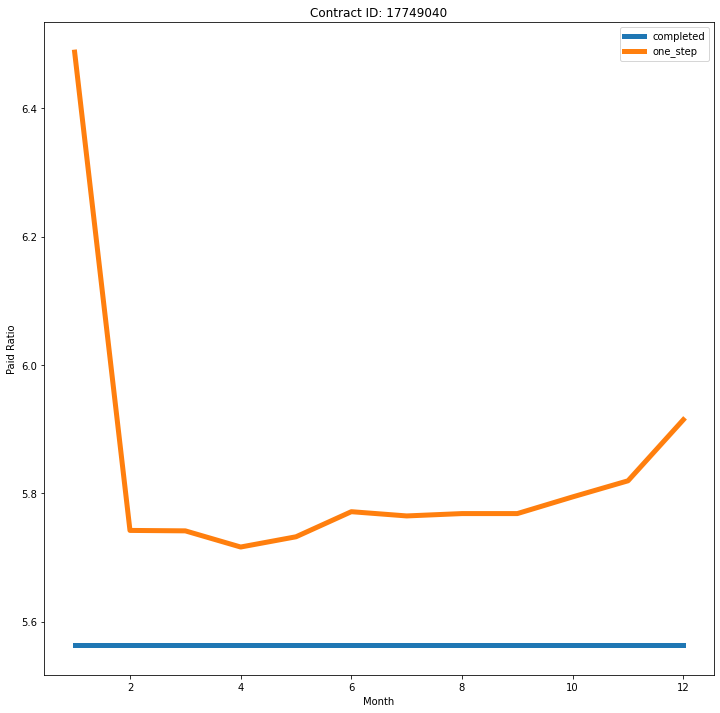

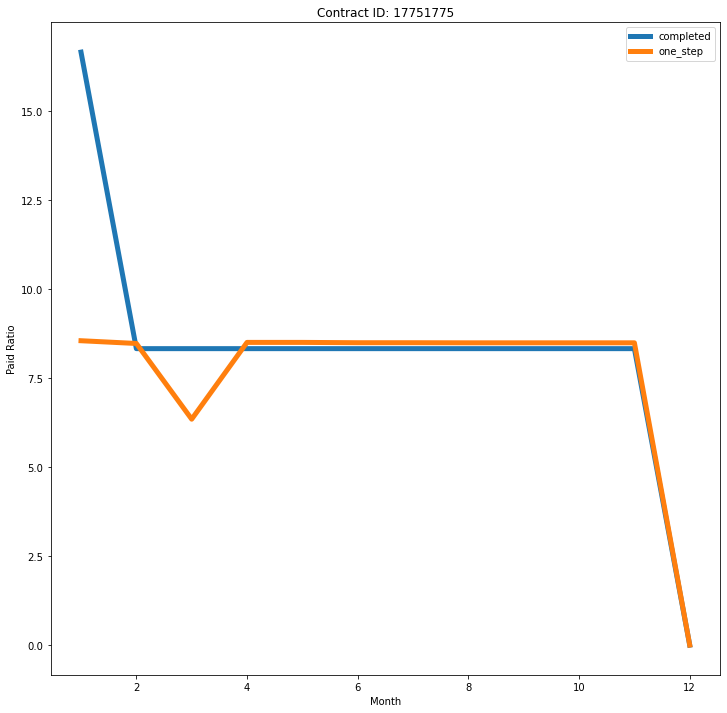

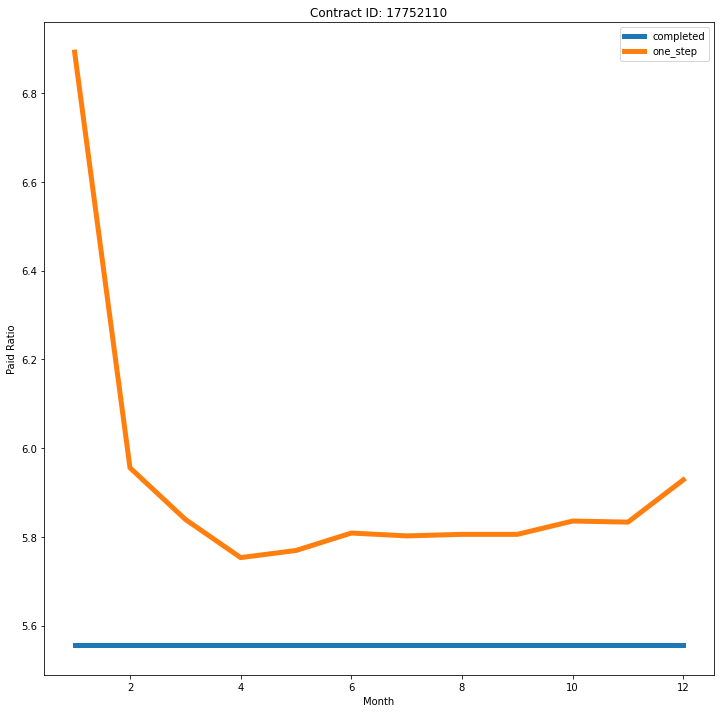

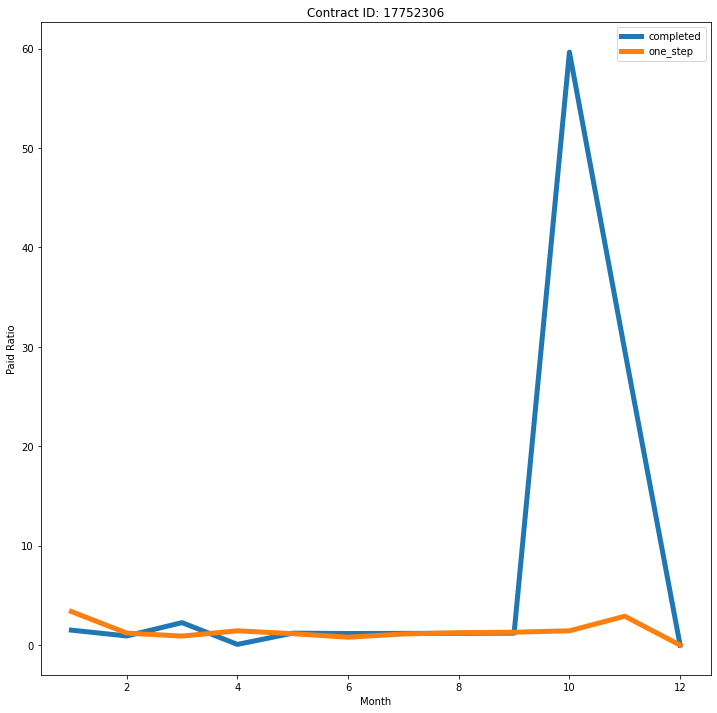

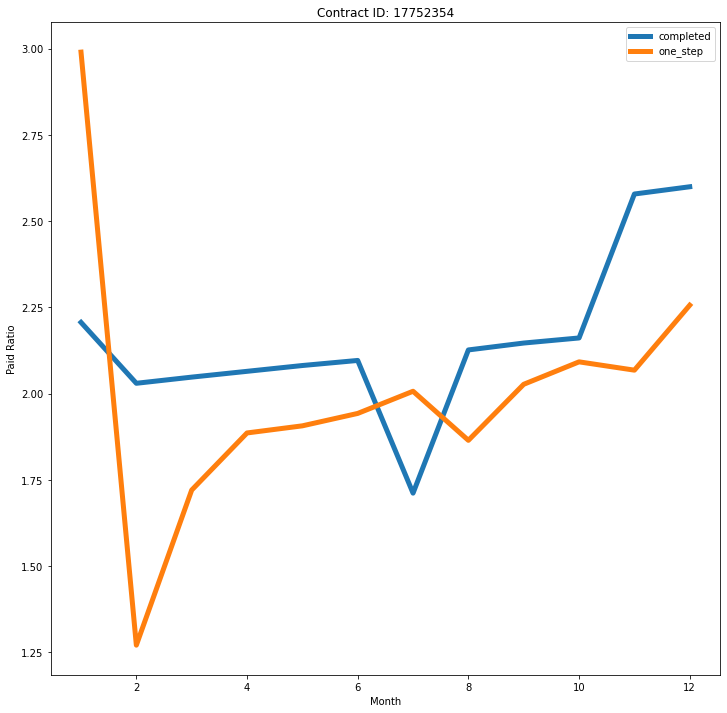

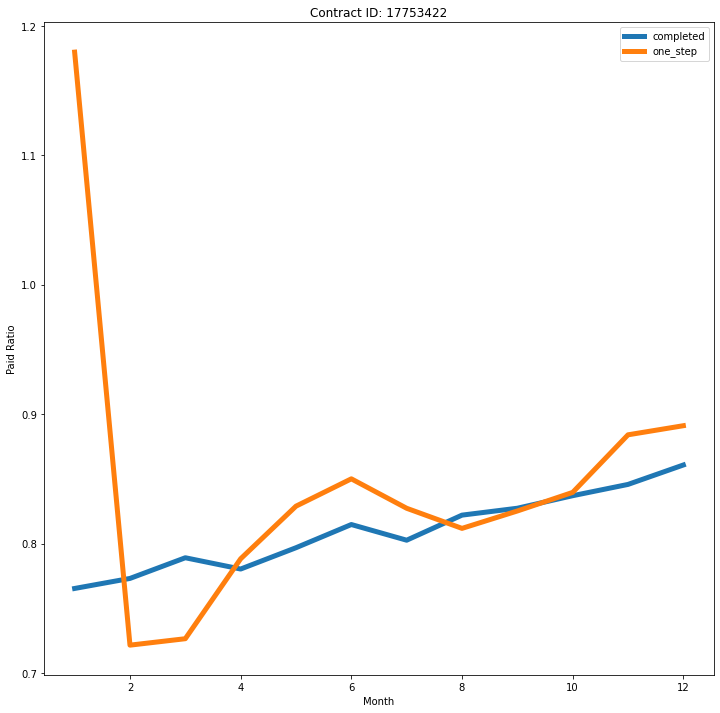

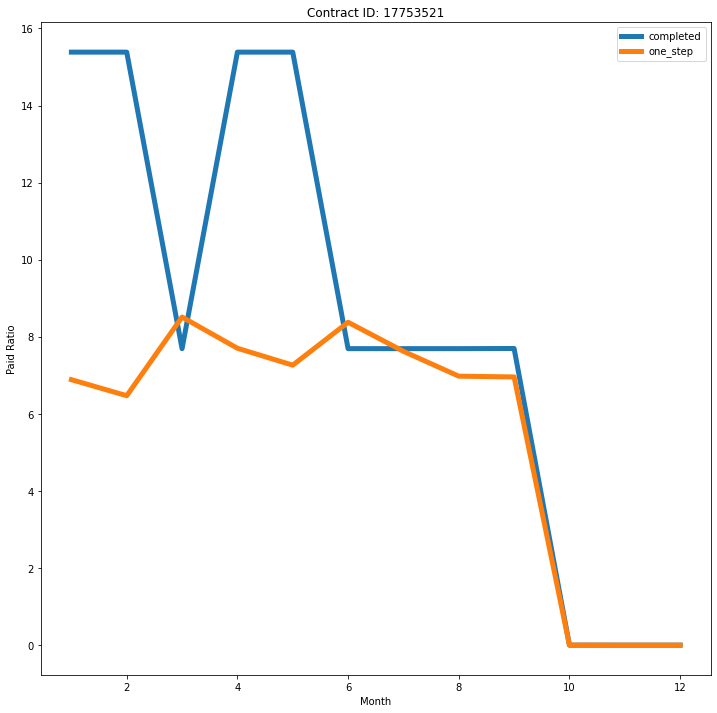

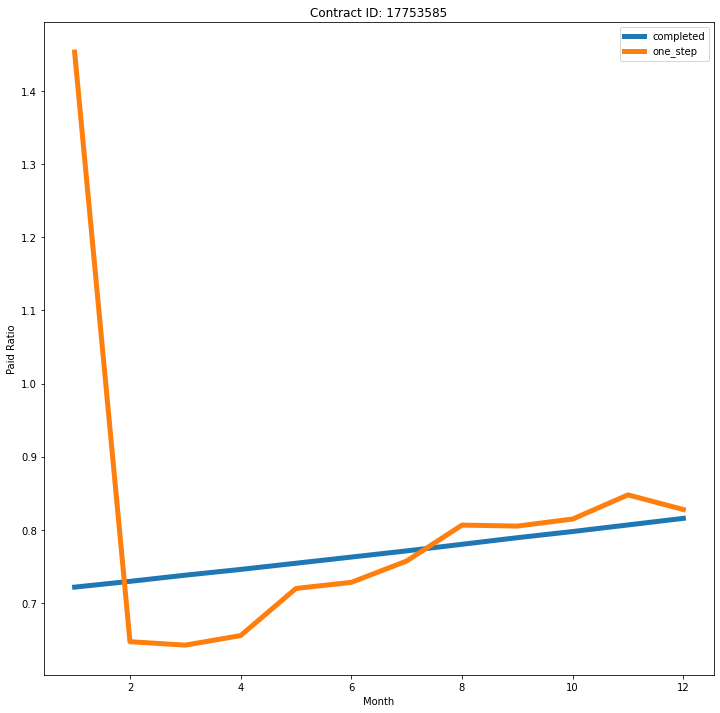

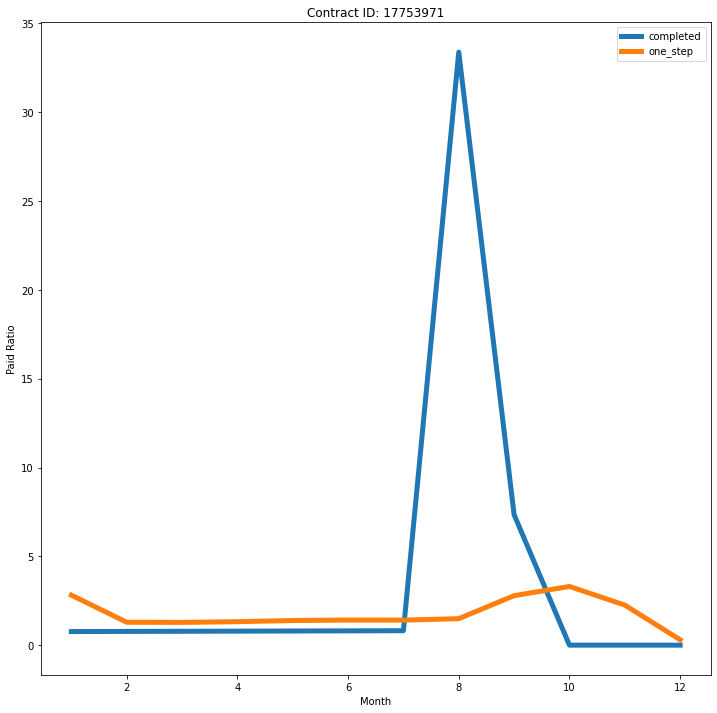

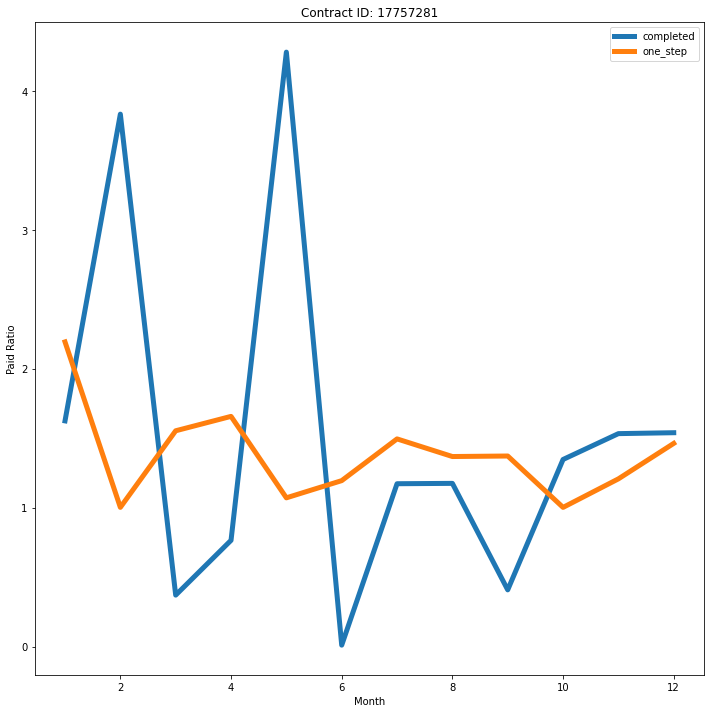

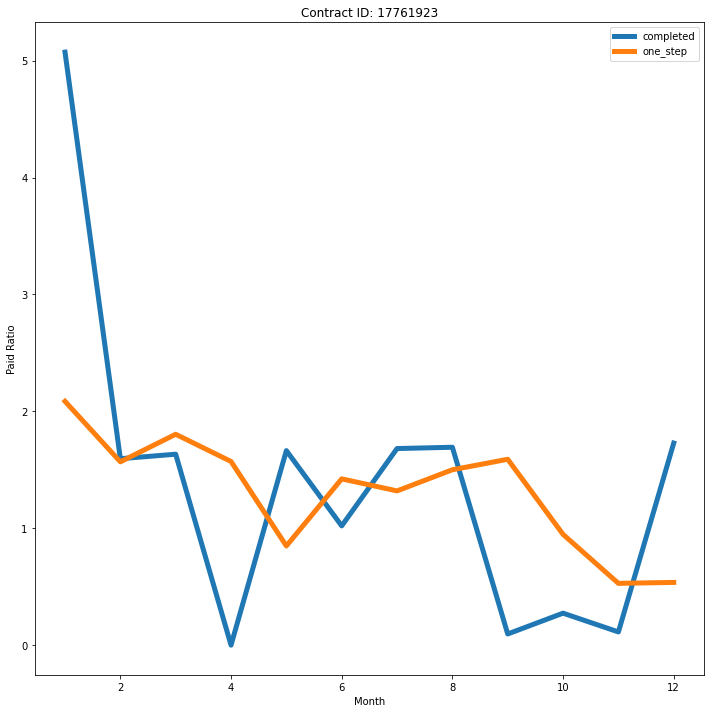

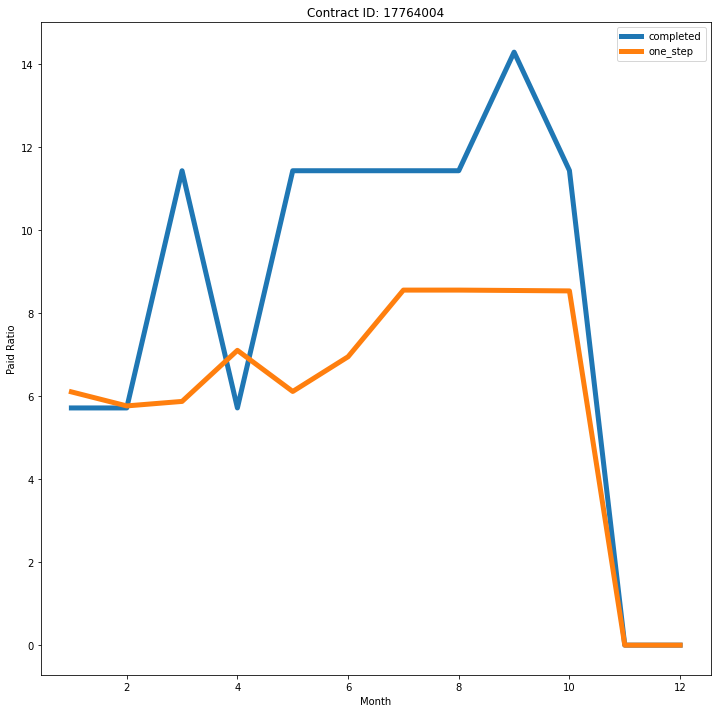

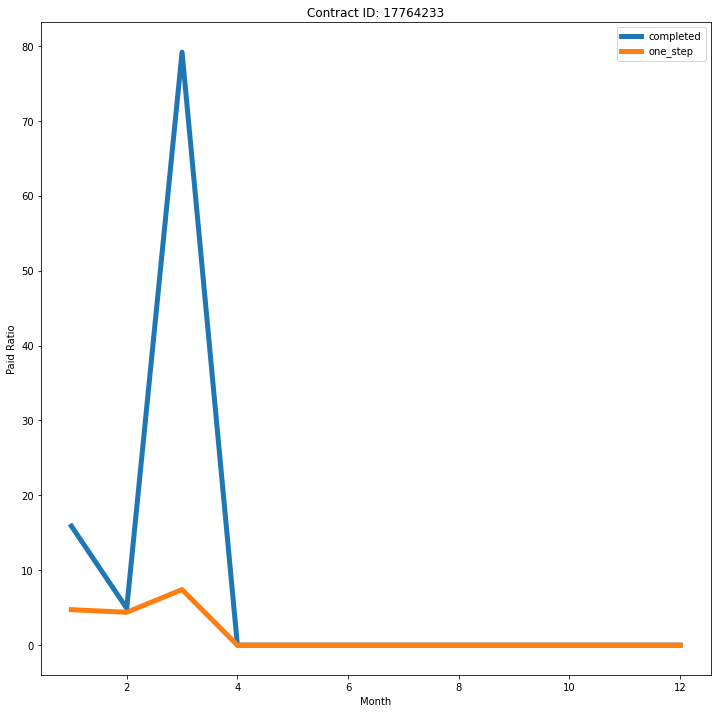

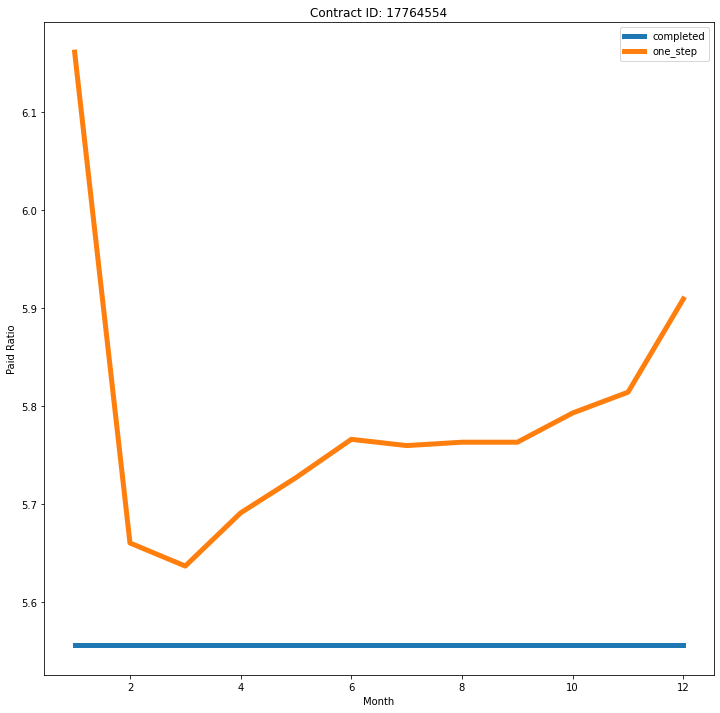

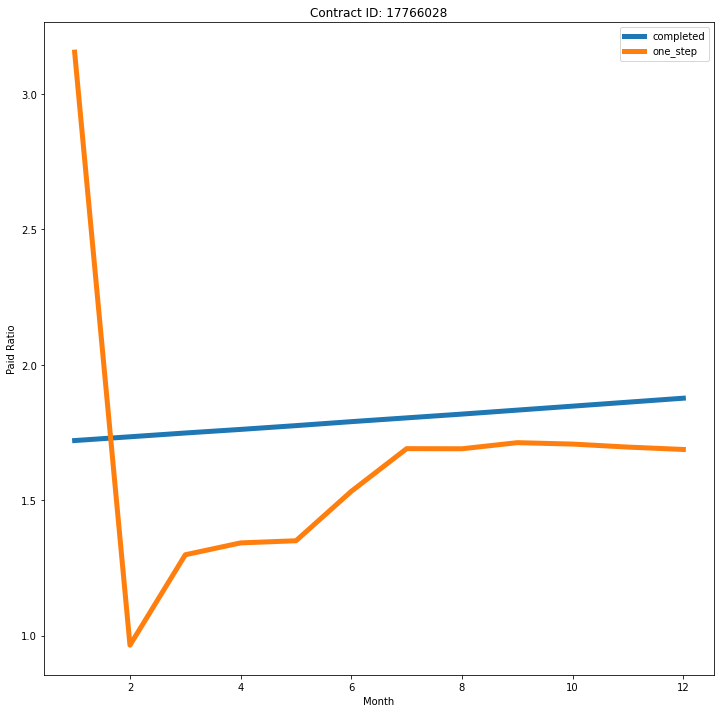

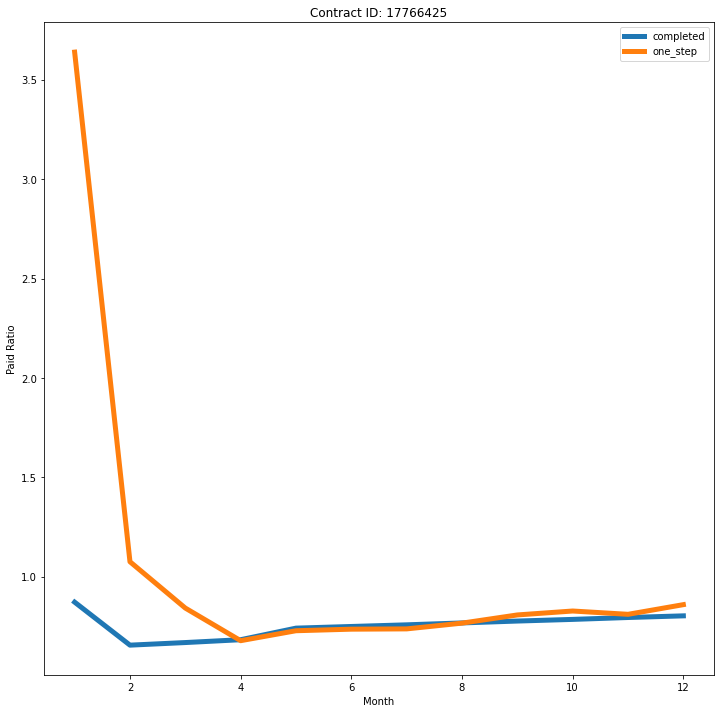

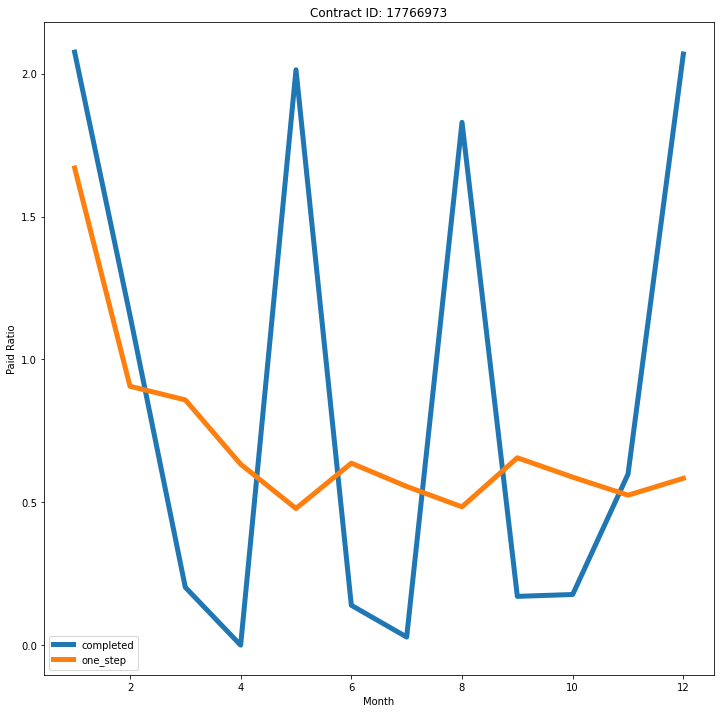

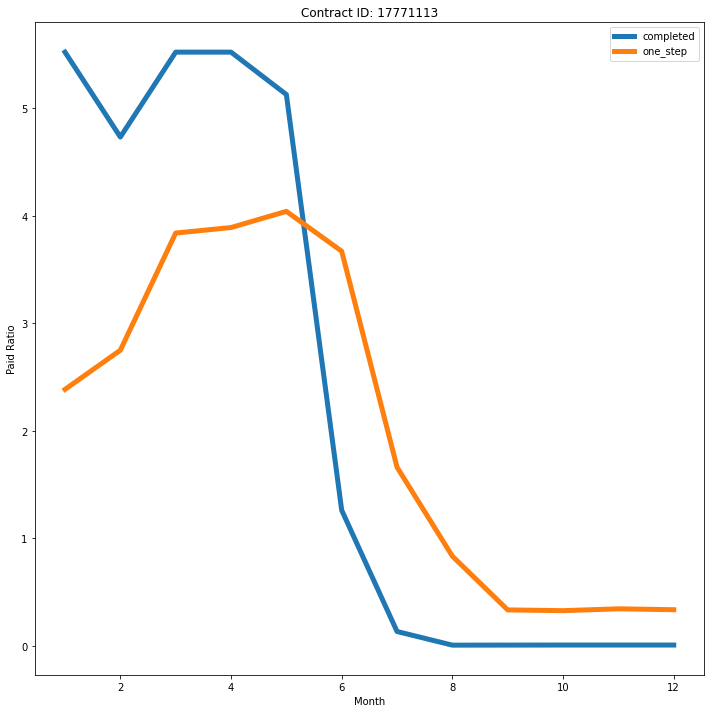

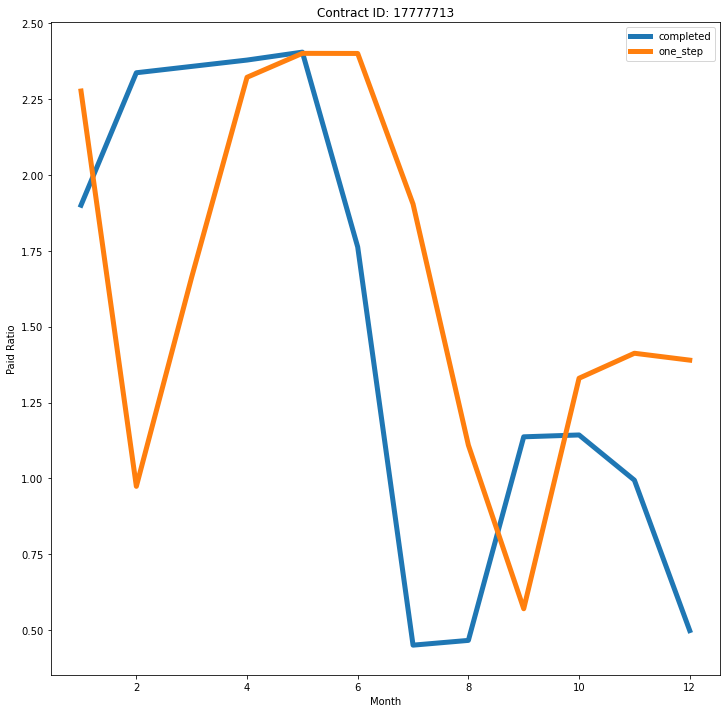

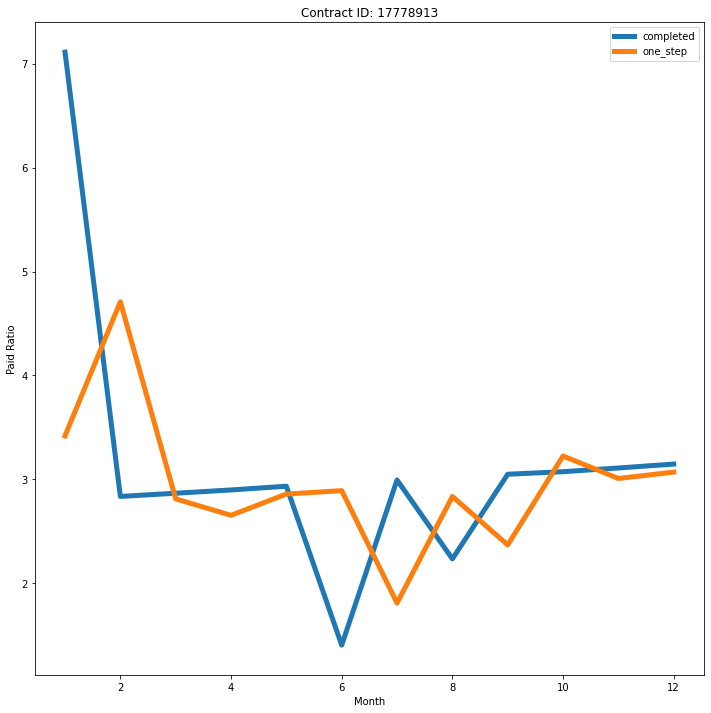

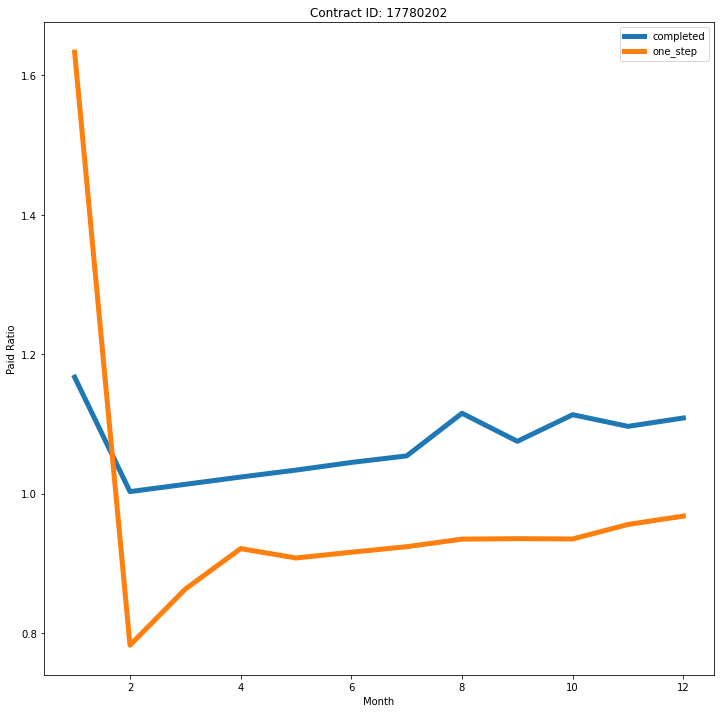

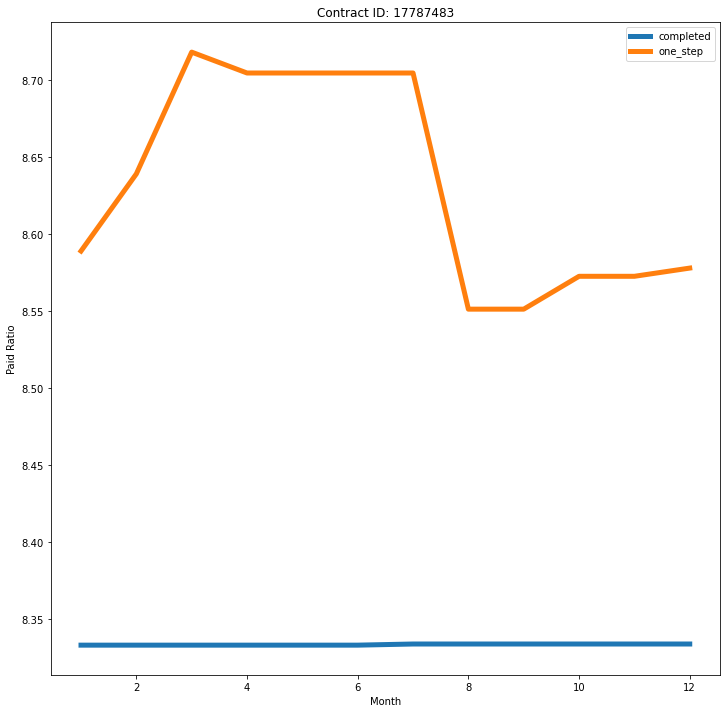

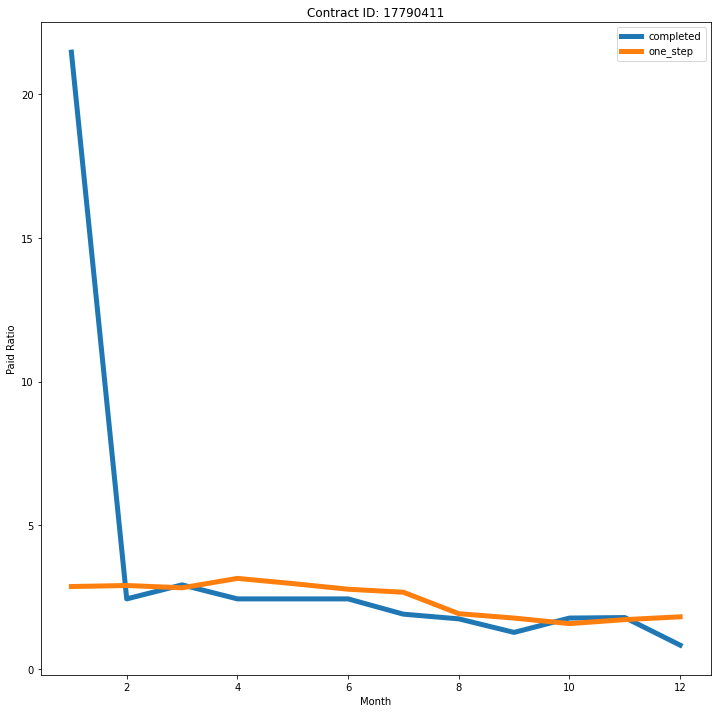

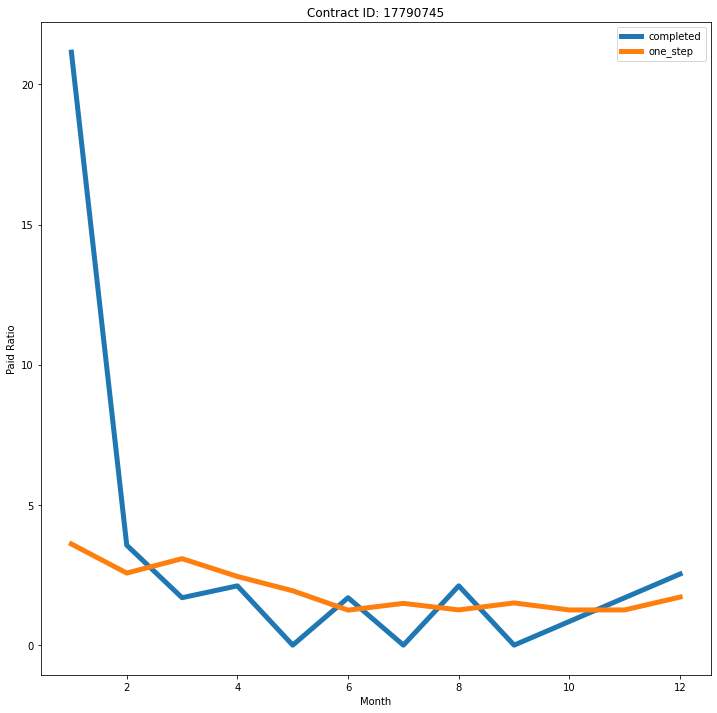

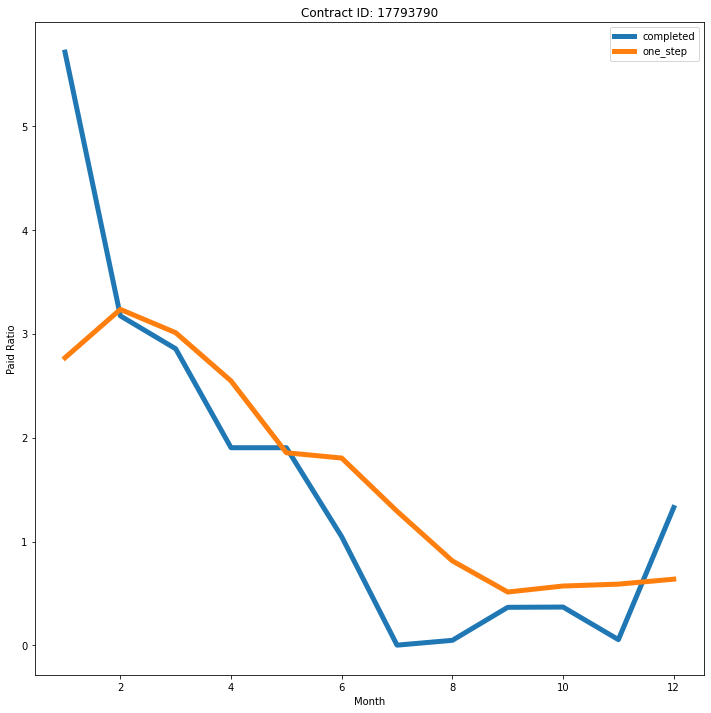

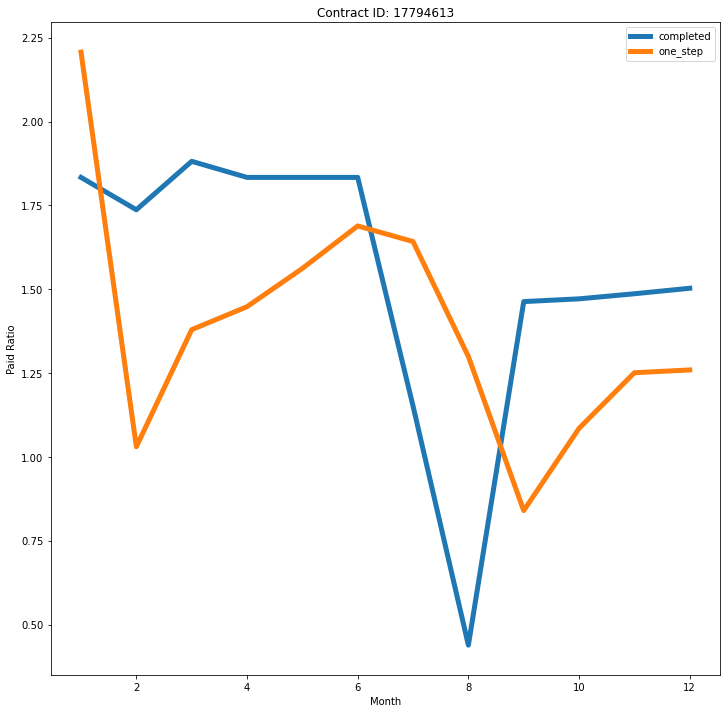

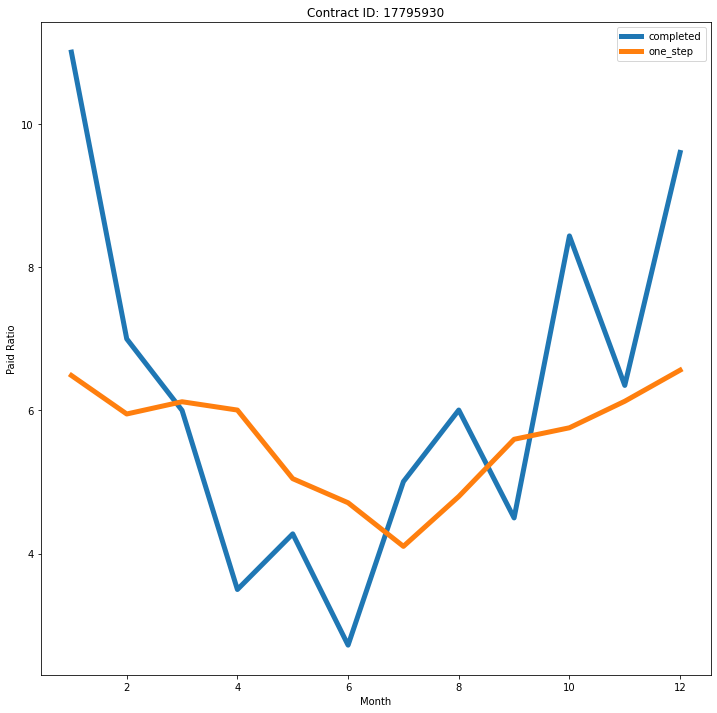

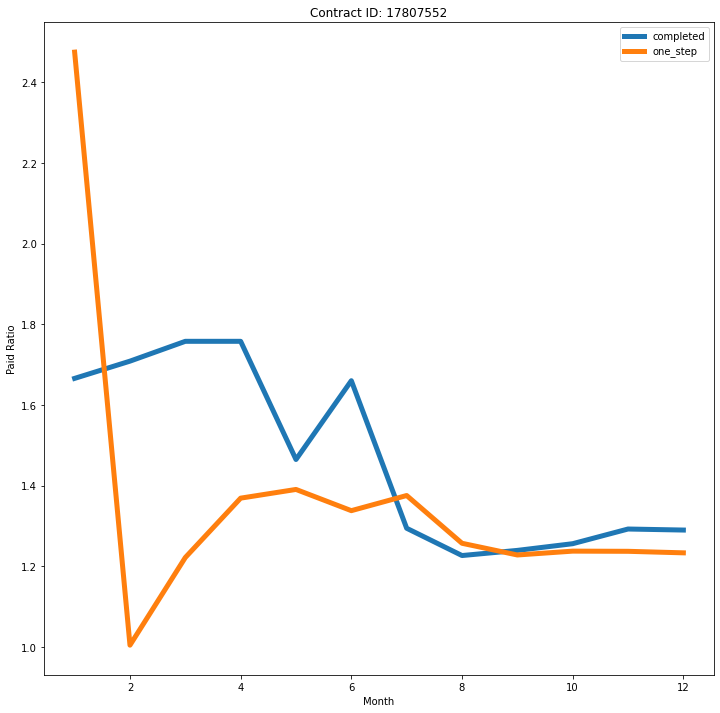

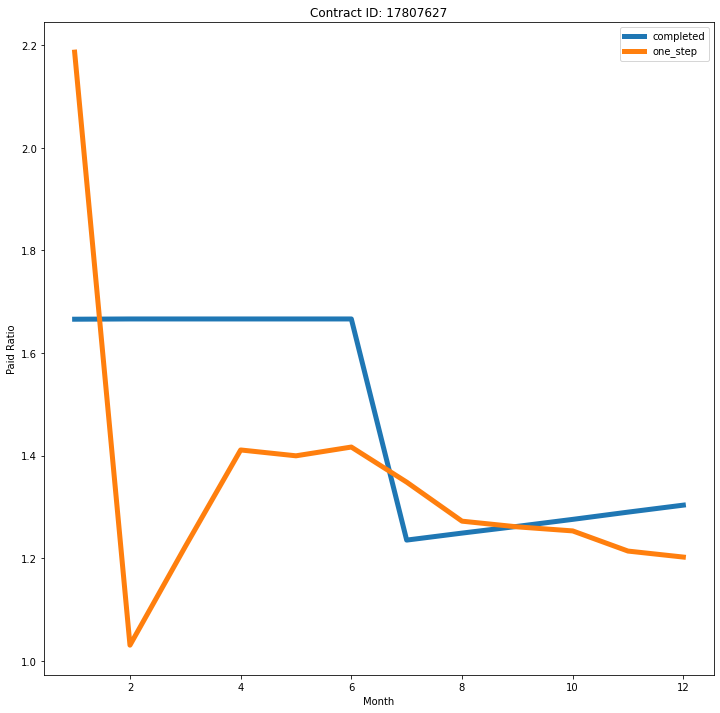

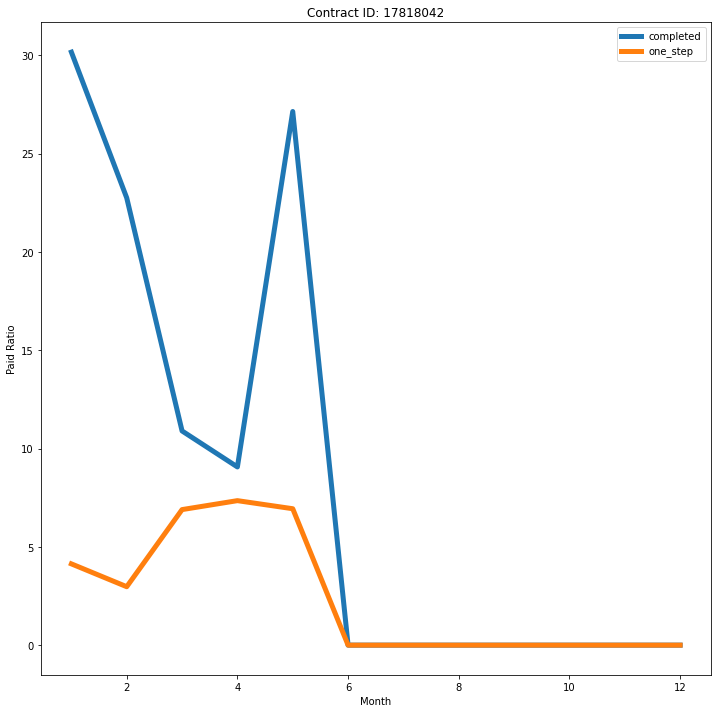

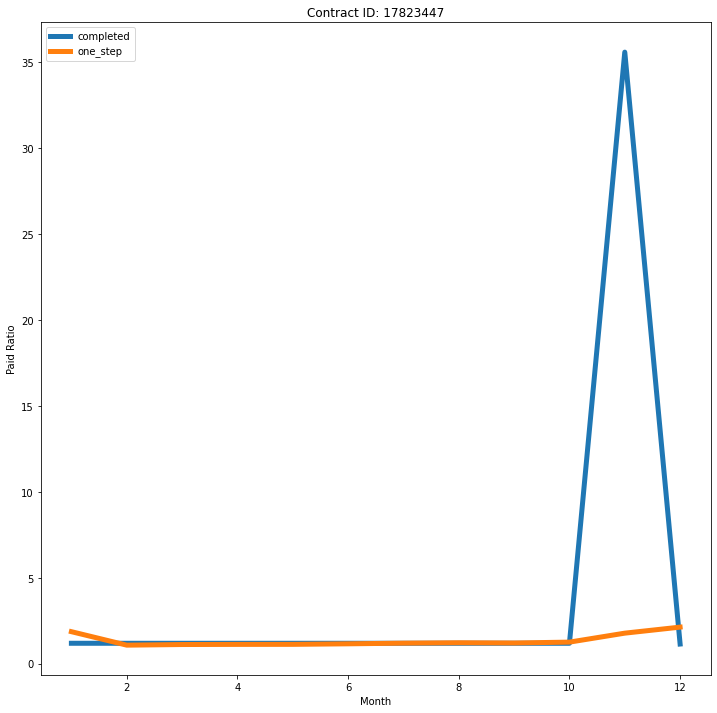

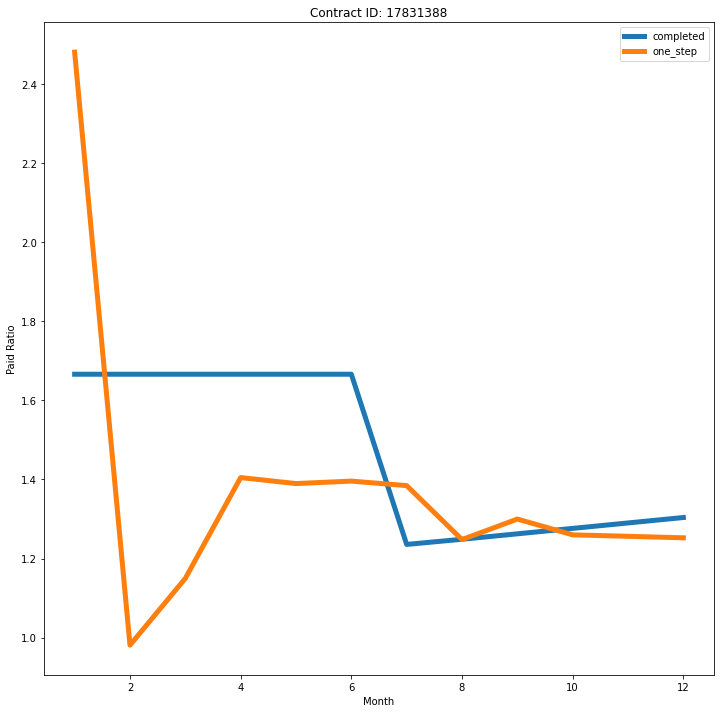

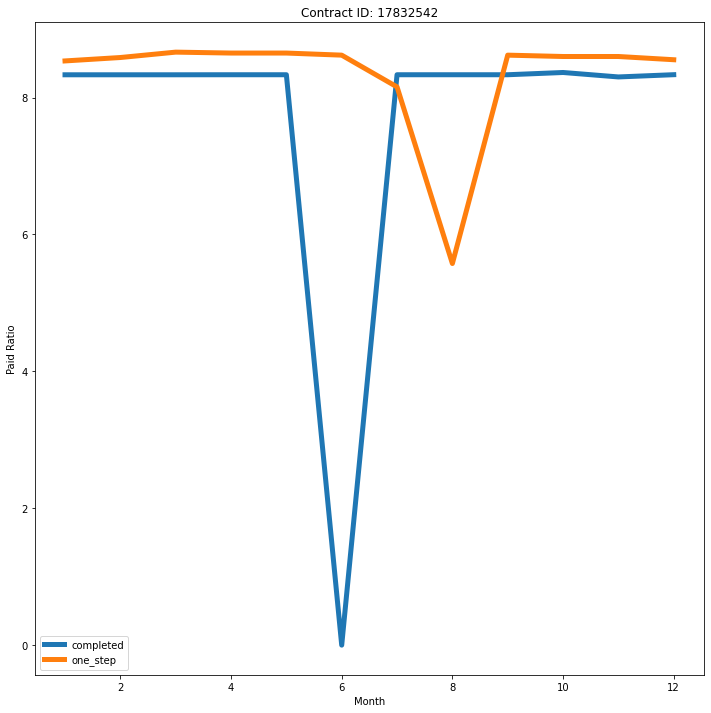

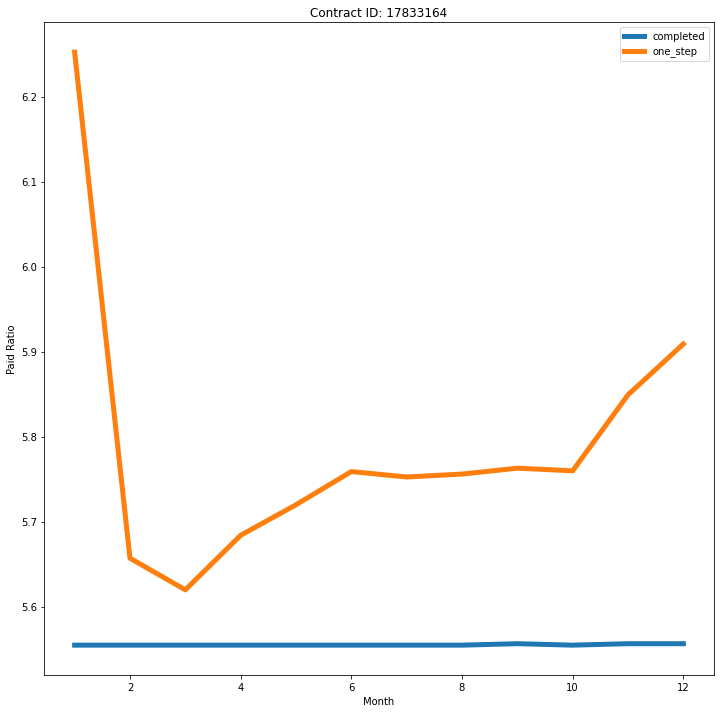

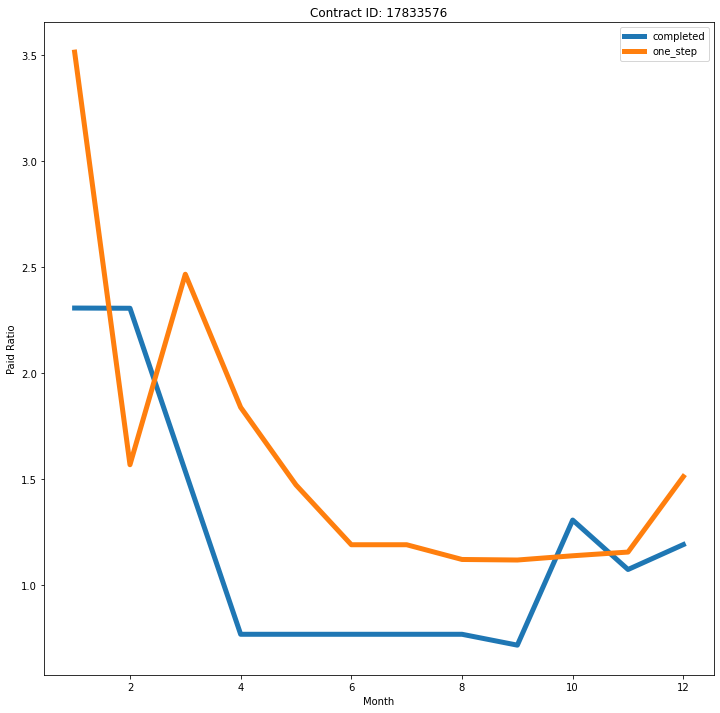

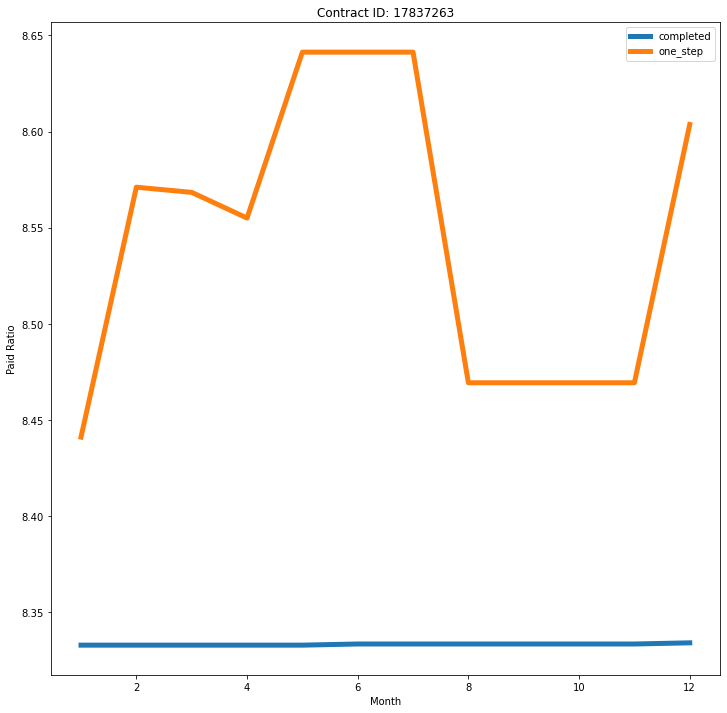

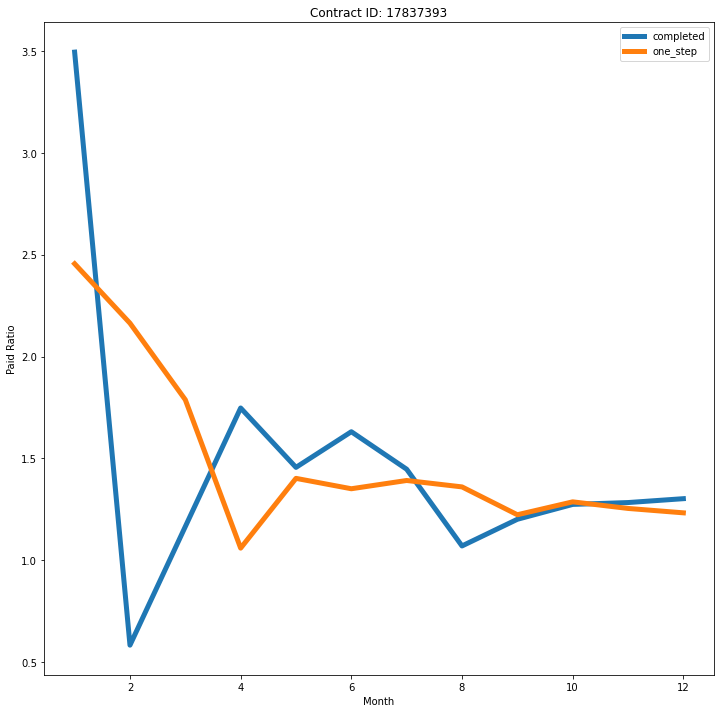

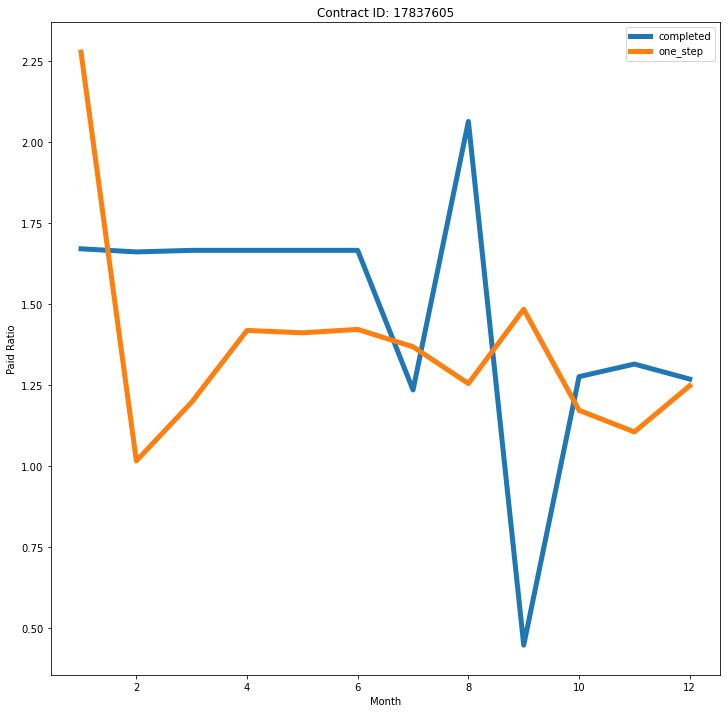

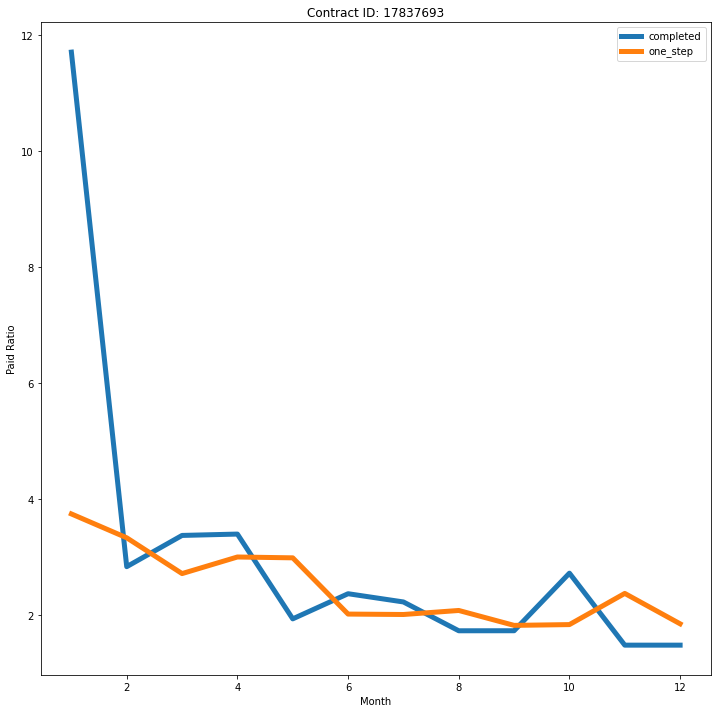

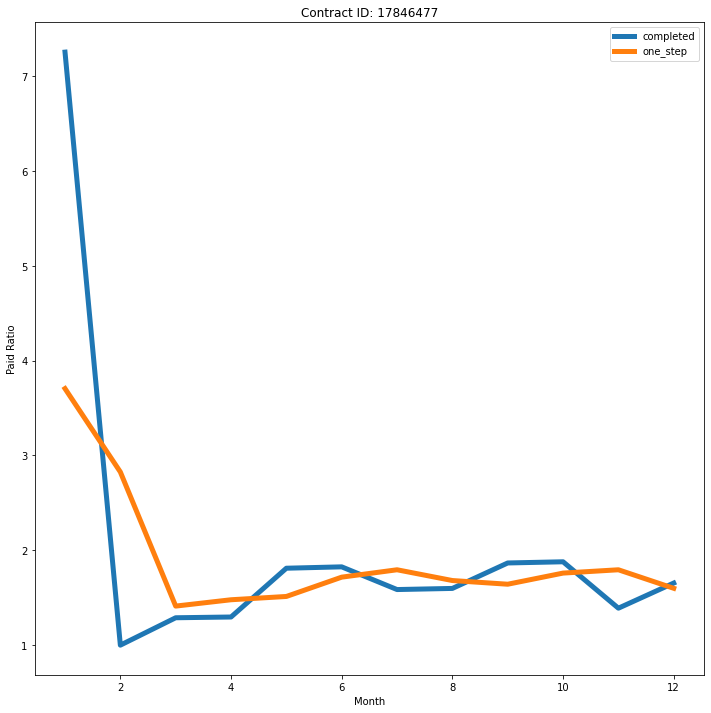

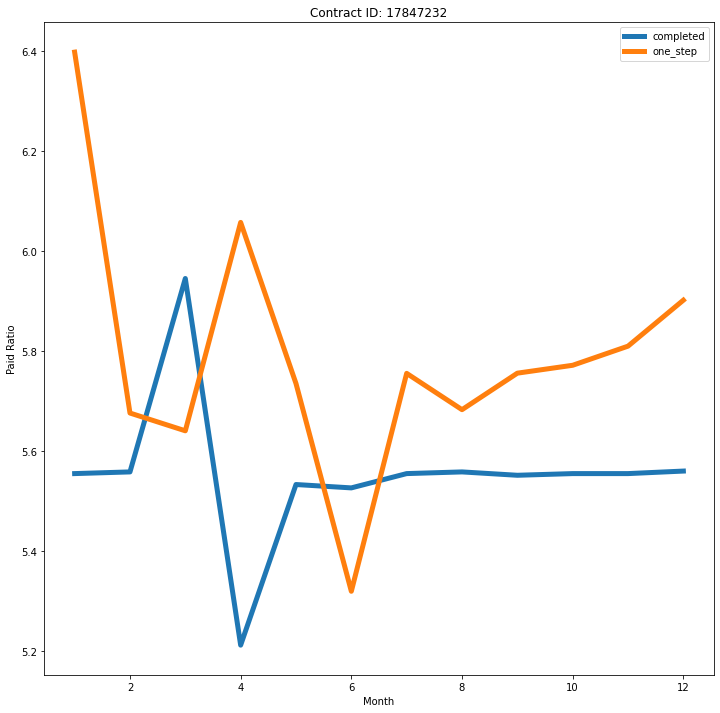

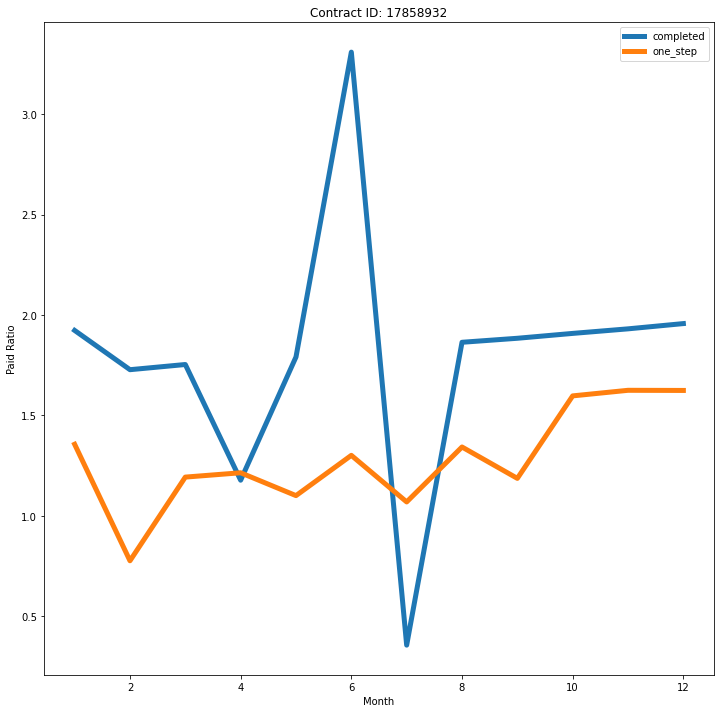

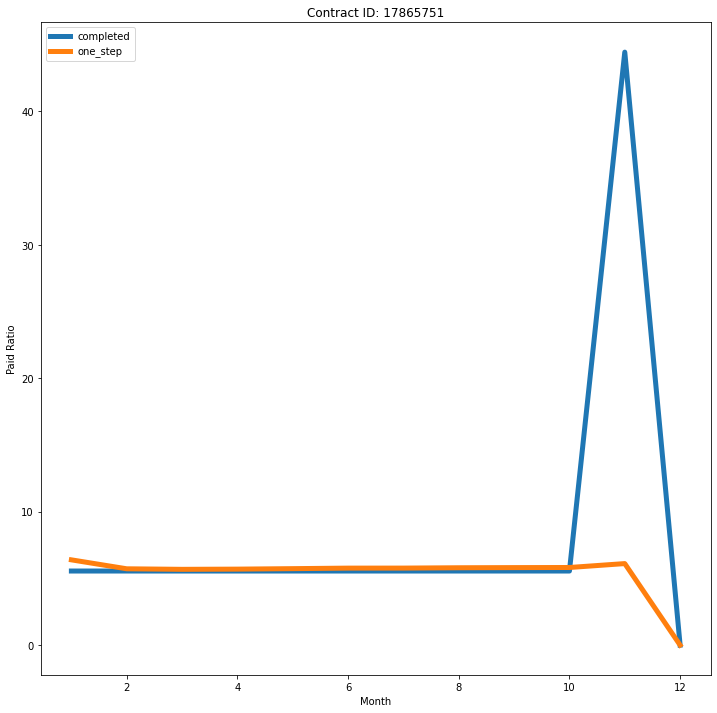

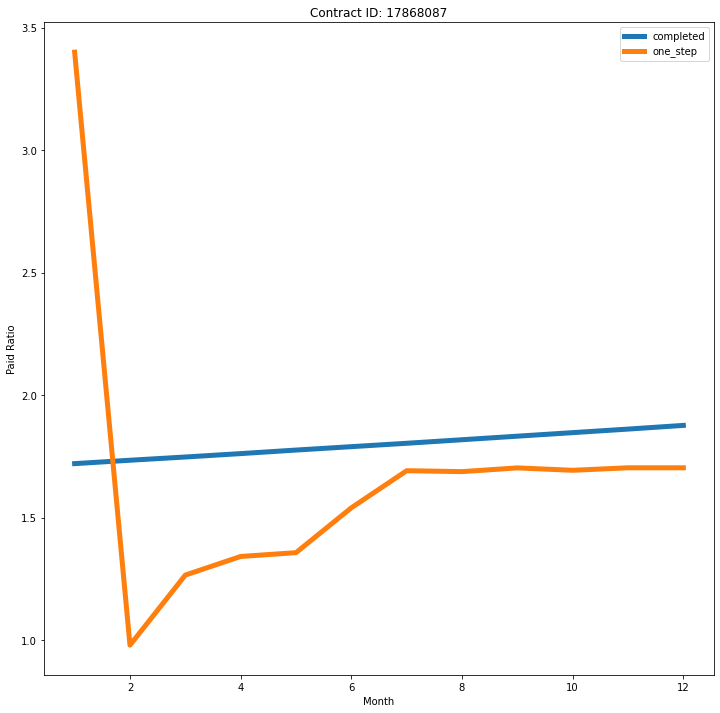

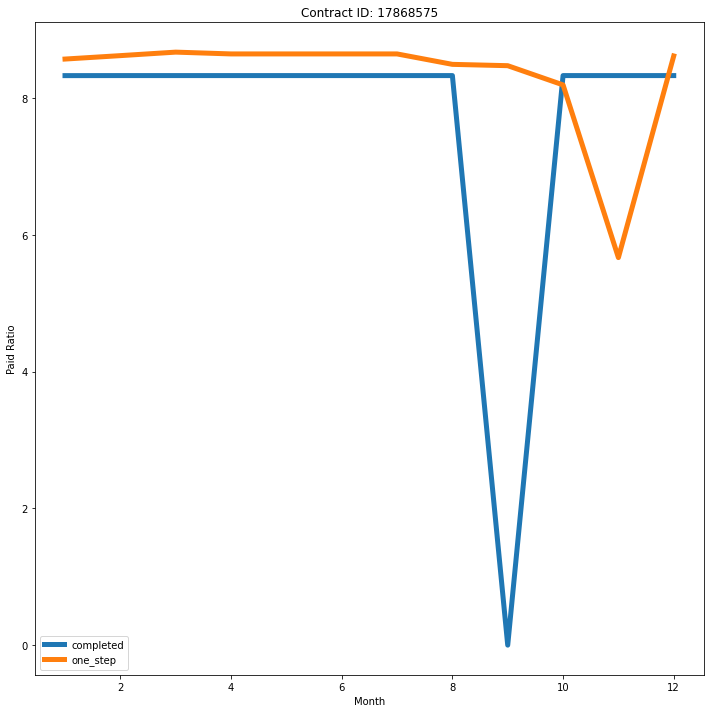

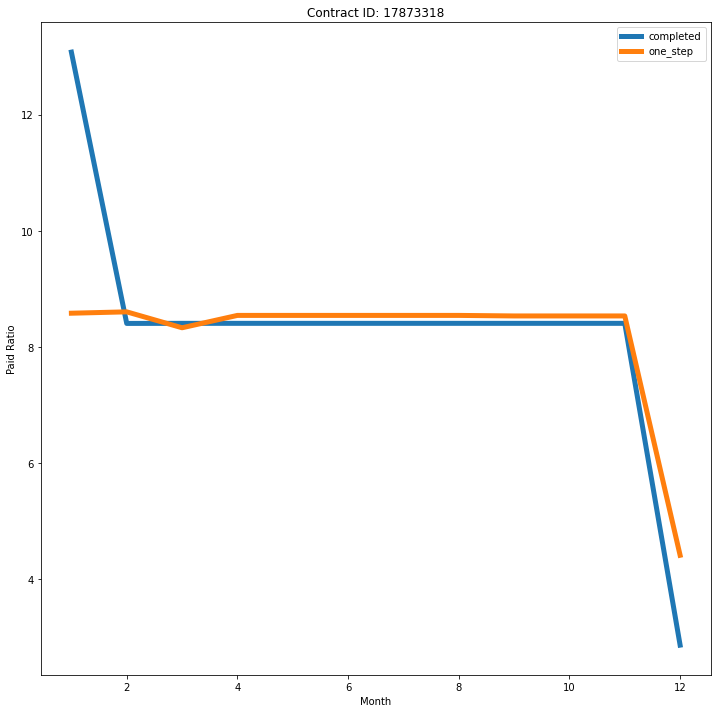

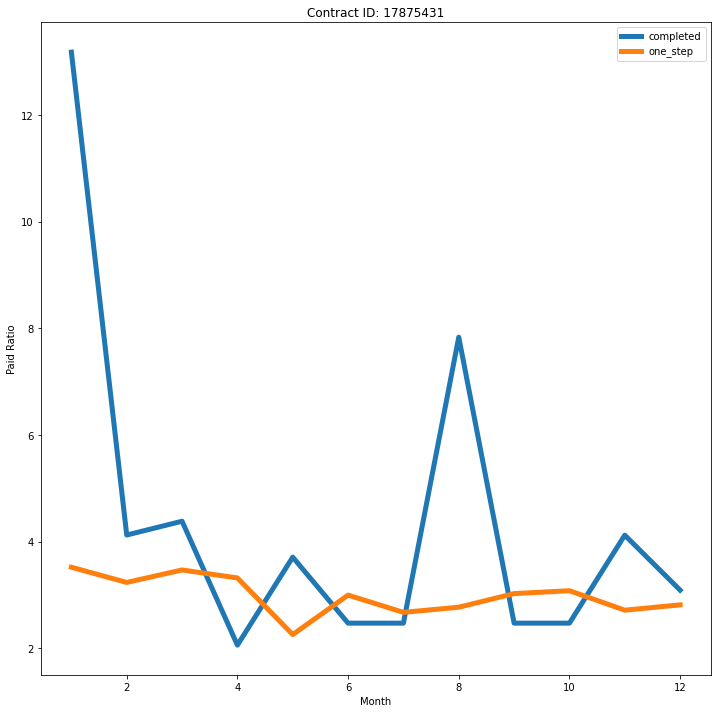

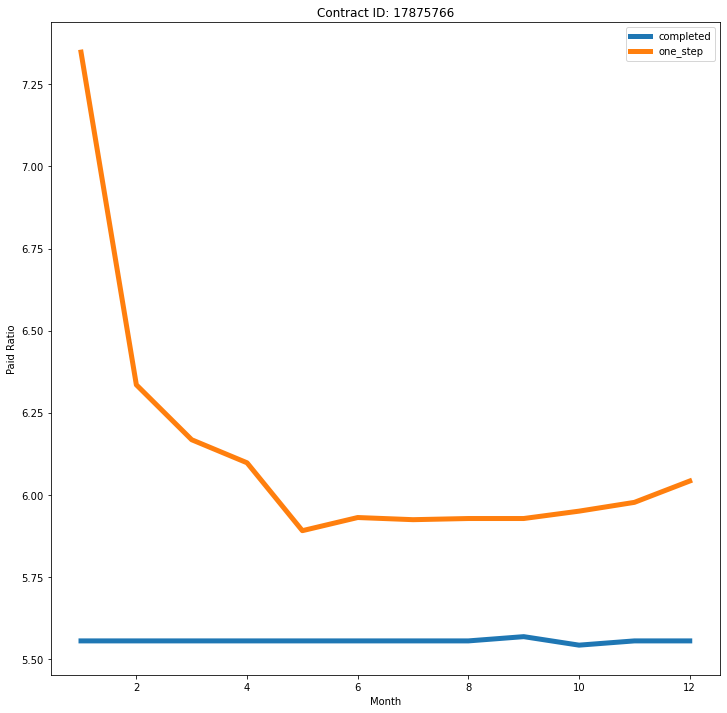

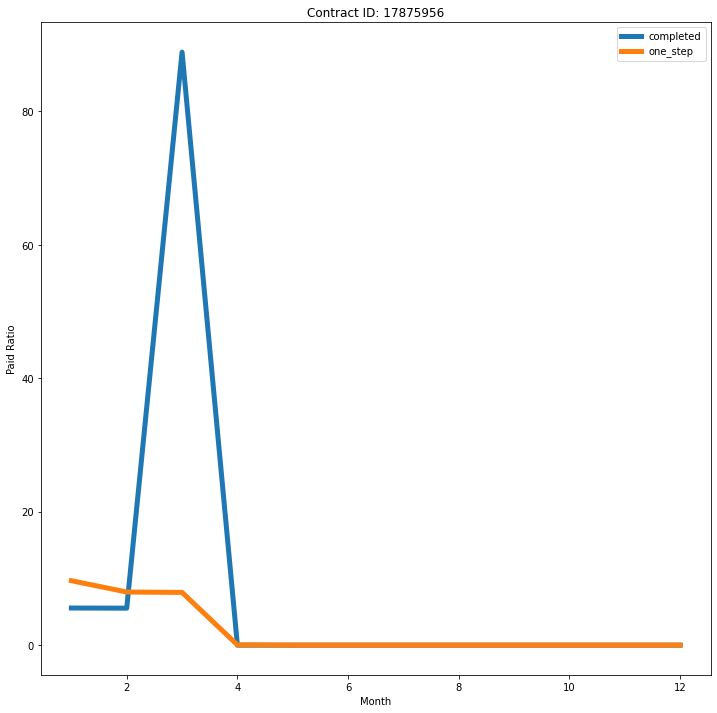

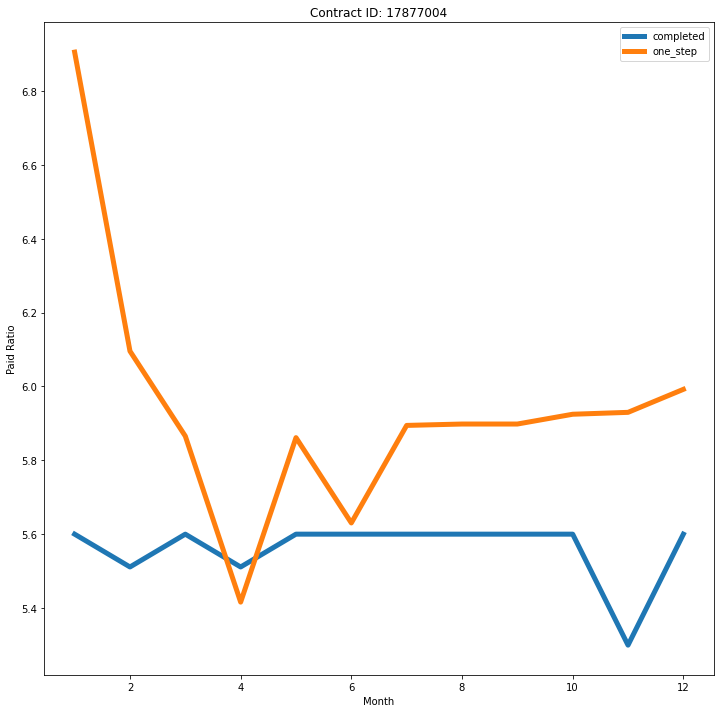

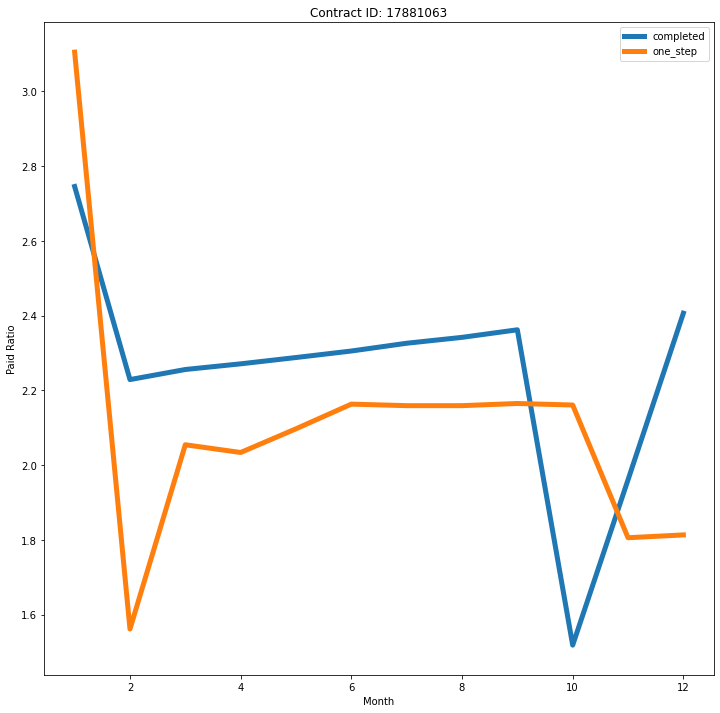

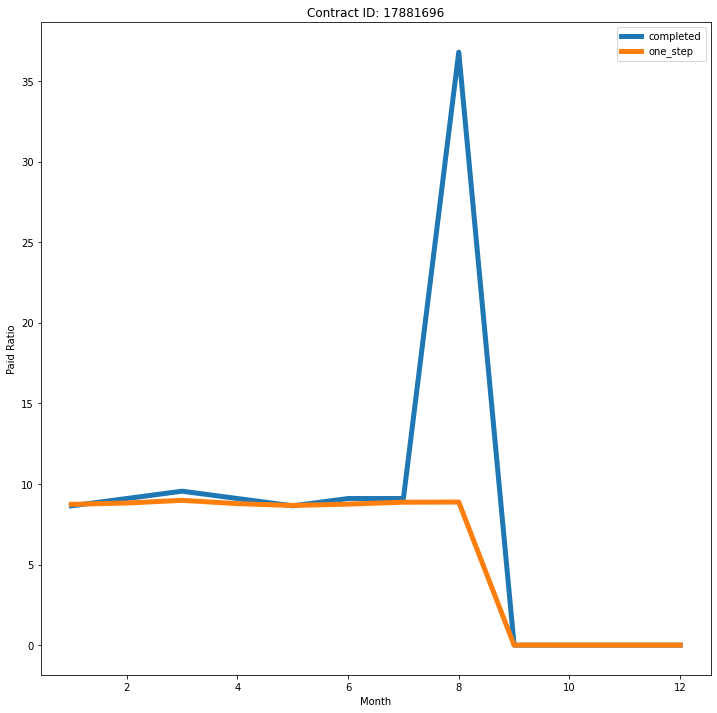

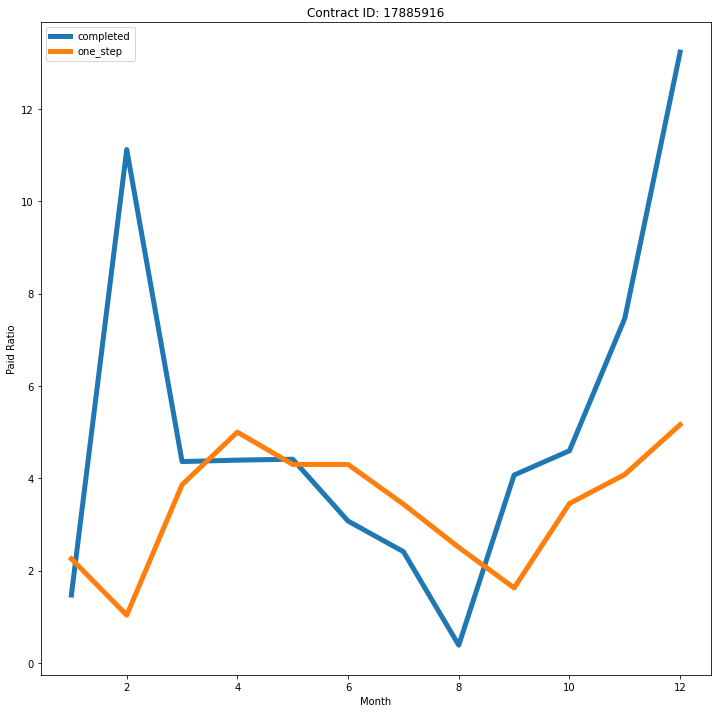

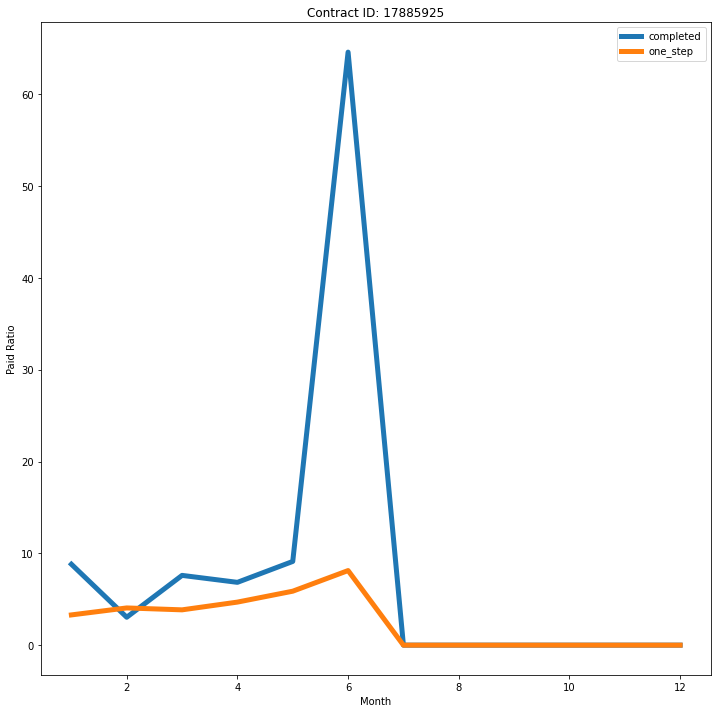

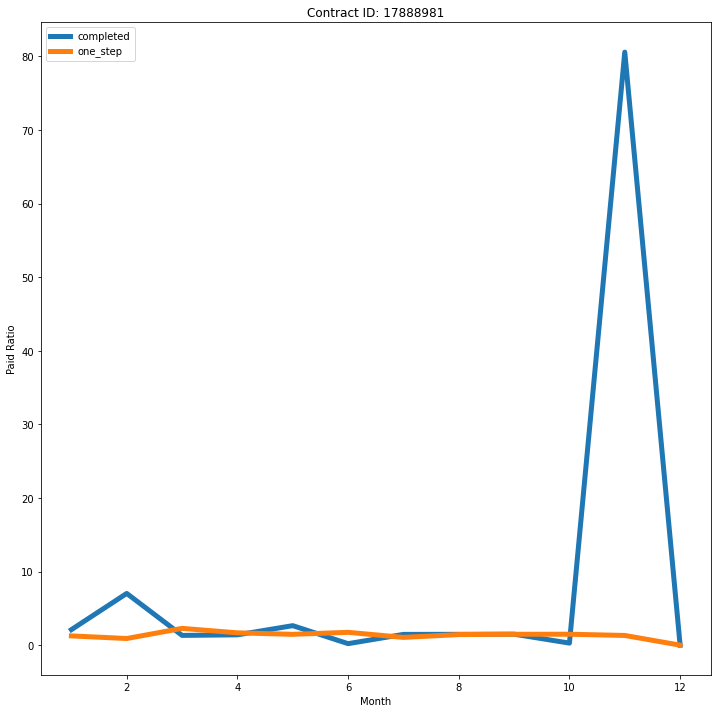

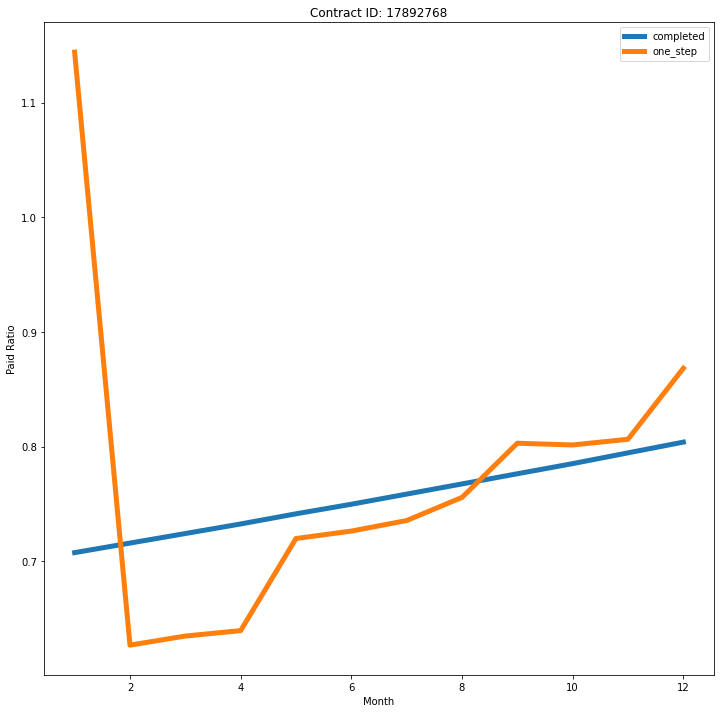

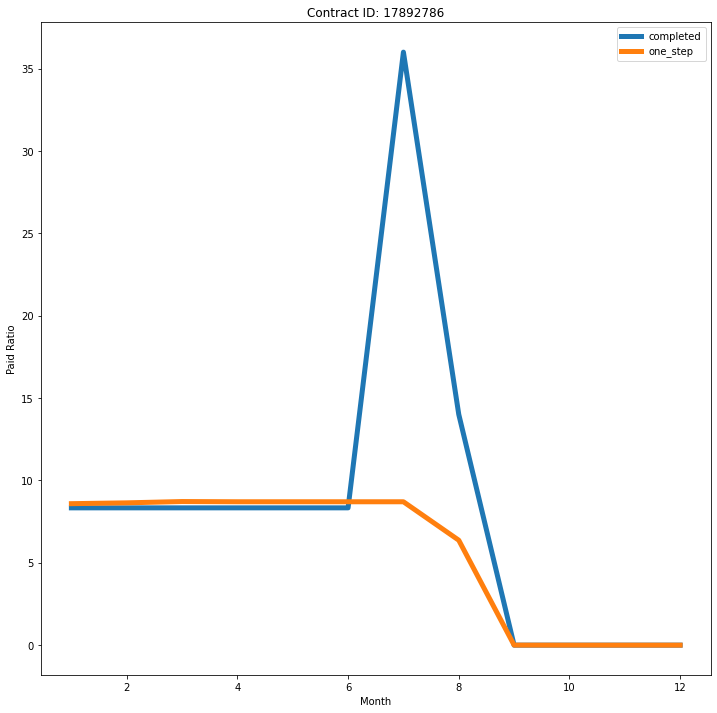

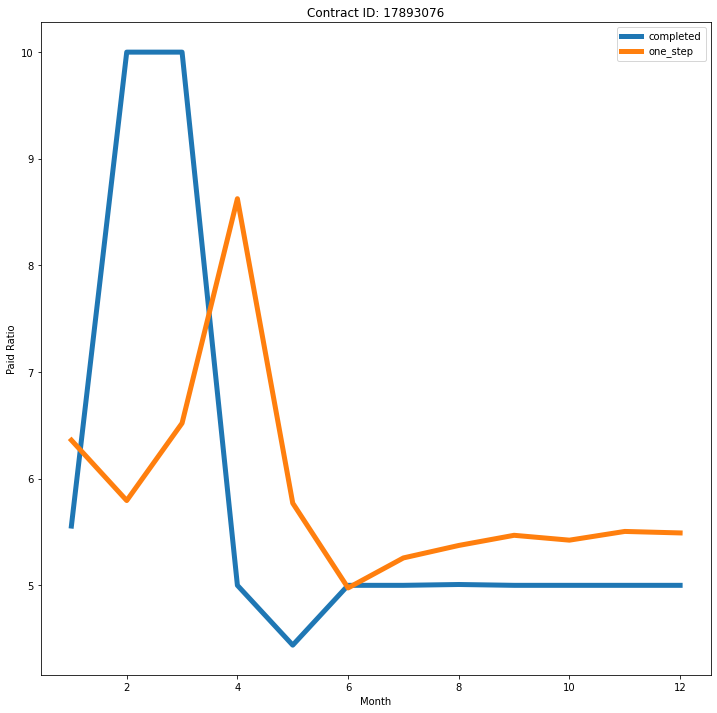

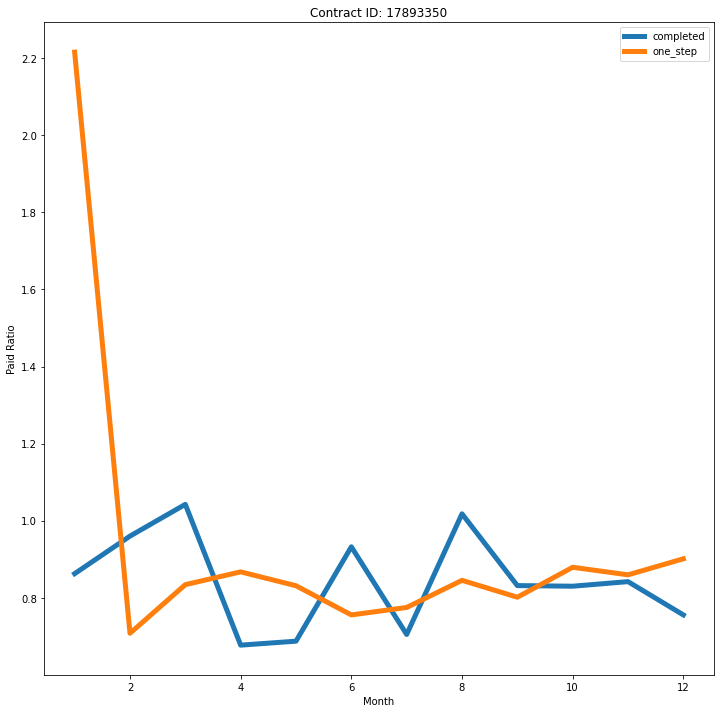

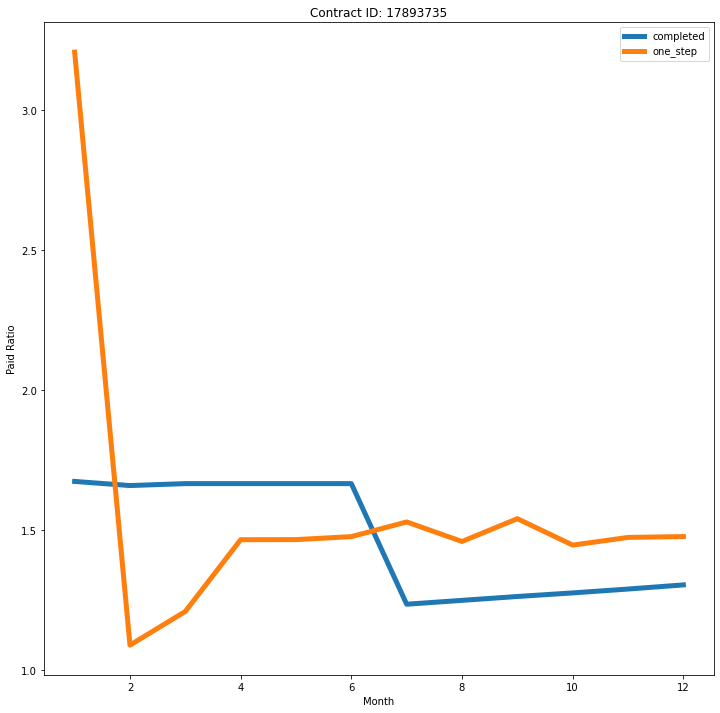

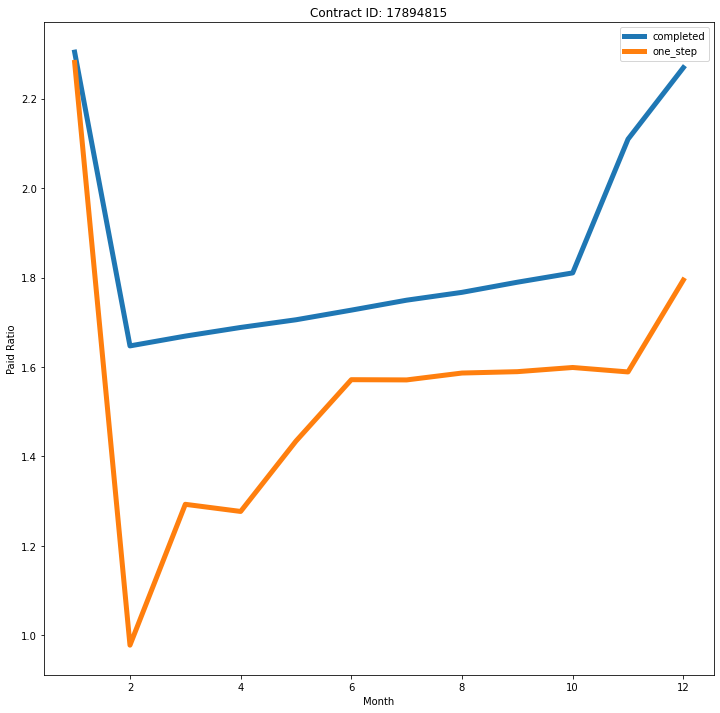

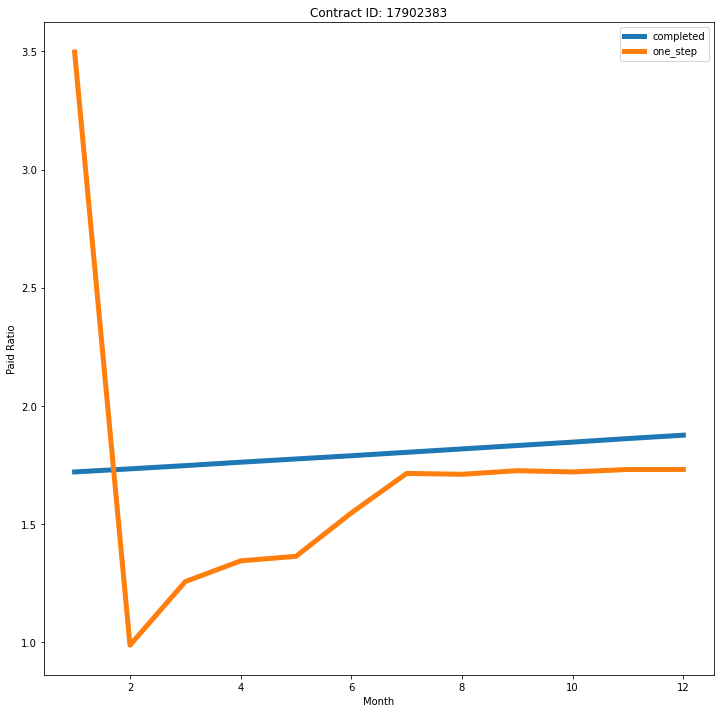

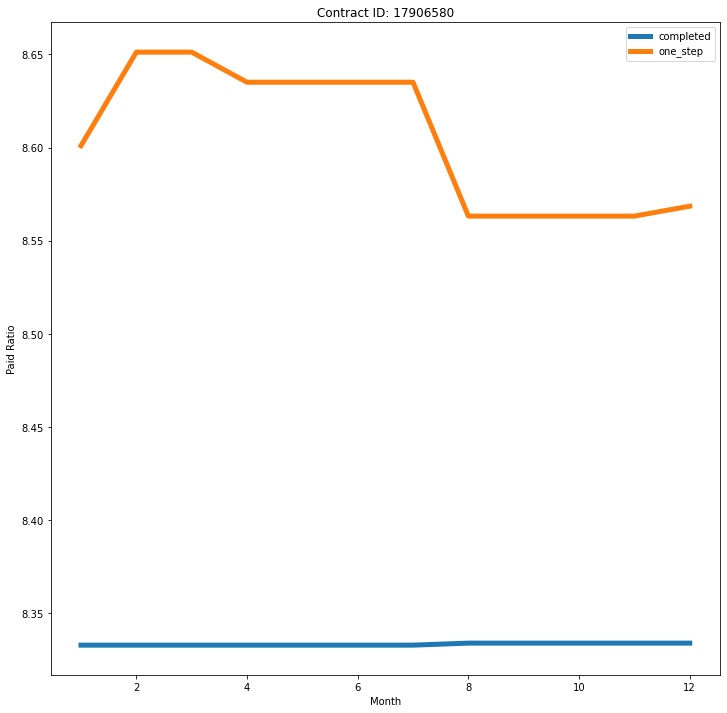

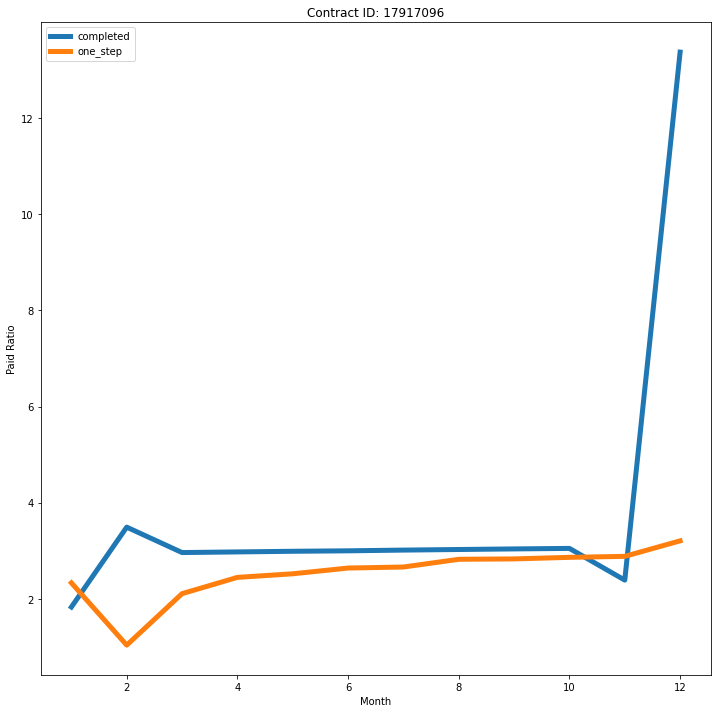

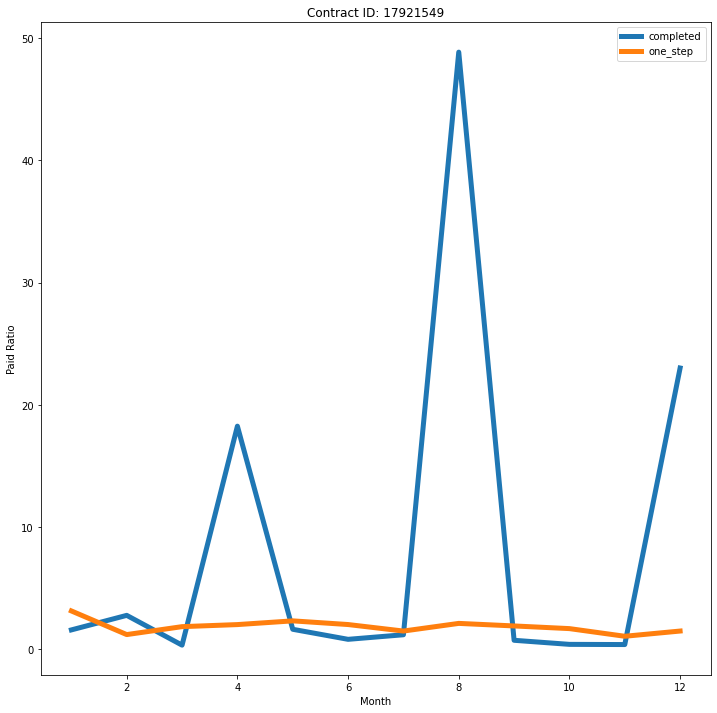

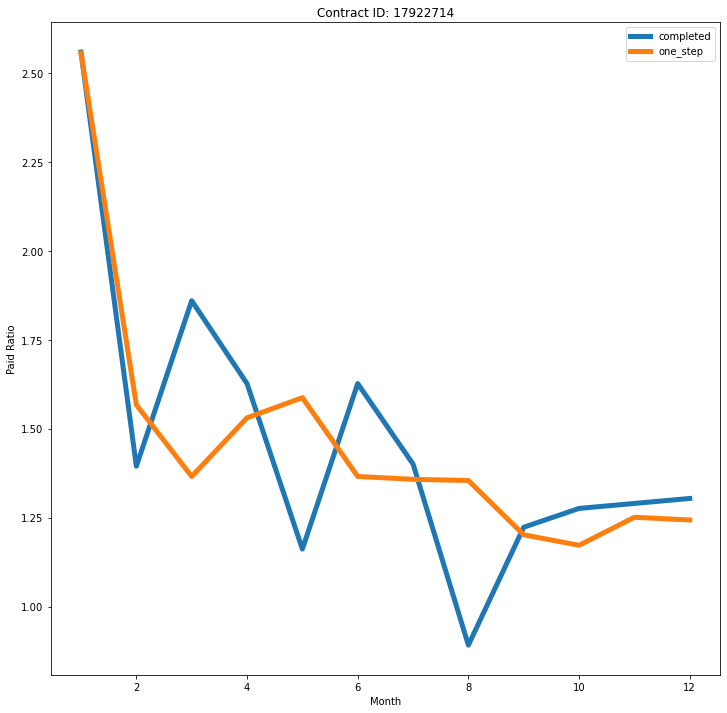

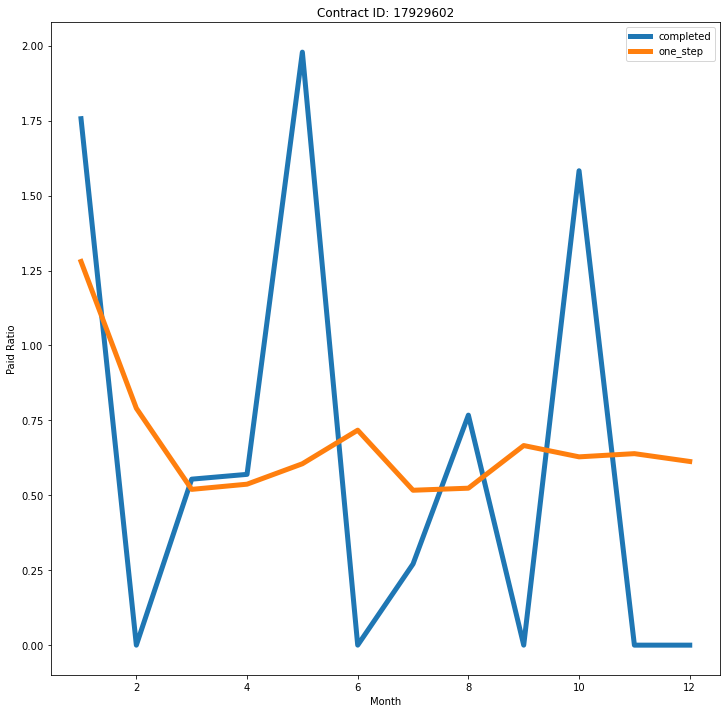

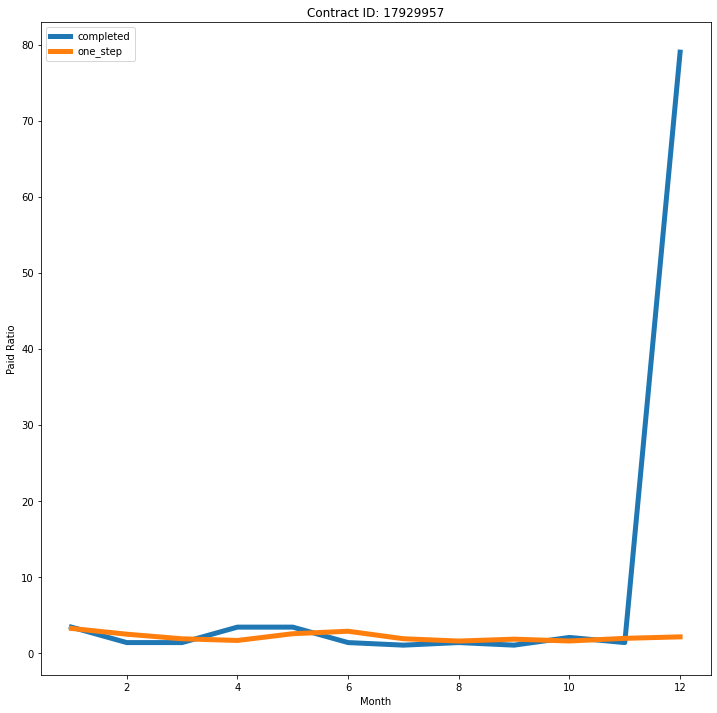

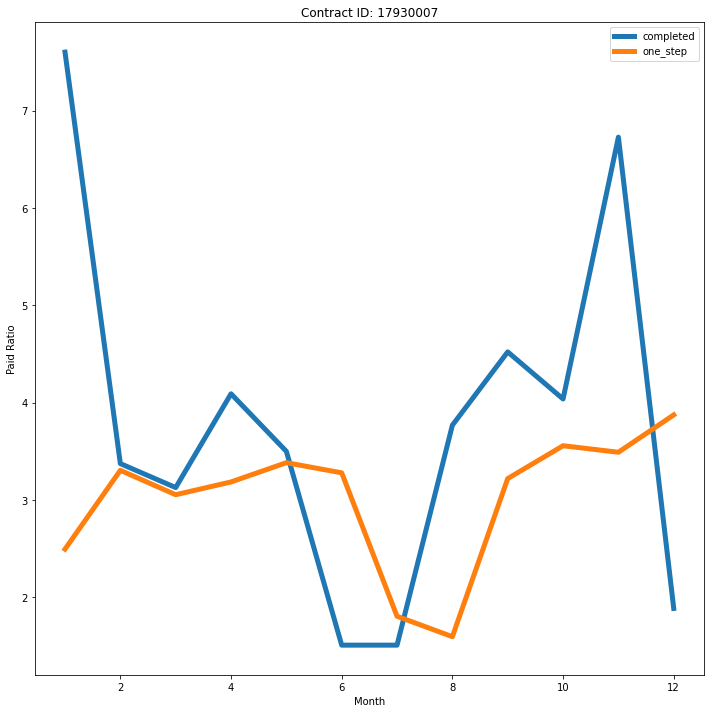

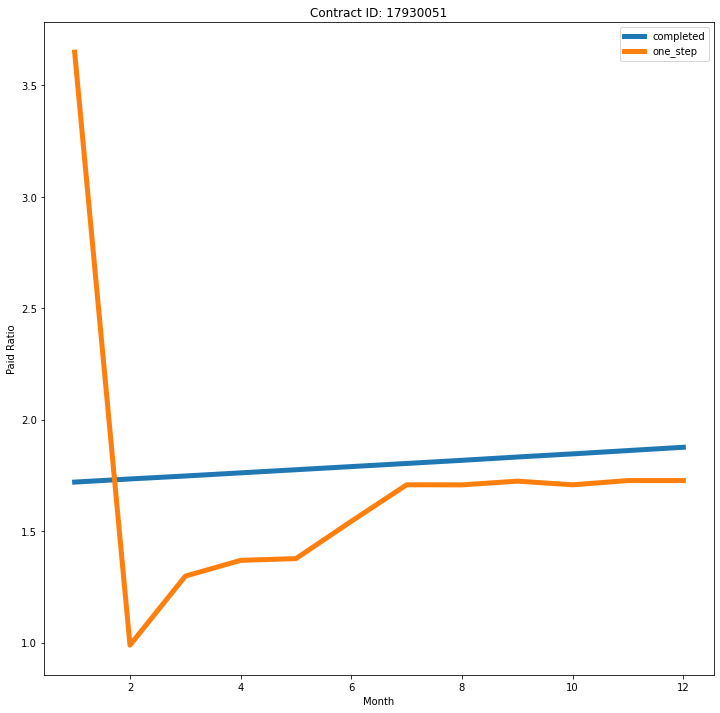

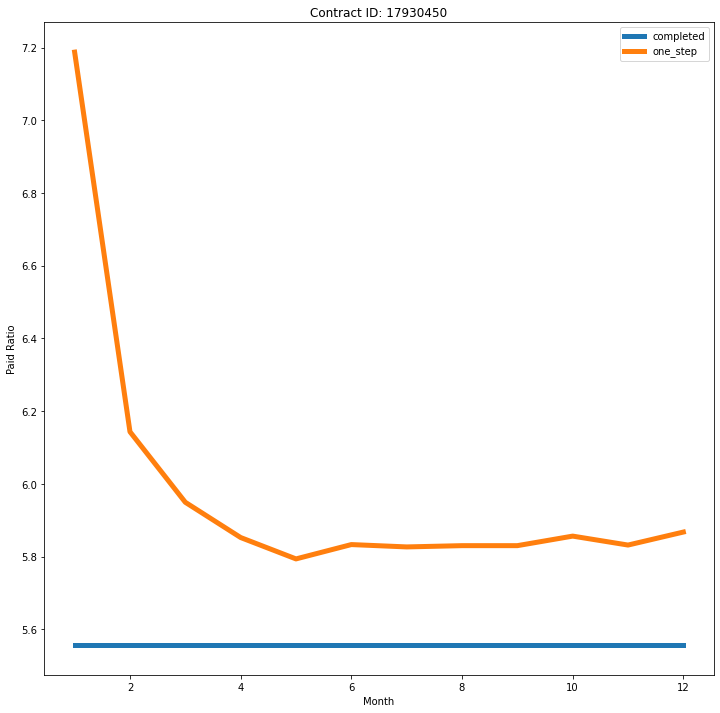

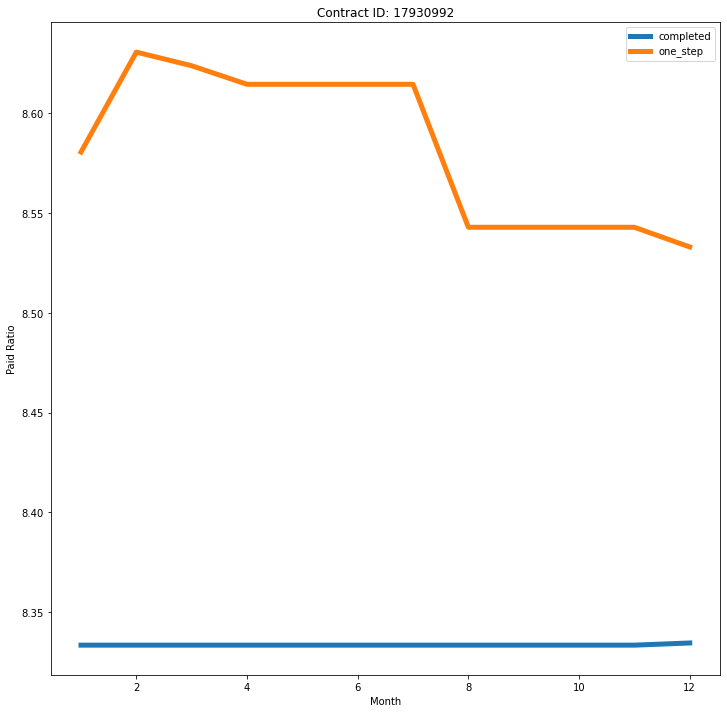

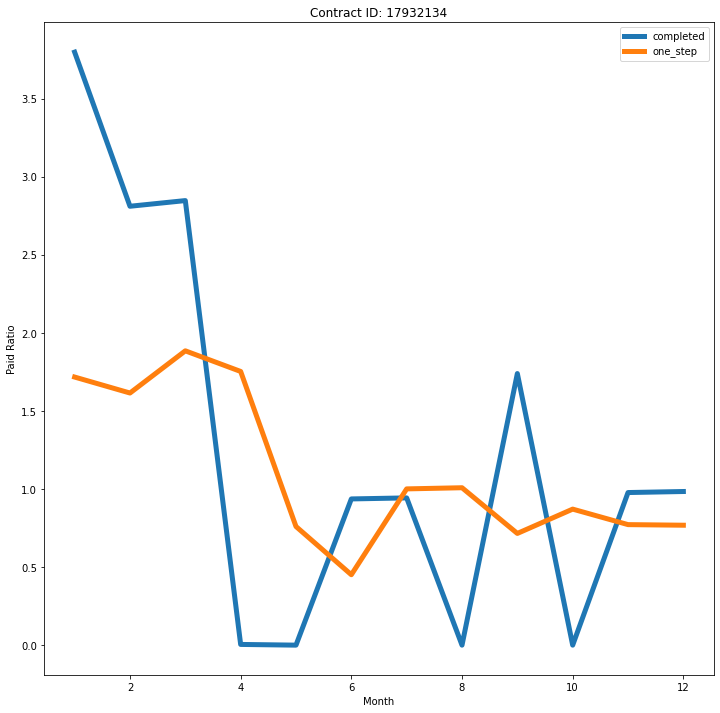

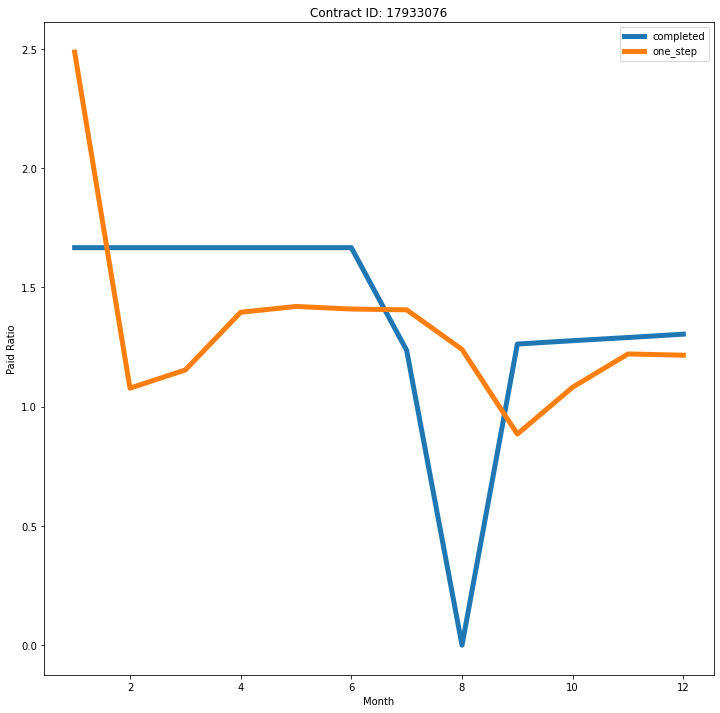

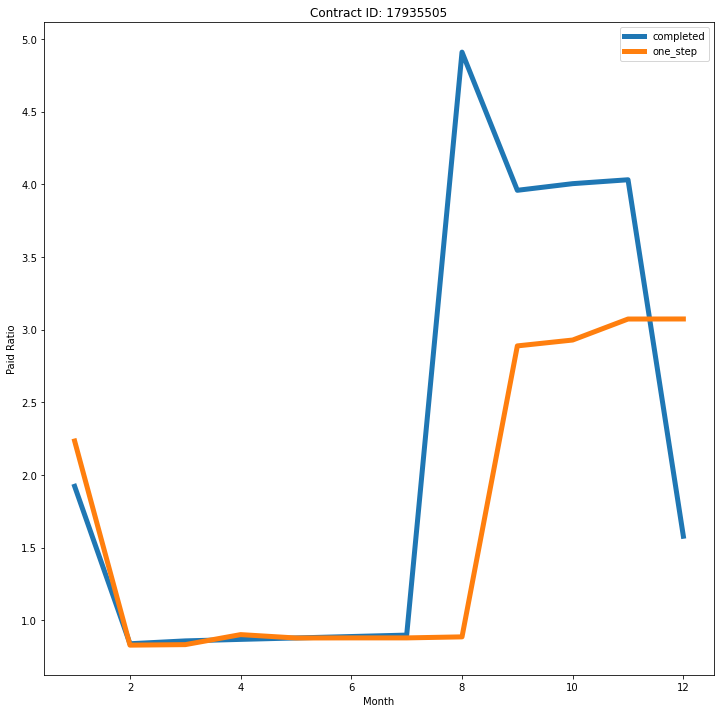

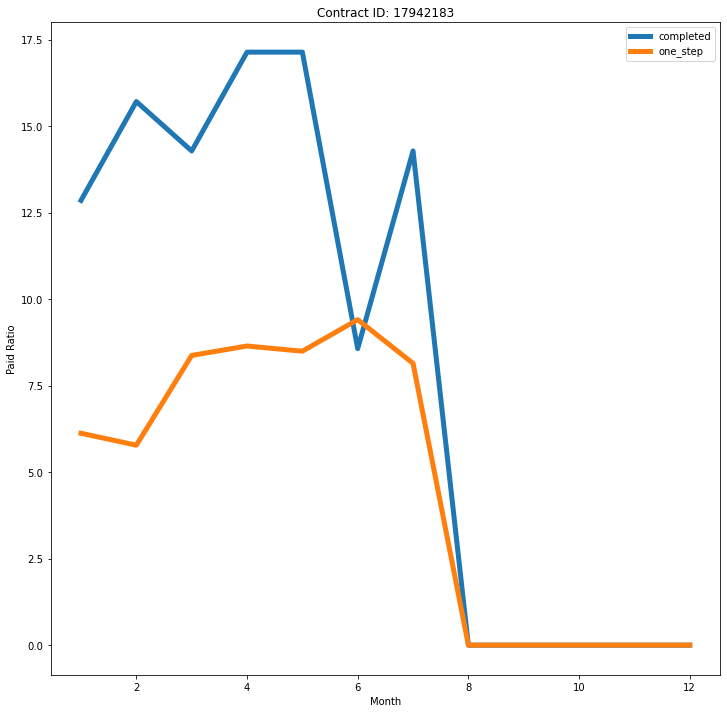

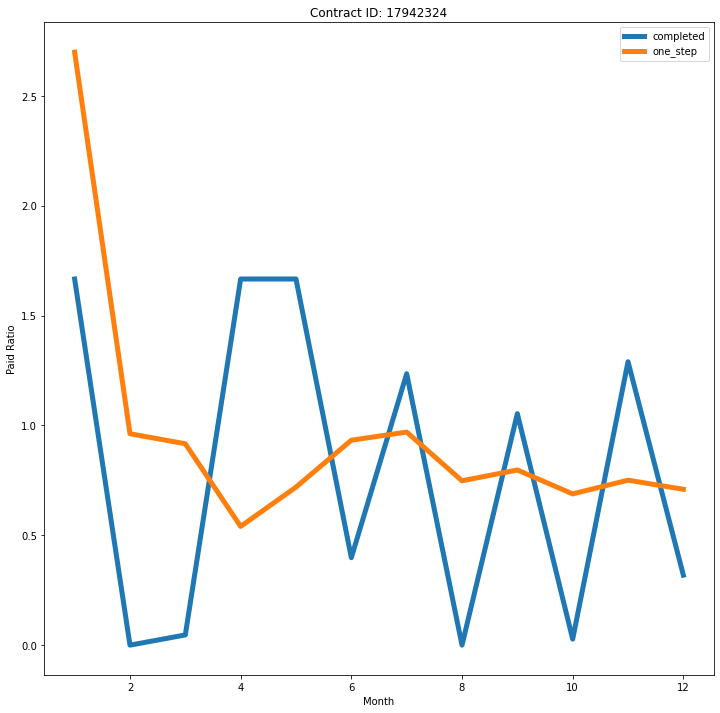

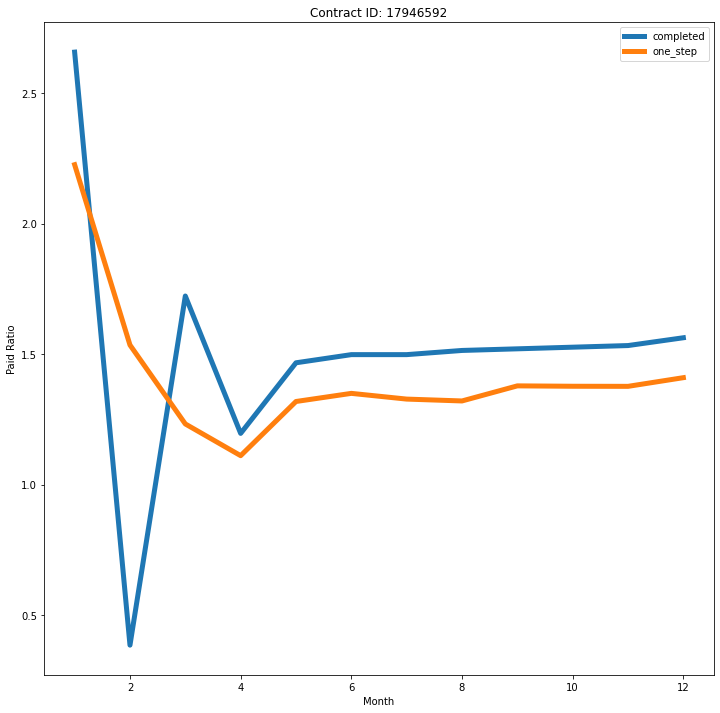

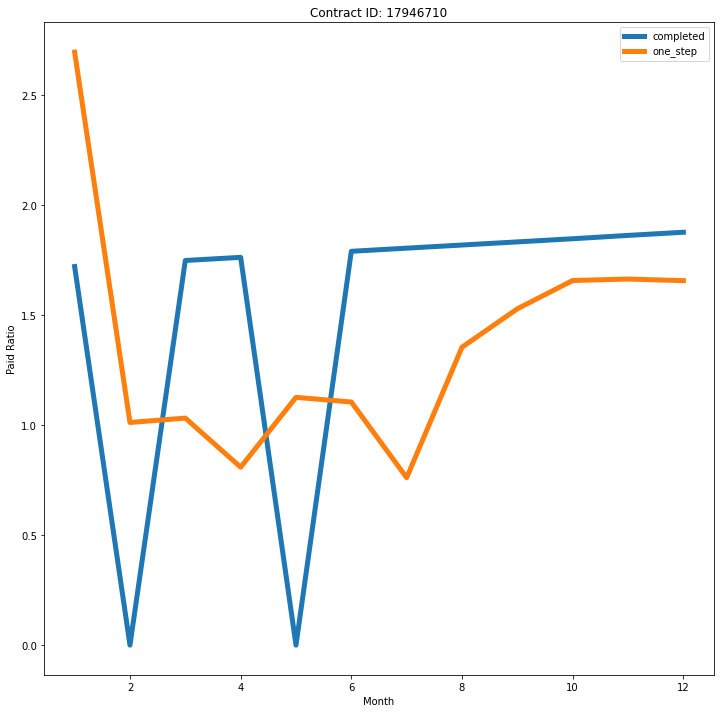

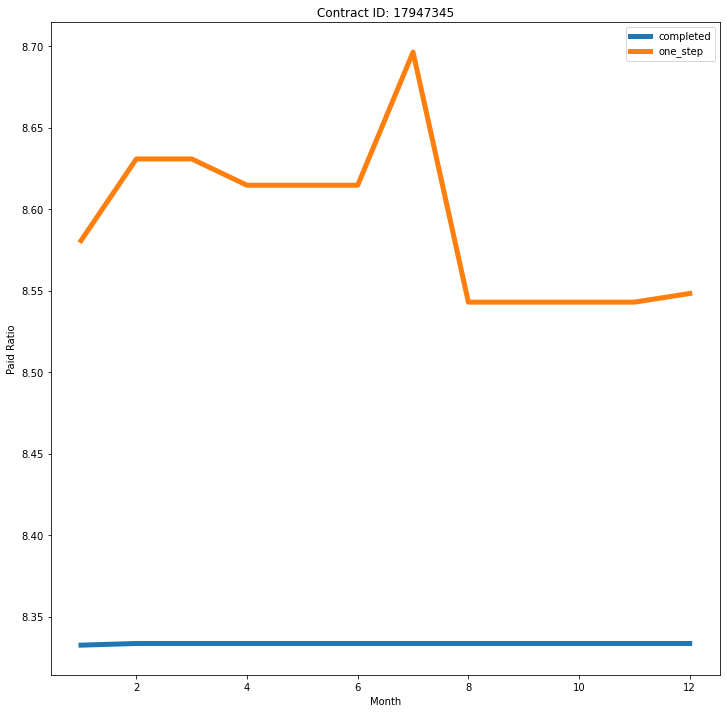

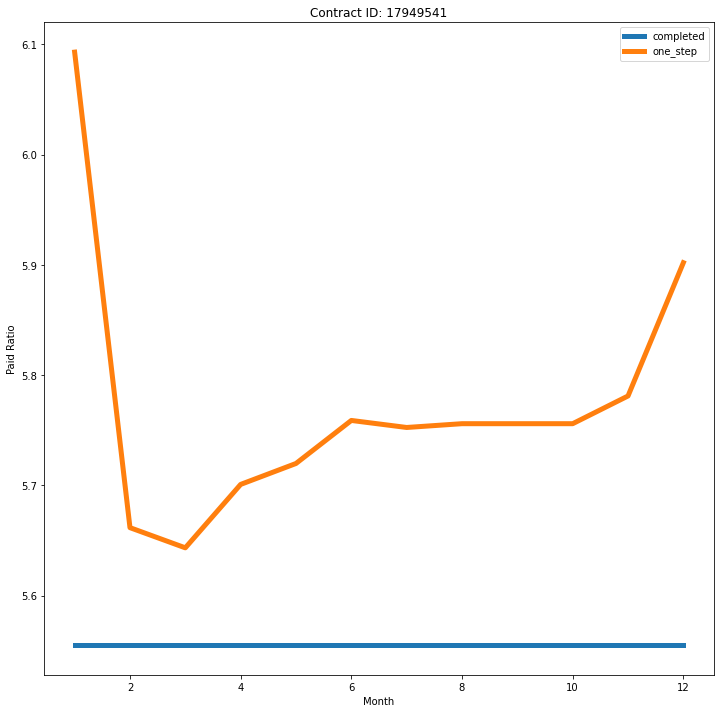

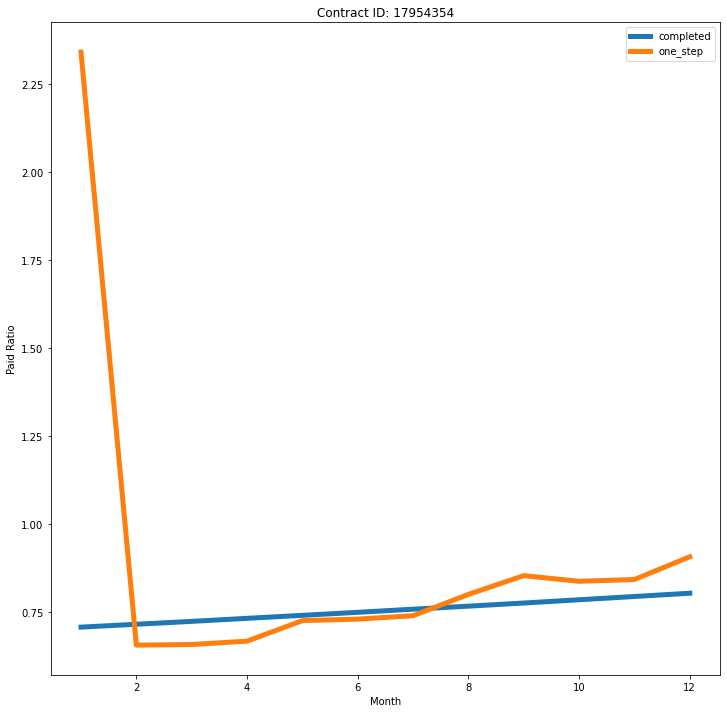

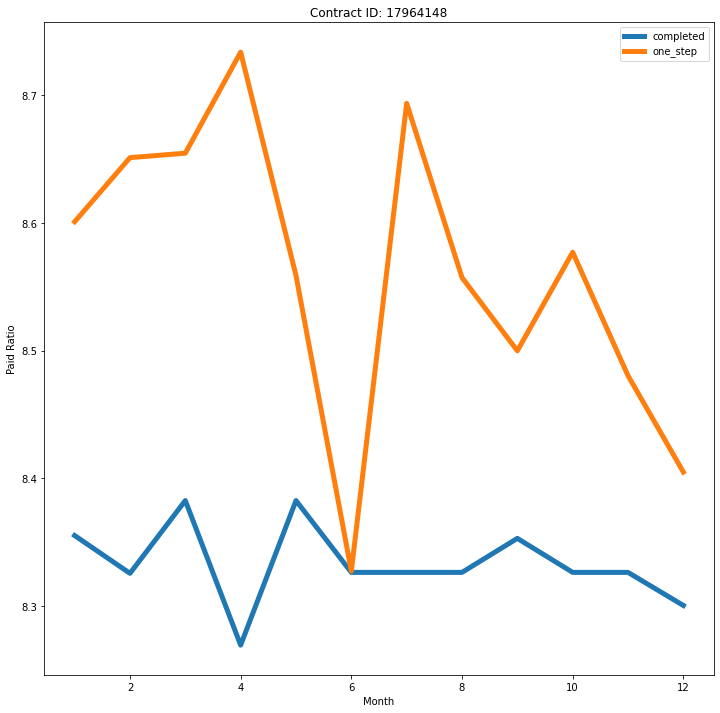

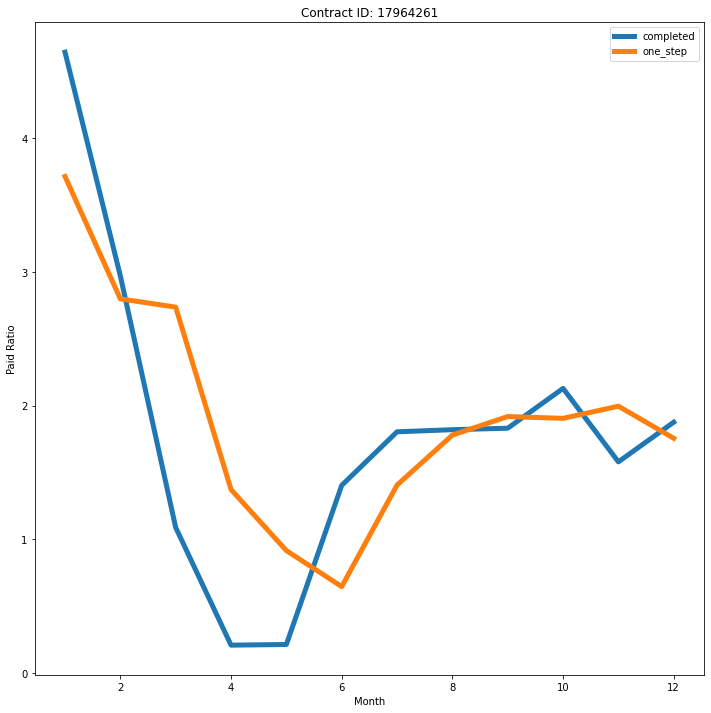

In [6]:
counter = 1
switcher = 1
for key, df in data_final.groupby('CONTRACT_ID'):
    if switcher % 30 != 0:
        switcher += 1
        continue
    df_info = pd.DataFrame.from_dict(OrderedDict({
        'completed' : np.array(df['PERCENT_ACTUAL'])[:12],
        'one_step'  : np.array(df['ONE_STEP_PREDICTION_REPAYMENT_ACTUAL'])[:12]
    }))
    df_info.index += 1
    df_info.plot(figsize=(12, 12), linewidth = 5)
    plt.title("Contract ID: " + str(key))
    plt.xlabel("Month")
    plt.ylabel("Paid Ratio")
    plt.savefig('images/fill/two-series-{}.png'.format(key), dpi=300, bbox_inches='tight')
    counter += 1
    if counter > 150:
        break

In [7]:
all_data_filled_na = all_data_with_na
all_data_filled_na.matrix = data_final
data_final.to_csv('prepared_data/all_data_filled_na.csv')
joblib.dump(all_data_filled_na, 'prepared_data/all_data_filled_na.jbl')

['prepared_data/all_data_filled_na.jbl']